In [1]:
# Importing the required modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import pickle
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
# Importing the dataset
df = pd.read_csv('Cleaned_Soil.csv')

In [4]:
# Obtaining data specific to Anantapur

In [5]:
df = df[df['District'] == 'Srikakulam']
df.head()

Unnamed: 0  Latitude  Longitude    District  Mandal      Village  \
3041        3044     18.40      84.12  Srikakulam  Polaki  Ambeerupeta   
3042        3045     18.40      84.12  Srikakulam  Polaki  Ambeerupeta   
3043        3046     18.39      84.12  Srikakulam  Polaki  Ambeerupeta   
3044        3047     18.40      84.11  Srikakulam  Polaki  Ambeerupeta   
3045        3048     18.39      84.12  Srikakulam  Polaki  Ambeerupeta   

        SoilType    pH    EC    OC  ...     B     Fe    Cu     Mn      NDVI  \
3041  Black soil  6.12  0.77  0.96  ...  1.30  53.30  5.31  44.57  0.033310   
3042  Black soil  7.55  0.15  0.53  ...  0.67  60.11  3.33  16.73  0.033310   
3043  Black soil  6.85  4.60  0.57  ...  2.19  23.86  2.98  25.16  0.029043   
3044  Black soil  8.25  1.46  0.57  ...  1.30   9.95  2.21   7.01  0.033558   
3045  Black soil  6.70  0.69  0.63  ...  0.55  70.84  3.23  20.62  0.029043   

          ARVI       EVI       GCI      NDWI          Crop  
3041  0.031792  0.243958  0.102674 -0.048830  Paddy/G.gram  
3042  0.031792  0.243958  0.102674 -0.048830  Paddy/G.gram  
3043  0.032842  0.408615  0.098536 -0.046955  Paddy/G.gram  
3044  0.018142  0.197793  0.104857 -0.049817  Paddy/G.gram  
3045  0.032842  0.408615  0.098536 -0.046955  Paddy/G.gram  

[5 rows x 26 columns]

In [6]:
# Dropping unnecessary columns
df = df.drop(['Unnamed: 0', 'Latitude', 'Longitude', 'District', 'Mandal', 'Village', 'ARVI', 'EVI', 'GCI', 'NDVI'], axis = 1)
df.describe()

pH          EC          OC           P            K  \
count  428.000000  428.000000  428.000000  428.000000   428.000000   
mean     6.961472    0.413271    0.463808   14.602640   152.665888   
std      1.173631    0.731511    0.252160   23.214154   172.273904   
min      4.740000    0.020000    0.060000    0.450000    16.000000   
25%      5.942500    0.130000    0.277500    4.760000    67.000000   
50%      6.965000    0.210000    0.420000    9.935000   107.500000   
75%      8.080000    0.392500    0.602500   17.795000   178.250000   
max      9.040000    9.250000    2.260000  361.940000  2009.000000   

                Ca           Mg           S          Zn           B  \
count   428.000000   428.000000  428.000000  428.000000  428.000000   
mean   1030.453271   356.135514   32.028154    1.252827    0.981846   
std     713.591398   281.083851   72.268100    1.357158    0.624377   
min      46.000000     4.000000    0.100000    0.100000    0.100000   
25%     617.000000   167.250000    6.220000    0.600000    0.527500   
50%     892.500000   283.000000   11.345000    0.900000    0.840000   
75%    1192.000000   456.250000   21.610000    1.500000    1.322500   
max    5411.000000  1956.000000  648.540000   21.140000    3.660000   

               Fe          Cu          Mn        NDWI  
count  428.000000  428.000000  428.000000  428.000000  
mean    54.822523    2.310654   26.856519   -0.141202  
std     57.255940    1.509037   21.778706    0.153110  
min      2.580000    0.110000    1.650000   -0.669077  
25%      9.942500    1.180000   12.920000   -0.180328  
50%     33.730000    1.970000   20.060000   -0.059012  
75%     84.330000    3.132500   33.885000   -0.045877  
max    346.180000    9.520000  207.680000   -0.002800

In [7]:
# Analysis of SoilType

In [8]:
df.SoilType.unique()

array(['Black soil', 'Red soil', 'Sandy loam', 'Saline soil', 'red soil',
       'red sandy', 'black soil', 'sandy loam', 'res soil', 'Red Soil',
       'Redsoil', 'Red sandy', 'Saline Soil'], dtype=object)

In [9]:
df['SoilType'] = df['SoilType'].replace(['Black soil', 'black soil'], 'Black Soil')
df['SoilType'] = df['SoilType'].replace(['Red soil', 'red soil', 'res soil', 'Redsoil'], 'Red Soil')
df['SoilType'] = df['SoilType'].replace(['Sandy loam', 'sandy loam'], 'Sandy Loam Soil')
df['SoilType'] = df['SoilType'].replace('Saline soil', 'Saline Soil')
df['SoilType'] = df['SoilType'].replace(['Red sandy', 'red sandy'], 'Red Sandy Soil')
df.SoilType.unique()

array(['Black Soil', 'Red Soil', 'Sandy Loam Soil', 'Saline Soil',
       'Red Sandy Soil'], dtype=object)

In [10]:
soilCount = dict(df['SoilType'].value_counts())
soilCount

{'Red Soil': 279,
 'Black Soil': 79,
 'Sandy Loam Soil': 58,
 'Saline Soil': 10,
 'Red Sandy Soil': 2}

<BarContainer object of 5 artists>

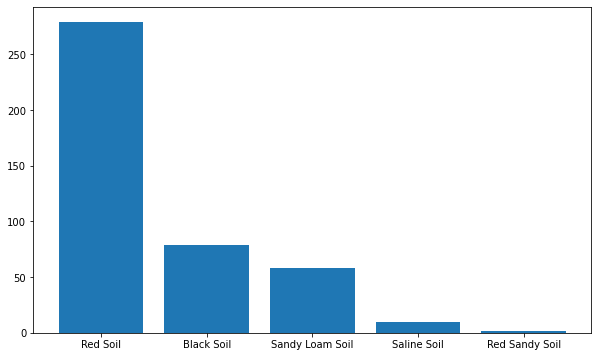

In [11]:
soilType = soilCount.keys()
soilCounts = soilCount.values()
plt.bar(soilType, soilCounts)

In [12]:
# Analysis of Crops grown 

In [13]:
df.Crop.unique()

array(['Paddy/G.gram', 'Cashew', 'Banana', 'banana/coconut',
       'Maize/paddy', 'coconut', 'Coconut', 'coconut/banana',
       'Paddy/Maize', 'Banana/coconut', 'cashew', 'Chilli Papaya',
       'Maize', 'banana', 'maize', 'paddy', 'Paddy Maize', 'Maize/Horti',
       'Cotton/Maize', 'paddy  ', 'Paddy', 'Paddy Sugercane',
       'Paddy/Ragi', 'Paddy/G.nut'], dtype=object)

In [14]:
df['Crop'].value_counts()

Paddy/G.gram       177
Paddy               50
Maize               38
Coconut             35
banana/coconut      34
Cashew              20
Banana/coconut      17
Banana              11
Maize/paddy          7
paddy                7
Paddy/G.nut          5
maize                5
Paddy Maize          4
banana               3
Cotton/Maize         3
Paddy/Ragi           3
Paddy/Maize          2
Paddy Sugercane      1
coconut              1
coconut/banana       1
Maize/Horti          1
cashew               1
Chilli Papaya        1
paddy                1
Name: Crop, dtype: int64

Paddy + GreenGram    177
Paddy                 67
Banana + Coconut      52
Maize                 47
Coconut               36
Cashew                21
Name: Crop, dtype: int64


<BarContainer object of 6 artists>

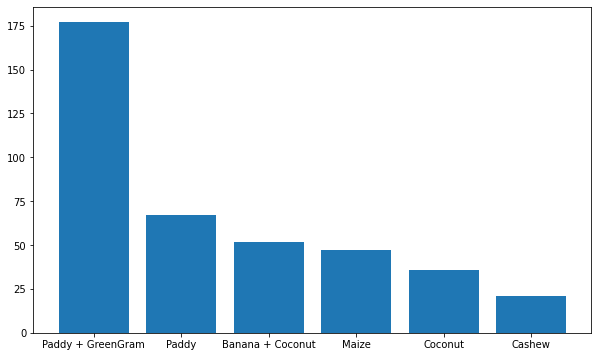

In [15]:
df['Crop'] = df['Crop'].replace(['Paddy/G.nut', 'Paddy/Ragi', 'Paddy Sugercane', 'paddy', 'paddy  '], 'Paddy')
df['Crop'] = df['Crop'].replace('Paddy/G.gram', 'Paddy + GreenGram')
df['Crop'] = df['Crop'].replace('cashew', 'Cashew')
df['Crop'] = df['Crop'].replace(['Maize/Horti', 'Cotton/Maize', 'maize'], 'Maize')
df['Crop'] = df['Crop'].replace(['Maize/paddy', 'Paddy/Maize', 'Paddy Maize'], 'Maize + Paddy')
df['Crop'] = df['Crop'].replace('banana', 'Banana')
df['Crop'] = df['Crop'].replace(['banana/coconut', 'coconut/banana', 'Banana/coconut'], 'Banana + Coconut')
df['Crop'] = df['Crop'].replace(['coconut', 'Coconut'], 'Coconut')
df = df[(df['Crop'] != 'Chilli Papaya') & (df['Crop'] != ' ') & (df['Crop'] != 'Banana') & (df['Crop'] != 'Maize + Paddy')]

print(df['Crop'].value_counts())
cropCount = dict(df['Crop'].value_counts())
cropType = cropCount.keys()
cropCounts = cropCount.values()
plt.bar(cropType, cropCounts)

In [16]:
# Getting rid of features that have a high correlation among one another

In [17]:
cor_matrix = df.corr()
cor_matrix

pH        EC        OC         P         K        Ca        Mg  \
pH    1.000000  0.036144 -0.173142  0.147631  0.212099  0.088177  0.248197   
EC    0.036144  1.000000  0.294264  0.103024  0.281155  0.277983  0.345899   
OC   -0.173142  0.294264  1.000000  0.428003  0.485155  0.535371  0.427264   
P     0.147631  0.103024  0.428003  1.000000  0.646969  0.158760  0.049023   
K     0.212099  0.281155  0.485155  0.646969  1.000000  0.335424  0.288572   
Ca    0.088177  0.277983  0.535371  0.158760  0.335424  1.000000  0.853234   
Mg    0.248197  0.345899  0.427264  0.049023  0.288572  0.853234  1.000000   
S     0.004609  0.760315  0.247478  0.068294  0.191091  0.200946  0.227618   
Zn    0.056296  0.079011  0.505206  0.582799  0.403726  0.197035  0.053939   
B     0.388219  0.392242  0.471484  0.225287  0.426516  0.357904  0.596317   
Fe   -0.699983 -0.047530  0.384226  0.003291 -0.102368  0.143338 -0.014557   
Cu   -0.374378  0.174227  0.686953  0.053457  0.157180  0.598291  0.511157   
Mn   -0.355627 -0.070442  0.236073 -0.047088 -0.012947  0.133805  0.027572   
NDWI -0.187750  0.128707 -0.007873 -0.187067 -0.114711  0.063287  0.021910   

             S        Zn         B        Fe        Cu        Mn      NDWI  
pH    0.004609  0.056296  0.388219 -0.699983 -0.374378 -0.355627 -0.187750  
EC    0.760315  0.079011  0.392242 -0.047530  0.174227 -0.070442  0.128707  
OC    0.247478  0.505206  0.471484  0.384226  0.686953  0.236073 -0.007873  
P     0.068294  0.582799  0.225287  0.003291  0.053457 -0.047088 -0.187067  
K     0.191091  0.403726  0.426516 -0.102368  0.157180 -0.012947 -0.114711  
Ca    0.200946  0.197035  0.357904  0.143338  0.598291  0.133805  0.063287  
Mg    0.227618  0.053939  0.596317 -0.014557  0.511157  0.027572  0.021910  
S     1.000000  0.034358  0.418827  0.036341  0.165831 -0.080504  0.148228  
Zn    0.034358  1.000000  0.136258  0.099621  0.169182  0.158456 -0.289074  
B     0.418827  0.136258  1.000000 -0.146109  0.348940 -0.120227 -0.061820  
Fe    0.036341  0.099621 -0.146109  1.000000  0.637164  0.348255  0.075196  
Cu    0.165831  0.169182  0.348940  0.637164  1.000000  0.372942  0.088415  
Mn   -0.080504  0.158456 -0.120227  0.348255  0.372942  1.000000 -0.195377  
NDWI  0.148228 -0.289074 -0.061820  0.075196  0.088415 -0.195377  1.000000

In [18]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print('Columns to be dropped : ', to_drop)


Columns to be dropped :  ['K', 'Ca', 'Mg', 'S', 'Zn', 'B', 'Cu']


In [19]:
df = df.drop(to_drop, axis = 1)
print('Columns taken into consideration : ', list(df.columns))

Columns taken into consideration :  ['SoilType', 'pH', 'EC', 'OC', 'P', 'Fe', 'Mn', 'NDWI', 'Crop']


In [20]:
# Separating the dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [21]:
# Encoding SoilType as it is a categorical variable
X = pd.get_dummies(X, prefix='', prefix_sep='')
print(X.head(1))
print(y.head(1))
X = X.values
y = y.values

        pH    EC    OC     P    Fe     Mn     NDWI  Black Soil  \
3041  6.12  0.77  0.96  5.62  53.3  44.57 -0.04883           1   

      Red Sandy Soil  Red Soil  Saline Soil  Sandy Loam Soil  
3041               0         0            0                0  
3041    Paddy + GreenGram
Name: Crop, dtype: object


In [22]:
# Standardizing the independent variables using Feature Scaling
sc1 = StandardScaler()
X[:, 0:7] = sc1.fit_transform(X[:, 0:7])

In [23]:
# Splitting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify=y)

# K-Nearest Neighbors Classifier

In [24]:
clf1 = KNeighborsClassifier(weights='distance')
clf1.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [25]:
y_test_pred = clf1.predict(X_test)
y_train_pred = clf1.predict(X_train)
AC1_train = accuracy_score(y_train, y_train_pred)
AC1_test = accuracy_score(y_test, y_test_pred)

In [26]:
print('Training Accuracy: ', AC1_train)
print('Testing Accuracy: ', AC1_test)

Training Accuracy:  1.0
Testing Accuracy:  0.67


In [27]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf1, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 72.33 %
Standard Deviation: 6.67 %


# Decision Tree Classifier

In [28]:
clf2 = DecisionTreeClassifier(random_state = 0)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [29]:
y_test_pred = clf2.predict(X_test)
y_train_pred = clf2.predict(X_train)
AC2_train = accuracy_score(y_train, y_train_pred)
AC2_test = accuracy_score(y_test, y_test_pred)

In [30]:
print('Training Accuracy: ', AC2_train)
print('Testing Accuracy: ', AC2_test)

Training Accuracy:  1.0
Testing Accuracy:  0.68


In [31]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf2, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 66.67 %
Standard Deviation: 8.43 %


# Random Forest Classifier

In [32]:
clf3 = RandomForestClassifier(random_state = 0)
clf3.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [33]:
y_test_pred = clf3.predict(X_test)
y_train_pred = clf3.predict(X_train)
AC3_train = accuracy_score(y_train, y_train_pred)
AC3_test = accuracy_score(y_test, y_test_pred)

In [34]:
print('Training Accuracy: ', AC3_train)
print('Testing Accuracy: ', AC3_test)

Training Accuracy:  1.0
Testing Accuracy:  0.75


In [35]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf3, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 75.67 %
Standard Deviation: 7.46 %


In [36]:
# pickle.dump(clf3, open('Srikakulam_model.pkl', 'wb'))
# pickle.dump(sc1, open('Srikakulam_scaler.pkl', 'wb'))

# XGBoost

In [37]:
clf4 = HistGradientBoostingClassifier(random_state = 0)
clf4.fit(X_train, y_train)

HistGradientBoostingClassifier(random_state=0)

In [38]:
y_test_pred = clf4.predict(X_test)
y_train_pred = clf4.predict(X_train)
AC4_train = accuracy_score(y_train, y_train_pred)
AC4_test = accuracy_score(y_test, y_test_pred)

In [39]:
print('Training Accuracy: ', AC4_train)
print('Testing Accuracy: ', AC4_test)

Training Accuracy:  1.0
Testing Accuracy:  0.7


In [40]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf4, X = X_train, y = y_train, cv = 10)

In [41]:
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 74.67 %
Standard Deviation: 6.18 %


# Multi-layer Perceptron Classifier

In [42]:
clf5 = MLPClassifier(random_state=0, learning_rate= 'adaptive')
clf5.fit(X_train, y_train)

MLPClassifier(learning_rate='adaptive', random_state=0)

In [43]:
y_test_pred = clf5.predict(X_test)
y_train_pred = clf5.predict(X_train)
AC5_train = accuracy_score(y_train, y_train_pred)
AC5_test = accuracy_score(y_test, y_test_pred)

In [44]:
print('Training Accuracy: ', AC5_train)
print('Testing Accuracy: ', AC5_test)

Training Accuracy:  0.83
Testing Accuracy:  0.74


In [45]:
# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = clf5, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

Accuracy: 71.67 %
Standard Deviation: 6.19 %


# Catboost

In [46]:
from catboost import CatBoostClassifier, Pool, cv

model = CatBoostClassifier(iterations=100, depth=2, learning_rate=1, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train)

model.calc_feature_statistics(X_train, y_train, feature=1, plot=True)

train_data = Pool(data=X_train, label=y_train)
model.get_feature_importance(train_data)

#Cross-Validation
cv_dataset = Pool(data=X_train, label=y_train)
params = {"iterations": 100, "depth": 2, "loss_function": "MultiClass", "verbose": False}
scores = cv(cv_dataset, params, fold_count=5, plot="True")

model = CatBoostClassifier(loss_function='MultiClass')
grid = {'learning_rate': [0.03, 0.1], 'depth': [4, 6, 10]}
grid_search_result = model.grid_search(grid, X=X_train, y=y_train, cv=3, plot=True)

model.score(X_test, y_test)

# k-Fold Cross Validation
accuracyList = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
print('Accuracy: {:.2f} %'.format(accuracyList.mean() * 100))
print('Standard Deviation: {:.2f} %'.format(accuracyList.std() * 100))

0:	learn: 1.1205770	total: 155ms	remaining: 15.3s
1:	learn: 0.9627727	total: 156ms	remaining: 7.63s
2:	learn: 0.8925714	total: 157ms	remaining: 5.07s
3:	learn: 0.8058860	total: 158ms	remaining: 3.78s
4:	learn: 0.7688253	total: 158ms	remaining: 3.01s
5:	learn: 0.7177348	total: 159ms	remaining: 2.49s
6:	learn: 0.7064800	total: 160ms	remaining: 2.12s
7:	learn: 0.6904930	total: 161ms	remaining: 1.85s
8:	learn: 0.6714281	total: 161ms	remaining: 1.63s
9:	learn: 0.6602374	total: 162ms	remaining: 1.46s
10:	learn: 0.6276067	total: 163ms	remaining: 1.31s
11:	learn: 0.6089880	total: 163ms	remaining: 1.2s
12:	learn: 0.5987828	total: 164ms	remaining: 1.1s
13:	learn: 0.5867473	total: 165ms	remaining: 1.01s
14:	learn: 0.5788716	total: 165ms	remaining: 936ms
15:	learn: 0.5596952	total: 166ms	remaining: 871ms
16:	learn: 0.5362954	total: 167ms	remaining: 814ms
17:	learn: 0.5234734	total: 167ms	remaining: 762ms
18:	learn: 0.5200800	total: 168ms	remaining: 716ms
19:	learn: 0.5013765	total: 169ms	remaining

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.9809712846
bestIteration = 99

Training on fold [1/5]

bestTest = 0.9166457434
bestIteration = 99

Training on fold [2/5]

bestTest = 0.9246566031
bestIteration = 99

Training on fold [3/5]

bestTest = 0.974464909
bestIteration = 99

Training on fold [4/5]

bestTest = 0.9563573393
bestIteration = 99



MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.7588913	test: 1.7603399	best: 1.7603399 (0)	total: 1.88ms	remaining: 1.88s
1:	learn: 1.7253525	test: 1.7246122	best: 1.7246122 (1)	total: 3.49ms	remaining: 1.74s
2:	learn: 1.6879936	test: 1.6770976	best: 1.6770976 (2)	total: 5.03ms	remaining: 1.67s
3:	learn: 1.6501816	test: 1.6376216	best: 1.6376216 (3)	total: 6.57ms	remaining: 1.64s
4:	learn: 1.6240243	test: 1.6047288	best: 1.6047288 (4)	total: 8.12ms	remaining: 1.61s
5:	learn: 1.5958075	test: 1.5737265	best: 1.5737265 (5)	total: 9.67ms	remaining: 1.6s
6:	learn: 1.5740795	test: 1.5484328	best: 1.5484328 (6)	total: 11.2ms	remaining: 1.59s
7:	learn: 1.5464685	test: 1.5148936	best: 1.5148936 (7)	total: 12.8ms	remaining: 1.59s
8:	learn: 1.5206433	test: 1.4862554	best: 1.4862554 (8)	total: 14.4ms	remaining: 1.58s
9:	learn: 1.4945819	test: 1.4593131	best: 1.4593131 (9)	total: 16ms	remaining: 1.58s
10:	learn: 1.4731938	test: 1.4362949	best: 1.4362949 (10)	total: 17.5ms	remaining: 1.57s
11:	learn: 1.4521404	test: 1.4166056	best: 1

104:	learn: 0.7587532	test: 0.7691652	best: 0.7691652 (104)	total: 172ms	remaining: 1.46s
105:	learn: 0.7558898	test: 0.7664225	best: 0.7664225 (105)	total: 174ms	remaining: 1.46s
106:	learn: 0.7528725	test: 0.7644358	best: 0.7644358 (106)	total: 175ms	remaining: 1.46s
107:	learn: 0.7504404	test: 0.7623344	best: 0.7623344 (107)	total: 177ms	remaining: 1.46s
108:	learn: 0.7477695	test: 0.7623418	best: 0.7623344 (107)	total: 178ms	remaining: 1.46s
109:	learn: 0.7446492	test: 0.7606795	best: 0.7606795 (109)	total: 180ms	remaining: 1.46s
110:	learn: 0.7414872	test: 0.7586240	best: 0.7586240 (110)	total: 182ms	remaining: 1.46s
111:	learn: 0.7393540	test: 0.7561248	best: 0.7561248 (111)	total: 183ms	remaining: 1.45s
112:	learn: 0.7362451	test: 0.7546044	best: 0.7546044 (112)	total: 185ms	remaining: 1.45s
113:	learn: 0.7336885	test: 0.7533081	best: 0.7533081 (113)	total: 186ms	remaining: 1.45s
114:	learn: 0.7311524	test: 0.7514593	best: 0.7514593 (114)	total: 188ms	remaining: 1.45s
115:	learn

204:	learn: 0.5659866	test: 0.6608076	best: 0.6608076 (204)	total: 347ms	remaining: 1.35s
205:	learn: 0.5644175	test: 0.6602495	best: 0.6602495 (205)	total: 349ms	remaining: 1.35s
206:	learn: 0.5630226	test: 0.6595056	best: 0.6595056 (206)	total: 351ms	remaining: 1.34s
207:	learn: 0.5620736	test: 0.6591169	best: 0.6591169 (207)	total: 353ms	remaining: 1.34s
208:	learn: 0.5609879	test: 0.6581902	best: 0.6581902 (208)	total: 354ms	remaining: 1.34s
209:	learn: 0.5602613	test: 0.6581518	best: 0.6581518 (209)	total: 356ms	remaining: 1.34s
210:	learn: 0.5589316	test: 0.6572272	best: 0.6572272 (210)	total: 357ms	remaining: 1.33s
211:	learn: 0.5576099	test: 0.6578975	best: 0.6572272 (210)	total: 359ms	remaining: 1.33s
212:	learn: 0.5560839	test: 0.6575044	best: 0.6572272 (210)	total: 360ms	remaining: 1.33s
213:	learn: 0.5542993	test: 0.6559463	best: 0.6559463 (213)	total: 362ms	remaining: 1.33s
214:	learn: 0.5538734	test: 0.6559768	best: 0.6559463 (213)	total: 364ms	remaining: 1.33s
215:	learn

309:	learn: 0.4470060	test: 0.6178421	best: 0.6178421 (309)	total: 523ms	remaining: 1.16s
310:	learn: 0.4466263	test: 0.6175859	best: 0.6175859 (310)	total: 525ms	remaining: 1.16s
311:	learn: 0.4460551	test: 0.6176953	best: 0.6175859 (310)	total: 526ms	remaining: 1.16s
312:	learn: 0.4449446	test: 0.6169771	best: 0.6169771 (312)	total: 528ms	remaining: 1.16s
313:	learn: 0.4442052	test: 0.6170167	best: 0.6169771 (312)	total: 530ms	remaining: 1.16s
314:	learn: 0.4431422	test: 0.6169776	best: 0.6169771 (312)	total: 531ms	remaining: 1.16s
315:	learn: 0.4423443	test: 0.6176424	best: 0.6169771 (312)	total: 533ms	remaining: 1.15s
316:	learn: 0.4414530	test: 0.6172750	best: 0.6169771 (312)	total: 534ms	remaining: 1.15s
317:	learn: 0.4406116	test: 0.6167372	best: 0.6167372 (317)	total: 536ms	remaining: 1.15s
318:	learn: 0.4397829	test: 0.6172751	best: 0.6167372 (317)	total: 537ms	remaining: 1.15s
319:	learn: 0.4390605	test: 0.6173802	best: 0.6167372 (317)	total: 539ms	remaining: 1.15s
320:	learn

412:	learn: 0.3715374	test: 0.6022713	best: 0.6018603 (408)	total: 699ms	remaining: 993ms
413:	learn: 0.3711920	test: 0.6021255	best: 0.6018603 (408)	total: 701ms	remaining: 992ms
414:	learn: 0.3708962	test: 0.6023698	best: 0.6018603 (408)	total: 702ms	remaining: 990ms
415:	learn: 0.3703741	test: 0.6020237	best: 0.6018603 (408)	total: 704ms	remaining: 988ms
416:	learn: 0.3693946	test: 0.6015047	best: 0.6015047 (416)	total: 706ms	remaining: 987ms
417:	learn: 0.3687547	test: 0.6015103	best: 0.6015047 (416)	total: 708ms	remaining: 985ms
418:	learn: 0.3683402	test: 0.6017742	best: 0.6015047 (416)	total: 709ms	remaining: 984ms
419:	learn: 0.3671875	test: 0.6009730	best: 0.6009730 (419)	total: 711ms	remaining: 982ms
420:	learn: 0.3666404	test: 0.6007362	best: 0.6007362 (420)	total: 713ms	remaining: 981ms
421:	learn: 0.3661269	test: 0.6009606	best: 0.6007362 (420)	total: 715ms	remaining: 979ms
422:	learn: 0.3656718	test: 0.6009432	best: 0.6007362 (420)	total: 717ms	remaining: 978ms
423:	learn

511:	learn: 0.3173312	test: 0.5885252	best: 0.5884131 (510)	total: 875ms	remaining: 834ms
512:	learn: 0.3170538	test: 0.5881548	best: 0.5881548 (512)	total: 877ms	remaining: 832ms
513:	learn: 0.3168582	test: 0.5881380	best: 0.5881380 (513)	total: 878ms	remaining: 830ms
514:	learn: 0.3163199	test: 0.5879373	best: 0.5879373 (514)	total: 880ms	remaining: 829ms
515:	learn: 0.3155646	test: 0.5887271	best: 0.5879373 (514)	total: 881ms	remaining: 827ms
516:	learn: 0.3149215	test: 0.5886690	best: 0.5879373 (514)	total: 883ms	remaining: 825ms
517:	learn: 0.3146597	test: 0.5885820	best: 0.5879373 (514)	total: 885ms	remaining: 823ms
518:	learn: 0.3141333	test: 0.5885974	best: 0.5879373 (514)	total: 886ms	remaining: 821ms
519:	learn: 0.3136563	test: 0.5886034	best: 0.5879373 (514)	total: 888ms	remaining: 819ms
520:	learn: 0.3133617	test: 0.5881460	best: 0.5879373 (514)	total: 889ms	remaining: 818ms
521:	learn: 0.3126758	test: 0.5873868	best: 0.5873868 (521)	total: 891ms	remaining: 816ms
522:	learn

615:	learn: 0.2751992	test: 0.5824799	best: 0.5824799 (615)	total: 1.05s	remaining: 654ms
616:	learn: 0.2747900	test: 0.5825633	best: 0.5824799 (615)	total: 1.05s	remaining: 653ms
617:	learn: 0.2744754	test: 0.5824094	best: 0.5824094 (617)	total: 1.05s	remaining: 651ms
618:	learn: 0.2738201	test: 0.5818971	best: 0.5818971 (618)	total: 1.05s	remaining: 649ms
619:	learn: 0.2736247	test: 0.5819890	best: 0.5818971 (618)	total: 1.05s	remaining: 647ms
620:	learn: 0.2731758	test: 0.5827393	best: 0.5818971 (618)	total: 1.06s	remaining: 645ms
621:	learn: 0.2727853	test: 0.5828464	best: 0.5818971 (618)	total: 1.06s	remaining: 644ms
622:	learn: 0.2723835	test: 0.5824791	best: 0.5818971 (618)	total: 1.06s	remaining: 642ms
623:	learn: 0.2720985	test: 0.5824219	best: 0.5818971 (618)	total: 1.06s	remaining: 640ms
624:	learn: 0.2717909	test: 0.5823024	best: 0.5818971 (618)	total: 1.06s	remaining: 638ms
625:	learn: 0.2714369	test: 0.5822448	best: 0.5818971 (618)	total: 1.06s	remaining: 636ms
626:	learn

718:	learn: 0.2417167	test: 0.5733885	best: 0.5731846 (714)	total: 1.22s	remaining: 478ms
719:	learn: 0.2411612	test: 0.5728773	best: 0.5728773 (719)	total: 1.23s	remaining: 477ms
720:	learn: 0.2410126	test: 0.5728284	best: 0.5728284 (720)	total: 1.23s	remaining: 475ms
721:	learn: 0.2408408	test: 0.5727561	best: 0.5727561 (721)	total: 1.23s	remaining: 473ms
722:	learn: 0.2405278	test: 0.5722934	best: 0.5722934 (722)	total: 1.23s	remaining: 472ms
723:	learn: 0.2403347	test: 0.5726377	best: 0.5722934 (722)	total: 1.23s	remaining: 470ms
724:	learn: 0.2401784	test: 0.5727659	best: 0.5722934 (722)	total: 1.23s	remaining: 468ms
725:	learn: 0.2399108	test: 0.5725872	best: 0.5722934 (722)	total: 1.24s	remaining: 466ms
726:	learn: 0.2394650	test: 0.5726108	best: 0.5722934 (722)	total: 1.24s	remaining: 465ms
727:	learn: 0.2393000	test: 0.5725704	best: 0.5722934 (722)	total: 1.24s	remaining: 463ms
728:	learn: 0.2390482	test: 0.5724290	best: 0.5722934 (722)	total: 1.24s	remaining: 461ms
729:	learn

812:	learn: 0.2168116	test: 0.5722616	best: 0.5720812 (811)	total: 1.4s	remaining: 323ms
813:	learn: 0.2164203	test: 0.5725815	best: 0.5720812 (811)	total: 1.41s	remaining: 321ms
814:	learn: 0.2161724	test: 0.5728342	best: 0.5720812 (811)	total: 1.41s	remaining: 320ms
815:	learn: 0.2158758	test: 0.5727532	best: 0.5720812 (811)	total: 1.41s	remaining: 318ms
816:	learn: 0.2156455	test: 0.5728785	best: 0.5720812 (811)	total: 1.41s	remaining: 316ms
817:	learn: 0.2154599	test: 0.5728405	best: 0.5720812 (811)	total: 1.41s	remaining: 314ms
818:	learn: 0.2151510	test: 0.5727000	best: 0.5720812 (811)	total: 1.42s	remaining: 313ms
819:	learn: 0.2150573	test: 0.5729046	best: 0.5720812 (811)	total: 1.42s	remaining: 311ms
820:	learn: 0.2148245	test: 0.5729209	best: 0.5720812 (811)	total: 1.42s	remaining: 309ms
821:	learn: 0.2145601	test: 0.5729686	best: 0.5720812 (811)	total: 1.42s	remaining: 308ms
822:	learn: 0.2141251	test: 0.5730557	best: 0.5720812 (811)	total: 1.42s	remaining: 306ms
823:	learn:

928:	learn: 0.1901999	test: 0.5747032	best: 0.5720812 (811)	total: 1.58s	remaining: 121ms
929:	learn: 0.1899858	test: 0.5750452	best: 0.5720812 (811)	total: 1.58s	remaining: 119ms
930:	learn: 0.1899273	test: 0.5750448	best: 0.5720812 (811)	total: 1.59s	remaining: 118ms
931:	learn: 0.1898216	test: 0.5752627	best: 0.5720812 (811)	total: 1.59s	remaining: 116ms
932:	learn: 0.1896700	test: 0.5752036	best: 0.5720812 (811)	total: 1.59s	remaining: 114ms
933:	learn: 0.1893989	test: 0.5753003	best: 0.5720812 (811)	total: 1.59s	remaining: 112ms
934:	learn: 0.1892660	test: 0.5748625	best: 0.5720812 (811)	total: 1.59s	remaining: 111ms
935:	learn: 0.1890192	test: 0.5753437	best: 0.5720812 (811)	total: 1.59s	remaining: 109ms
936:	learn: 0.1888549	test: 0.5754867	best: 0.5720812 (811)	total: 1.59s	remaining: 107ms
937:	learn: 0.1887003	test: 0.5754187	best: 0.5720812 (811)	total: 1.6s	remaining: 106ms
938:	learn: 0.1884954	test: 0.5754038	best: 0.5720812 (811)	total: 1.6s	remaining: 104ms
939:	learn: 

21:	learn: 0.8699095	test: 0.8453491	best: 0.8453491 (21)	total: 73.1ms	remaining: 3.25s
22:	learn: 0.8554464	test: 0.8356632	best: 0.8356632 (22)	total: 75.2ms	remaining: 3.19s
23:	learn: 0.8419990	test: 0.8242891	best: 0.8242891 (23)	total: 77.1ms	remaining: 3.13s
24:	learn: 0.8259516	test: 0.8114455	best: 0.8114455 (24)	total: 78.9ms	remaining: 3.08s
25:	learn: 0.8147866	test: 0.8018082	best: 0.8018082 (25)	total: 80.8ms	remaining: 3.03s
26:	learn: 0.8002023	test: 0.7878873	best: 0.7878873 (26)	total: 82.9ms	remaining: 2.99s
27:	learn: 0.7887845	test: 0.7821401	best: 0.7821401 (27)	total: 84.8ms	remaining: 2.94s
28:	learn: 0.7821484	test: 0.7795431	best: 0.7795431 (28)	total: 86.7ms	remaining: 2.9s
29:	learn: 0.7714658	test: 0.7734424	best: 0.7734424 (29)	total: 89ms	remaining: 2.88s
30:	learn: 0.7652189	test: 0.7693686	best: 0.7693686 (30)	total: 91.3ms	remaining: 2.85s
31:	learn: 0.7554877	test: 0.7634074	best: 0.7634074 (31)	total: 93.1ms	remaining: 2.81s
32:	learn: 0.7461585	tes

121:	learn: 0.3823679	test: 0.5837278	best: 0.5837278 (121)	total: 248ms	remaining: 1.78s
122:	learn: 0.3811376	test: 0.5834456	best: 0.5834456 (122)	total: 250ms	remaining: 1.78s
123:	learn: 0.3786718	test: 0.5820404	best: 0.5820404 (123)	total: 251ms	remaining: 1.77s
124:	learn: 0.3753686	test: 0.5821763	best: 0.5820404 (123)	total: 254ms	remaining: 1.77s
125:	learn: 0.3731197	test: 0.5826647	best: 0.5820404 (123)	total: 255ms	remaining: 1.77s
126:	learn: 0.3720094	test: 0.5814523	best: 0.5814523 (126)	total: 257ms	remaining: 1.77s
127:	learn: 0.3700661	test: 0.5819665	best: 0.5814523 (126)	total: 259ms	remaining: 1.76s
128:	learn: 0.3693766	test: 0.5817512	best: 0.5814523 (126)	total: 261ms	remaining: 1.76s
129:	learn: 0.3674642	test: 0.5804056	best: 0.5804056 (129)	total: 262ms	remaining: 1.76s
130:	learn: 0.3656404	test: 0.5815923	best: 0.5804056 (129)	total: 265ms	remaining: 1.76s
131:	learn: 0.3631814	test: 0.5812424	best: 0.5804056 (129)	total: 267ms	remaining: 1.75s
132:	learn

221:	learn: 0.2349063	test: 0.5633978	best: 0.5570911 (187)	total: 424ms	remaining: 1.49s
222:	learn: 0.2341485	test: 0.5629666	best: 0.5570911 (187)	total: 427ms	remaining: 1.49s
223:	learn: 0.2329764	test: 0.5629202	best: 0.5570911 (187)	total: 428ms	remaining: 1.48s
224:	learn: 0.2319127	test: 0.5627403	best: 0.5570911 (187)	total: 430ms	remaining: 1.48s
225:	learn: 0.2306614	test: 0.5630344	best: 0.5570911 (187)	total: 432ms	remaining: 1.48s
226:	learn: 0.2300548	test: 0.5631756	best: 0.5570911 (187)	total: 433ms	remaining: 1.47s
227:	learn: 0.2293931	test: 0.5628630	best: 0.5570911 (187)	total: 435ms	remaining: 1.47s
228:	learn: 0.2286389	test: 0.5626871	best: 0.5570911 (187)	total: 436ms	remaining: 1.47s
229:	learn: 0.2276269	test: 0.5627333	best: 0.5570911 (187)	total: 438ms	remaining: 1.47s
230:	learn: 0.2268056	test: 0.5627285	best: 0.5570911 (187)	total: 440ms	remaining: 1.46s
231:	learn: 0.2260824	test: 0.5635982	best: 0.5570911 (187)	total: 442ms	remaining: 1.46s
232:	learn

321:	learn: 0.1643051	test: 0.5733839	best: 0.5570911 (187)	total: 597ms	remaining: 1.26s
322:	learn: 0.1637217	test: 0.5748652	best: 0.5570911 (187)	total: 599ms	remaining: 1.25s
323:	learn: 0.1634295	test: 0.5746400	best: 0.5570911 (187)	total: 601ms	remaining: 1.25s
324:	learn: 0.1628131	test: 0.5752277	best: 0.5570911 (187)	total: 603ms	remaining: 1.25s
325:	learn: 0.1623832	test: 0.5762982	best: 0.5570911 (187)	total: 604ms	remaining: 1.25s
326:	learn: 0.1617809	test: 0.5764860	best: 0.5570911 (187)	total: 606ms	remaining: 1.25s
327:	learn: 0.1611347	test: 0.5768597	best: 0.5570911 (187)	total: 608ms	remaining: 1.24s
328:	learn: 0.1606814	test: 0.5766510	best: 0.5570911 (187)	total: 609ms	remaining: 1.24s
329:	learn: 0.1600387	test: 0.5765749	best: 0.5570911 (187)	total: 612ms	remaining: 1.24s
330:	learn: 0.1596678	test: 0.5769741	best: 0.5570911 (187)	total: 613ms	remaining: 1.24s
331:	learn: 0.1592063	test: 0.5761070	best: 0.5570911 (187)	total: 615ms	remaining: 1.24s
332:	learn

413:	learn: 0.1259882	test: 0.5831939	best: 0.5570911 (187)	total: 749ms	remaining: 1.06s
414:	learn: 0.1256335	test: 0.5829923	best: 0.5570911 (187)	total: 751ms	remaining: 1.06s
415:	learn: 0.1252819	test: 0.5826008	best: 0.5570911 (187)	total: 753ms	remaining: 1.06s
416:	learn: 0.1249904	test: 0.5836317	best: 0.5570911 (187)	total: 754ms	remaining: 1.05s
417:	learn: 0.1248022	test: 0.5837883	best: 0.5570911 (187)	total: 756ms	remaining: 1.05s
418:	learn: 0.1244063	test: 0.5834148	best: 0.5570911 (187)	total: 757ms	remaining: 1.05s
419:	learn: 0.1240761	test: 0.5831612	best: 0.5570911 (187)	total: 759ms	remaining: 1.05s
420:	learn: 0.1236825	test: 0.5830348	best: 0.5570911 (187)	total: 761ms	remaining: 1.05s
421:	learn: 0.1231713	test: 0.5841464	best: 0.5570911 (187)	total: 762ms	remaining: 1.04s
422:	learn: 0.1228593	test: 0.5843948	best: 0.5570911 (187)	total: 764ms	remaining: 1.04s
423:	learn: 0.1226446	test: 0.5843600	best: 0.5570911 (187)	total: 766ms	remaining: 1.04s
424:	learn

523:	learn: 0.0953976	test: 0.5998924	best: 0.5570911 (187)	total: 930ms	remaining: 845ms
524:	learn: 0.0950224	test: 0.6001042	best: 0.5570911 (187)	total: 933ms	remaining: 844ms
525:	learn: 0.0947745	test: 0.5997657	best: 0.5570911 (187)	total: 935ms	remaining: 842ms
526:	learn: 0.0945446	test: 0.5995603	best: 0.5570911 (187)	total: 937ms	remaining: 841ms
527:	learn: 0.0943584	test: 0.5991243	best: 0.5570911 (187)	total: 938ms	remaining: 839ms
528:	learn: 0.0940446	test: 0.5991710	best: 0.5570911 (187)	total: 940ms	remaining: 837ms
529:	learn: 0.0938846	test: 0.5995746	best: 0.5570911 (187)	total: 942ms	remaining: 835ms
530:	learn: 0.0936994	test: 0.5992897	best: 0.5570911 (187)	total: 943ms	remaining: 833ms
531:	learn: 0.0934865	test: 0.5993468	best: 0.5570911 (187)	total: 945ms	remaining: 831ms
532:	learn: 0.0931676	test: 0.5999037	best: 0.5570911 (187)	total: 947ms	remaining: 830ms
533:	learn: 0.0930365	test: 0.5998939	best: 0.5570911 (187)	total: 949ms	remaining: 828ms
534:	learn

628:	learn: 0.0759702	test: 0.6042182	best: 0.5570911 (187)	total: 1.1s	remaining: 651ms
629:	learn: 0.0758484	test: 0.6041530	best: 0.5570911 (187)	total: 1.11s	remaining: 650ms
630:	learn: 0.0755819	test: 0.6048564	best: 0.5570911 (187)	total: 1.11s	remaining: 649ms
631:	learn: 0.0754760	test: 0.6049508	best: 0.5570911 (187)	total: 1.11s	remaining: 647ms
632:	learn: 0.0751933	test: 0.6053596	best: 0.5570911 (187)	total: 1.11s	remaining: 645ms
633:	learn: 0.0750465	test: 0.6056456	best: 0.5570911 (187)	total: 1.11s	remaining: 643ms
634:	learn: 0.0748714	test: 0.6059085	best: 0.5570911 (187)	total: 1.11s	remaining: 641ms
635:	learn: 0.0748255	test: 0.6062365	best: 0.5570911 (187)	total: 1.12s	remaining: 639ms
636:	learn: 0.0747026	test: 0.6064369	best: 0.5570911 (187)	total: 1.12s	remaining: 638ms
637:	learn: 0.0745308	test: 0.6060084	best: 0.5570911 (187)	total: 1.12s	remaining: 636ms
638:	learn: 0.0743544	test: 0.6061797	best: 0.5570911 (187)	total: 1.12s	remaining: 635ms
639:	learn:

731:	learn: 0.0626870	test: 0.6176978	best: 0.5570911 (187)	total: 1.27s	remaining: 467ms
732:	learn: 0.0626205	test: 0.6176980	best: 0.5570911 (187)	total: 1.28s	remaining: 465ms
733:	learn: 0.0625197	test: 0.6175586	best: 0.5570911 (187)	total: 1.28s	remaining: 463ms
734:	learn: 0.0624461	test: 0.6175165	best: 0.5570911 (187)	total: 1.28s	remaining: 462ms
735:	learn: 0.0623807	test: 0.6178117	best: 0.5570911 (187)	total: 1.28s	remaining: 460ms
736:	learn: 0.0622052	test: 0.6173511	best: 0.5570911 (187)	total: 1.28s	remaining: 458ms
737:	learn: 0.0620771	test: 0.6169444	best: 0.5570911 (187)	total: 1.28s	remaining: 456ms
738:	learn: 0.0619939	test: 0.6173732	best: 0.5570911 (187)	total: 1.29s	remaining: 454ms
739:	learn: 0.0618960	test: 0.6174326	best: 0.5570911 (187)	total: 1.29s	remaining: 453ms
740:	learn: 0.0618330	test: 0.6176381	best: 0.5570911 (187)	total: 1.29s	remaining: 451ms
741:	learn: 0.0617473	test: 0.6177651	best: 0.5570911 (187)	total: 1.29s	remaining: 449ms
742:	learn

839:	learn: 0.0531315	test: 0.6250099	best: 0.5570911 (187)	total: 1.45s	remaining: 276ms
840:	learn: 0.0530626	test: 0.6248988	best: 0.5570911 (187)	total: 1.45s	remaining: 274ms
841:	learn: 0.0529806	test: 0.6252387	best: 0.5570911 (187)	total: 1.45s	remaining: 272ms
842:	learn: 0.0529221	test: 0.6251360	best: 0.5570911 (187)	total: 1.45s	remaining: 271ms
843:	learn: 0.0528255	test: 0.6250059	best: 0.5570911 (187)	total: 1.45s	remaining: 269ms
844:	learn: 0.0527714	test: 0.6252677	best: 0.5570911 (187)	total: 1.46s	remaining: 267ms
845:	learn: 0.0526792	test: 0.6252963	best: 0.5570911 (187)	total: 1.46s	remaining: 265ms
846:	learn: 0.0526171	test: 0.6253712	best: 0.5570911 (187)	total: 1.46s	remaining: 264ms
847:	learn: 0.0525553	test: 0.6255606	best: 0.5570911 (187)	total: 1.46s	remaining: 262ms
848:	learn: 0.0524171	test: 0.6254433	best: 0.5570911 (187)	total: 1.46s	remaining: 260ms
849:	learn: 0.0523515	test: 0.6256255	best: 0.5570911 (187)	total: 1.46s	remaining: 258ms
850:	learn

966:	learn: 0.0447807	test: 0.6324880	best: 0.5570911 (187)	total: 1.64s	remaining: 55.8ms
967:	learn: 0.0447077	test: 0.6319381	best: 0.5570911 (187)	total: 1.64s	remaining: 54.1ms
968:	learn: 0.0446611	test: 0.6319747	best: 0.5570911 (187)	total: 1.64s	remaining: 52.5ms
969:	learn: 0.0445989	test: 0.6313381	best: 0.5570911 (187)	total: 1.64s	remaining: 50.8ms
970:	learn: 0.0445417	test: 0.6313958	best: 0.5570911 (187)	total: 1.64s	remaining: 49.1ms
971:	learn: 0.0444943	test: 0.6314109	best: 0.5570911 (187)	total: 1.64s	remaining: 47.4ms
972:	learn: 0.0444028	test: 0.6316559	best: 0.5570911 (187)	total: 1.65s	remaining: 45.7ms
973:	learn: 0.0443582	test: 0.6318784	best: 0.5570911 (187)	total: 1.65s	remaining: 44ms
974:	learn: 0.0442655	test: 0.6318068	best: 0.5570911 (187)	total: 1.65s	remaining: 42.3ms
975:	learn: 0.0442084	test: 0.6316946	best: 0.5570911 (187)	total: 1.65s	remaining: 40.6ms
976:	learn: 0.0441656	test: 0.6319109	best: 0.5570911 (187)	total: 1.65s	remaining: 38.9ms
9

62:	learn: 0.8989855	test: 0.9181828	best: 0.9181828 (62)	total: 314ms	remaining: 4.67s
63:	learn: 0.8912348	test: 0.9113029	best: 0.9113029 (63)	total: 319ms	remaining: 4.67s
64:	learn: 0.8854537	test: 0.9068532	best: 0.9068532 (64)	total: 325ms	remaining: 4.68s
65:	learn: 0.8788380	test: 0.9021088	best: 0.9021088 (65)	total: 333ms	remaining: 4.71s
66:	learn: 0.8730486	test: 0.8980581	best: 0.8980581 (66)	total: 338ms	remaining: 4.71s
67:	learn: 0.8656937	test: 0.8940230	best: 0.8940230 (67)	total: 344ms	remaining: 4.71s
68:	learn: 0.8594601	test: 0.8890818	best: 0.8890818 (68)	total: 349ms	remaining: 4.71s
69:	learn: 0.8538791	test: 0.8841036	best: 0.8841036 (69)	total: 355ms	remaining: 4.71s
70:	learn: 0.8475257	test: 0.8794088	best: 0.8794088 (70)	total: 360ms	remaining: 4.71s
71:	learn: 0.8404424	test: 0.8726230	best: 0.8726230 (71)	total: 365ms	remaining: 4.71s
72:	learn: 0.8337322	test: 0.8673585	best: 0.8673585 (72)	total: 371ms	remaining: 4.71s
73:	learn: 0.8284824	test: 0.862

163:	learn: 0.5450168	test: 0.6698418	best: 0.6698418 (163)	total: 874ms	remaining: 4.45s
164:	learn: 0.5429913	test: 0.6684225	best: 0.6684225 (164)	total: 879ms	remaining: 4.45s
165:	learn: 0.5411598	test: 0.6681250	best: 0.6681250 (165)	total: 884ms	remaining: 4.44s
166:	learn: 0.5393628	test: 0.6666218	best: 0.6666218 (166)	total: 890ms	remaining: 4.44s
167:	learn: 0.5373260	test: 0.6663899	best: 0.6663899 (167)	total: 895ms	remaining: 4.43s
168:	learn: 0.5355101	test: 0.6654060	best: 0.6654060 (168)	total: 901ms	remaining: 4.43s
169:	learn: 0.5334254	test: 0.6647317	best: 0.6647317 (169)	total: 906ms	remaining: 4.42s
170:	learn: 0.5315855	test: 0.6637075	best: 0.6637075 (170)	total: 911ms	remaining: 4.42s
171:	learn: 0.5296616	test: 0.6628440	best: 0.6628440 (171)	total: 916ms	remaining: 4.41s
172:	learn: 0.5274233	test: 0.6630455	best: 0.6628440 (171)	total: 920ms	remaining: 4.4s
173:	learn: 0.5259518	test: 0.6621234	best: 0.6621234 (173)	total: 925ms	remaining: 4.39s
174:	learn:

278:	learn: 0.3735259	test: 0.5923240	best: 0.5923240 (278)	total: 1.43s	remaining: 3.71s
279:	learn: 0.3725390	test: 0.5920865	best: 0.5920865 (279)	total: 1.44s	remaining: 3.7s
280:	learn: 0.3709973	test: 0.5915707	best: 0.5915707 (280)	total: 1.44s	remaining: 3.7s
281:	learn: 0.3700968	test: 0.5915722	best: 0.5915707 (280)	total: 1.45s	remaining: 3.69s
282:	learn: 0.3688807	test: 0.5911177	best: 0.5911177 (282)	total: 1.46s	remaining: 3.69s
283:	learn: 0.3681157	test: 0.5908196	best: 0.5908196 (283)	total: 1.46s	remaining: 3.68s
284:	learn: 0.3667599	test: 0.5904303	best: 0.5904303 (284)	total: 1.47s	remaining: 3.68s
285:	learn: 0.3655815	test: 0.5906816	best: 0.5904303 (284)	total: 1.47s	remaining: 3.67s
286:	learn: 0.3642417	test: 0.5902335	best: 0.5902335 (286)	total: 1.48s	remaining: 3.67s
287:	learn: 0.3633451	test: 0.5899088	best: 0.5899088 (287)	total: 1.48s	remaining: 3.66s
288:	learn: 0.3622507	test: 0.5894397	best: 0.5894397 (288)	total: 1.49s	remaining: 3.65s
289:	learn: 

399:	learn: 0.2726290	test: 0.5642770	best: 0.5640765 (395)	total: 2.02s	remaining: 3.03s
400:	learn: 0.2719391	test: 0.5636252	best: 0.5636252 (400)	total: 2.02s	remaining: 3.02s
401:	learn: 0.2714250	test: 0.5633101	best: 0.5633101 (401)	total: 2.03s	remaining: 3.02s
402:	learn: 0.2705799	test: 0.5637155	best: 0.5633101 (401)	total: 2.04s	remaining: 3.01s
403:	learn: 0.2700293	test: 0.5636486	best: 0.5633101 (401)	total: 2.04s	remaining: 3.01s
404:	learn: 0.2693027	test: 0.5631481	best: 0.5631481 (404)	total: 2.04s	remaining: 3s
405:	learn: 0.2687134	test: 0.5631618	best: 0.5631481 (404)	total: 2.05s	remaining: 3s
406:	learn: 0.2681233	test: 0.5627664	best: 0.5627664 (406)	total: 2.06s	remaining: 2.99s
407:	learn: 0.2676809	test: 0.5625941	best: 0.5625941 (407)	total: 2.06s	remaining: 2.99s
408:	learn: 0.2669169	test: 0.5620341	best: 0.5620341 (408)	total: 2.06s	remaining: 2.98s
409:	learn: 0.2663807	test: 0.5620205	best: 0.5620205 (409)	total: 2.07s	remaining: 2.98s
410:	learn: 0.26

516:	learn: 0.2141134	test: 0.5537409	best: 0.5534816 (512)	total: 2.6s	remaining: 2.43s
517:	learn: 0.2138872	test: 0.5535186	best: 0.5534816 (512)	total: 2.6s	remaining: 2.42s
518:	learn: 0.2133450	test: 0.5535889	best: 0.5534816 (512)	total: 2.61s	remaining: 2.42s
519:	learn: 0.2129460	test: 0.5534825	best: 0.5534816 (512)	total: 2.62s	remaining: 2.41s
520:	learn: 0.2127370	test: 0.5538000	best: 0.5534816 (512)	total: 2.62s	remaining: 2.41s
521:	learn: 0.2122550	test: 0.5536791	best: 0.5534816 (512)	total: 2.62s	remaining: 2.4s
522:	learn: 0.2118302	test: 0.5536768	best: 0.5534816 (512)	total: 2.63s	remaining: 2.4s
523:	learn: 0.2115608	test: 0.5540465	best: 0.5534816 (512)	total: 2.63s	remaining: 2.39s
524:	learn: 0.2112632	test: 0.5537525	best: 0.5534816 (512)	total: 2.64s	remaining: 2.39s
525:	learn: 0.2109041	test: 0.5535725	best: 0.5534816 (512)	total: 2.64s	remaining: 2.38s
526:	learn: 0.2103981	test: 0.5533546	best: 0.5533546 (526)	total: 2.65s	remaining: 2.38s
527:	learn: 0.

631:	learn: 0.1739315	test: 0.5469602	best: 0.5468456 (625)	total: 3.15s	remaining: 1.84s
632:	learn: 0.1736213	test: 0.5470519	best: 0.5468456 (625)	total: 3.16s	remaining: 1.83s
633:	learn: 0.1733695	test: 0.5472448	best: 0.5468456 (625)	total: 3.17s	remaining: 1.83s
634:	learn: 0.1730527	test: 0.5473263	best: 0.5468456 (625)	total: 3.17s	remaining: 1.82s
635:	learn: 0.1727765	test: 0.5475917	best: 0.5468456 (625)	total: 3.18s	remaining: 1.82s
636:	learn: 0.1724089	test: 0.5479324	best: 0.5468456 (625)	total: 3.18s	remaining: 1.81s
637:	learn: 0.1721765	test: 0.5476949	best: 0.5468456 (625)	total: 3.19s	remaining: 1.81s
638:	learn: 0.1719024	test: 0.5476370	best: 0.5468456 (625)	total: 3.19s	remaining: 1.8s
639:	learn: 0.1715918	test: 0.5475042	best: 0.5468456 (625)	total: 3.2s	remaining: 1.8s
640:	learn: 0.1712476	test: 0.5473060	best: 0.5468456 (625)	total: 3.2s	remaining: 1.79s
641:	learn: 0.1710125	test: 0.5470432	best: 0.5468456 (625)	total: 3.21s	remaining: 1.79s
642:	learn: 0.

746:	learn: 0.1442570	test: 0.5461910	best: 0.5459052 (725)	total: 3.74s	remaining: 1.27s
747:	learn: 0.1440912	test: 0.5461352	best: 0.5459052 (725)	total: 3.75s	remaining: 1.26s
748:	learn: 0.1438161	test: 0.5462509	best: 0.5459052 (725)	total: 3.75s	remaining: 1.26s
749:	learn: 0.1436431	test: 0.5460396	best: 0.5459052 (725)	total: 3.76s	remaining: 1.25s
750:	learn: 0.1434002	test: 0.5460792	best: 0.5459052 (725)	total: 3.76s	remaining: 1.25s
751:	learn: 0.1431680	test: 0.5459462	best: 0.5459052 (725)	total: 3.77s	remaining: 1.24s
752:	learn: 0.1429375	test: 0.5461041	best: 0.5459052 (725)	total: 3.77s	remaining: 1.24s
753:	learn: 0.1427994	test: 0.5460167	best: 0.5459052 (725)	total: 3.78s	remaining: 1.23s
754:	learn: 0.1426135	test: 0.5457084	best: 0.5457084 (754)	total: 3.79s	remaining: 1.23s
755:	learn: 0.1424649	test: 0.5457203	best: 0.5457084 (754)	total: 3.79s	remaining: 1.22s
756:	learn: 0.1422187	test: 0.5456140	best: 0.5456140 (756)	total: 3.8s	remaining: 1.22s
757:	learn:

862:	learn: 0.1221154	test: 0.5476110	best: 0.5446583 (775)	total: 4.32s	remaining: 686ms
863:	learn: 0.1219099	test: 0.5477175	best: 0.5446583 (775)	total: 4.33s	remaining: 681ms
864:	learn: 0.1217781	test: 0.5478145	best: 0.5446583 (775)	total: 4.33s	remaining: 676ms
865:	learn: 0.1215383	test: 0.5475308	best: 0.5446583 (775)	total: 4.34s	remaining: 671ms
866:	learn: 0.1213350	test: 0.5478338	best: 0.5446583 (775)	total: 4.34s	remaining: 666ms
867:	learn: 0.1211359	test: 0.5481492	best: 0.5446583 (775)	total: 4.35s	remaining: 661ms
868:	learn: 0.1209133	test: 0.5481273	best: 0.5446583 (775)	total: 4.35s	remaining: 656ms
869:	learn: 0.1207868	test: 0.5481037	best: 0.5446583 (775)	total: 4.36s	remaining: 651ms
870:	learn: 0.1205823	test: 0.5481084	best: 0.5446583 (775)	total: 4.36s	remaining: 646ms
871:	learn: 0.1203569	test: 0.5485324	best: 0.5446583 (775)	total: 4.37s	remaining: 641ms
872:	learn: 0.1201308	test: 0.5490342	best: 0.5446583 (775)	total: 4.37s	remaining: 636ms
873:	learn

980:	learn: 0.1040215	test: 0.5489008	best: 0.5446583 (775)	total: 4.9s	remaining: 95ms
981:	learn: 0.1038949	test: 0.5489164	best: 0.5446583 (775)	total: 4.91s	remaining: 90ms
982:	learn: 0.1037988	test: 0.5488499	best: 0.5446583 (775)	total: 4.91s	remaining: 85ms
983:	learn: 0.1036596	test: 0.5491403	best: 0.5446583 (775)	total: 4.92s	remaining: 80ms
984:	learn: 0.1035363	test: 0.5492049	best: 0.5446583 (775)	total: 4.92s	remaining: 75ms
985:	learn: 0.1034203	test: 0.5492173	best: 0.5446583 (775)	total: 4.93s	remaining: 70ms
986:	learn: 0.1033227	test: 0.5491409	best: 0.5446583 (775)	total: 4.93s	remaining: 65ms
987:	learn: 0.1032322	test: 0.5491806	best: 0.5446583 (775)	total: 4.94s	remaining: 60ms
988:	learn: 0.1030788	test: 0.5492163	best: 0.5446583 (775)	total: 4.95s	remaining: 55ms
989:	learn: 0.1029376	test: 0.5492947	best: 0.5446583 (775)	total: 4.95s	remaining: 50ms
990:	learn: 0.1027271	test: 0.5496007	best: 0.5446583 (775)	total: 4.96s	remaining: 45ms
991:	learn: 0.1025670	

97:	learn: 0.3256808	test: 0.5918759	best: 0.5912617 (96)	total: 484ms	remaining: 4.45s
98:	learn: 0.3229657	test: 0.5914414	best: 0.5912617 (96)	total: 489ms	remaining: 4.45s
99:	learn: 0.3203824	test: 0.5919420	best: 0.5912617 (96)	total: 495ms	remaining: 4.46s
100:	learn: 0.3181579	test: 0.5911281	best: 0.5911281 (100)	total: 502ms	remaining: 4.47s
101:	learn: 0.3149472	test: 0.5925384	best: 0.5911281 (100)	total: 507ms	remaining: 4.46s
102:	learn: 0.3130343	test: 0.5905354	best: 0.5905354 (102)	total: 512ms	remaining: 4.46s
103:	learn: 0.3099293	test: 0.5892702	best: 0.5892702 (103)	total: 517ms	remaining: 4.45s
104:	learn: 0.3077710	test: 0.5884158	best: 0.5884158 (104)	total: 522ms	remaining: 4.45s
105:	learn: 0.3056664	test: 0.5885029	best: 0.5884158 (104)	total: 527ms	remaining: 4.45s
106:	learn: 0.3039424	test: 0.5879236	best: 0.5879236 (106)	total: 532ms	remaining: 4.44s
107:	learn: 0.3017986	test: 0.5879051	best: 0.5879051 (107)	total: 537ms	remaining: 4.44s
108:	learn: 0.29

207:	learn: 0.1555077	test: 0.5669248	best: 0.5651641 (202)	total: 1.05s	remaining: 4.01s
208:	learn: 0.1549437	test: 0.5666558	best: 0.5651641 (202)	total: 1.06s	remaining: 4.01s
209:	learn: 0.1538519	test: 0.5663167	best: 0.5651641 (202)	total: 1.06s	remaining: 4s
210:	learn: 0.1527546	test: 0.5668319	best: 0.5651641 (202)	total: 1.07s	remaining: 4s
211:	learn: 0.1519297	test: 0.5674522	best: 0.5651641 (202)	total: 1.07s	remaining: 4s
212:	learn: 0.1507657	test: 0.5686225	best: 0.5651641 (202)	total: 1.08s	remaining: 3.99s
213:	learn: 0.1498190	test: 0.5687923	best: 0.5651641 (202)	total: 1.08s	remaining: 3.99s
214:	learn: 0.1492785	test: 0.5685337	best: 0.5651641 (202)	total: 1.09s	remaining: 3.98s
215:	learn: 0.1484556	test: 0.5691239	best: 0.5651641 (202)	total: 1.09s	remaining: 3.98s
216:	learn: 0.1476966	test: 0.5692059	best: 0.5651641 (202)	total: 1.1s	remaining: 3.97s
217:	learn: 0.1468656	test: 0.5689414	best: 0.5651641 (202)	total: 1.11s	remaining: 3.97s
218:	learn: 0.146153

319:	learn: 0.0932124	test: 0.5746006	best: 0.5651641 (202)	total: 1.64s	remaining: 3.48s
320:	learn: 0.0929600	test: 0.5745182	best: 0.5651641 (202)	total: 1.64s	remaining: 3.48s
321:	learn: 0.0925892	test: 0.5746182	best: 0.5651641 (202)	total: 1.65s	remaining: 3.48s
322:	learn: 0.0922840	test: 0.5741651	best: 0.5651641 (202)	total: 1.66s	remaining: 3.47s
323:	learn: 0.0919863	test: 0.5743824	best: 0.5651641 (202)	total: 1.66s	remaining: 3.47s
324:	learn: 0.0917905	test: 0.5741214	best: 0.5651641 (202)	total: 1.67s	remaining: 3.46s
325:	learn: 0.0913531	test: 0.5742230	best: 0.5651641 (202)	total: 1.68s	remaining: 3.46s
326:	learn: 0.0909355	test: 0.5747710	best: 0.5651641 (202)	total: 1.68s	remaining: 3.46s
327:	learn: 0.0906213	test: 0.5751302	best: 0.5651641 (202)	total: 1.69s	remaining: 3.46s
328:	learn: 0.0902900	test: 0.5748044	best: 0.5651641 (202)	total: 1.69s	remaining: 3.45s
329:	learn: 0.0900577	test: 0.5751805	best: 0.5651641 (202)	total: 1.7s	remaining: 3.45s
330:	learn:

427:	learn: 0.0657278	test: 0.5778832	best: 0.5651641 (202)	total: 2.21s	remaining: 2.95s
428:	learn: 0.0654871	test: 0.5785472	best: 0.5651641 (202)	total: 2.21s	remaining: 2.94s
429:	learn: 0.0652779	test: 0.5791978	best: 0.5651641 (202)	total: 2.22s	remaining: 2.94s
430:	learn: 0.0650545	test: 0.5789980	best: 0.5651641 (202)	total: 2.22s	remaining: 2.94s
431:	learn: 0.0648573	test: 0.5787848	best: 0.5651641 (202)	total: 2.23s	remaining: 2.93s
432:	learn: 0.0646397	test: 0.5789333	best: 0.5651641 (202)	total: 2.23s	remaining: 2.92s
433:	learn: 0.0645272	test: 0.5790510	best: 0.5651641 (202)	total: 2.24s	remaining: 2.92s
434:	learn: 0.0643516	test: 0.5790592	best: 0.5651641 (202)	total: 2.24s	remaining: 2.92s
435:	learn: 0.0641762	test: 0.5792574	best: 0.5651641 (202)	total: 2.25s	remaining: 2.91s
436:	learn: 0.0639526	test: 0.5795063	best: 0.5651641 (202)	total: 2.25s	remaining: 2.9s
437:	learn: 0.0637771	test: 0.5796385	best: 0.5651641 (202)	total: 2.26s	remaining: 2.9s
438:	learn: 

541:	learn: 0.0486379	test: 0.5888104	best: 0.5651641 (202)	total: 2.77s	remaining: 2.35s
542:	learn: 0.0485524	test: 0.5887646	best: 0.5651641 (202)	total: 2.78s	remaining: 2.34s
543:	learn: 0.0485042	test: 0.5890651	best: 0.5651641 (202)	total: 2.79s	remaining: 2.33s
544:	learn: 0.0484230	test: 0.5886217	best: 0.5651641 (202)	total: 2.79s	remaining: 2.33s
545:	learn: 0.0483064	test: 0.5886137	best: 0.5651641 (202)	total: 2.8s	remaining: 2.33s
546:	learn: 0.0481704	test: 0.5885726	best: 0.5651641 (202)	total: 2.8s	remaining: 2.32s
547:	learn: 0.0481042	test: 0.5885141	best: 0.5651641 (202)	total: 2.81s	remaining: 2.32s
548:	learn: 0.0479896	test: 0.5885349	best: 0.5651641 (202)	total: 2.81s	remaining: 2.31s
549:	learn: 0.0478496	test: 0.5888519	best: 0.5651641 (202)	total: 2.82s	remaining: 2.31s
550:	learn: 0.0477176	test: 0.5888088	best: 0.5651641 (202)	total: 2.82s	remaining: 2.3s
551:	learn: 0.0476371	test: 0.5889366	best: 0.5651641 (202)	total: 2.83s	remaining: 2.29s
552:	learn: 0

659:	learn: 0.0379666	test: 0.5959020	best: 0.5651641 (202)	total: 3.36s	remaining: 1.73s
660:	learn: 0.0379038	test: 0.5959226	best: 0.5651641 (202)	total: 3.37s	remaining: 1.73s
661:	learn: 0.0378446	test: 0.5957721	best: 0.5651641 (202)	total: 3.37s	remaining: 1.72s
662:	learn: 0.0377817	test: 0.5959095	best: 0.5651641 (202)	total: 3.38s	remaining: 1.72s
663:	learn: 0.0377192	test: 0.5961426	best: 0.5651641 (202)	total: 3.38s	remaining: 1.71s
664:	learn: 0.0376423	test: 0.5963867	best: 0.5651641 (202)	total: 3.39s	remaining: 1.71s
665:	learn: 0.0375828	test: 0.5966497	best: 0.5651641 (202)	total: 3.39s	remaining: 1.7s
666:	learn: 0.0375020	test: 0.5969039	best: 0.5651641 (202)	total: 3.4s	remaining: 1.7s
667:	learn: 0.0374155	test: 0.5966970	best: 0.5651641 (202)	total: 3.4s	remaining: 1.69s
668:	learn: 0.0373581	test: 0.5962576	best: 0.5651641 (202)	total: 3.41s	remaining: 1.69s
669:	learn: 0.0372865	test: 0.5966065	best: 0.5651641 (202)	total: 3.41s	remaining: 1.68s
670:	learn: 0.

774:	learn: 0.0311623	test: 0.6056993	best: 0.5651641 (202)	total: 3.92s	remaining: 1.14s
775:	learn: 0.0311003	test: 0.6059247	best: 0.5651641 (202)	total: 3.93s	remaining: 1.13s
776:	learn: 0.0310618	test: 0.6061531	best: 0.5651641 (202)	total: 3.94s	remaining: 1.13s
777:	learn: 0.0310226	test: 0.6061230	best: 0.5651641 (202)	total: 3.94s	remaining: 1.12s
778:	learn: 0.0309764	test: 0.6062770	best: 0.5651641 (202)	total: 3.95s	remaining: 1.12s
779:	learn: 0.0309274	test: 0.6063701	best: 0.5651641 (202)	total: 3.95s	remaining: 1.11s
780:	learn: 0.0308784	test: 0.6066145	best: 0.5651641 (202)	total: 3.96s	remaining: 1.11s
781:	learn: 0.0308556	test: 0.6066426	best: 0.5651641 (202)	total: 3.96s	remaining: 1.1s
782:	learn: 0.0308147	test: 0.6063318	best: 0.5651641 (202)	total: 3.97s	remaining: 1.1s
783:	learn: 0.0307572	test: 0.6063368	best: 0.5651641 (202)	total: 3.97s	remaining: 1.09s
784:	learn: 0.0307010	test: 0.6064738	best: 0.5651641 (202)	total: 3.98s	remaining: 1.09s
785:	learn: 

889:	learn: 0.0263346	test: 0.6143105	best: 0.5651641 (202)	total: 4.49s	remaining: 555ms
890:	learn: 0.0262915	test: 0.6144065	best: 0.5651641 (202)	total: 4.5s	remaining: 550ms
891:	learn: 0.0262704	test: 0.6145571	best: 0.5651641 (202)	total: 4.5s	remaining: 545ms
892:	learn: 0.0262360	test: 0.6147293	best: 0.5651641 (202)	total: 4.51s	remaining: 540ms
893:	learn: 0.0261942	test: 0.6147854	best: 0.5651641 (202)	total: 4.51s	remaining: 535ms
894:	learn: 0.0261584	test: 0.6147968	best: 0.5651641 (202)	total: 4.52s	remaining: 530ms
895:	learn: 0.0261006	test: 0.6148179	best: 0.5651641 (202)	total: 4.53s	remaining: 525ms
896:	learn: 0.0260603	test: 0.6150607	best: 0.5651641 (202)	total: 4.53s	remaining: 520ms
897:	learn: 0.0260190	test: 0.6151476	best: 0.5651641 (202)	total: 4.54s	remaining: 515ms
898:	learn: 0.0259842	test: 0.6150864	best: 0.5651641 (202)	total: 4.54s	remaining: 510ms
899:	learn: 0.0259559	test: 0.6152538	best: 0.5651641 (202)	total: 4.54s	remaining: 505ms
900:	learn: 

0:	learn: 1.7754761	test: 1.7824419	best: 1.7824419 (0)	total: 94.6ms	remaining: 1m 34s
1:	learn: 1.7417520	test: 1.7424417	best: 1.7424417 (1)	total: 97ms	remaining: 48.4s
2:	learn: 1.7221167	test: 1.7306999	best: 1.7306999 (2)	total: 201ms	remaining: 1m 6s
3:	learn: 1.6996863	test: 1.7076269	best: 1.7076269 (3)	total: 311ms	remaining: 1m 17s
4:	learn: 1.6822800	test: 1.6950495	best: 1.6950495 (4)	total: 428ms	remaining: 1m 25s
5:	learn: 1.6574738	test: 1.6709831	best: 1.6709831 (5)	total: 525ms	remaining: 1m 26s
6:	learn: 1.6382298	test: 1.6541017	best: 1.6541017 (6)	total: 625ms	remaining: 1m 28s
7:	learn: 1.6047591	test: 1.6180239	best: 1.6180239 (7)	total: 627ms	remaining: 1m 17s
8:	learn: 1.5881320	test: 1.6061256	best: 1.6061256 (8)	total: 736ms	remaining: 1m 20s
9:	learn: 1.5745884	test: 1.5958249	best: 1.5958249 (9)	total: 863ms	remaining: 1m 25s
10:	learn: 1.5544277	test: 1.5767914	best: 1.5767914 (10)	total: 917ms	remaining: 1m 22s
11:	learn: 1.5340249	test: 1.5549853	best: 

93:	learn: 0.7786839	test: 0.9559352	best: 0.9559352 (93)	total: 9.41s	remaining: 1m 30s
94:	learn: 0.7735504	test: 0.9519799	best: 0.9519799 (94)	total: 9.51s	remaining: 1m 30s
95:	learn: 0.7685377	test: 0.9492880	best: 0.9492880 (95)	total: 9.6s	remaining: 1m 30s
96:	learn: 0.7612613	test: 0.9418557	best: 0.9418557 (96)	total: 9.62s	remaining: 1m 29s
97:	learn: 0.7557454	test: 0.9373989	best: 0.9373989 (97)	total: 9.73s	remaining: 1m 29s
98:	learn: 0.7505568	test: 0.9333941	best: 0.9333941 (98)	total: 9.84s	remaining: 1m 29s
99:	learn: 0.7457677	test: 0.9307209	best: 0.9307209 (99)	total: 9.95s	remaining: 1m 29s
100:	learn: 0.7417428	test: 0.9293425	best: 0.9293425 (100)	total: 10.1s	remaining: 1m 29s
101:	learn: 0.7375204	test: 0.9272043	best: 0.9272043 (101)	total: 10.2s	remaining: 1m 29s
102:	learn: 0.7331529	test: 0.9240029	best: 0.9240029 (102)	total: 10.3s	remaining: 1m 29s
103:	learn: 0.7289615	test: 0.9212153	best: 0.9212153 (103)	total: 10.4s	remaining: 1m 29s
104:	learn: 0.

185:	learn: 0.4729850	test: 0.7697256	best: 0.7697256 (185)	total: 19s	remaining: 1m 23s
186:	learn: 0.4708703	test: 0.7686262	best: 0.7686262 (186)	total: 19.1s	remaining: 1m 23s
187:	learn: 0.4688135	test: 0.7681033	best: 0.7681033 (187)	total: 19.3s	remaining: 1m 23s
188:	learn: 0.4668263	test: 0.7674859	best: 0.7674859 (188)	total: 19.4s	remaining: 1m 23s
189:	learn: 0.4649443	test: 0.7670405	best: 0.7670405 (189)	total: 19.5s	remaining: 1m 23s
190:	learn: 0.4627412	test: 0.7655409	best: 0.7655409 (190)	total: 19.6s	remaining: 1m 22s
191:	learn: 0.4607776	test: 0.7645476	best: 0.7645476 (191)	total: 19.7s	remaining: 1m 22s
192:	learn: 0.4585128	test: 0.7637636	best: 0.7637636 (192)	total: 19.8s	remaining: 1m 22s
193:	learn: 0.4563840	test: 0.7628680	best: 0.7628680 (193)	total: 19.9s	remaining: 1m 22s
194:	learn: 0.4545978	test: 0.7620929	best: 0.7620929 (194)	total: 20s	remaining: 1m 22s
195:	learn: 0.4523326	test: 0.7603977	best: 0.7603977 (195)	total: 20.1s	remaining: 1m 22s
196

276:	learn: 0.3183312	test: 0.6974712	best: 0.6974712 (276)	total: 28.7s	remaining: 1m 14s
277:	learn: 0.3171721	test: 0.6972903	best: 0.6972903 (277)	total: 28.8s	remaining: 1m 14s
278:	learn: 0.3159559	test: 0.6973597	best: 0.6972903 (277)	total: 28.9s	remaining: 1m 14s
279:	learn: 0.3148349	test: 0.6971542	best: 0.6971542 (279)	total: 29s	remaining: 1m 14s
280:	learn: 0.3133483	test: 0.6961637	best: 0.6961637 (280)	total: 29.1s	remaining: 1m 14s
281:	learn: 0.3121394	test: 0.6953444	best: 0.6953444 (281)	total: 29.2s	remaining: 1m 14s
282:	learn: 0.3106362	test: 0.6947789	best: 0.6947789 (282)	total: 29.4s	remaining: 1m 14s
283:	learn: 0.3094031	test: 0.6940939	best: 0.6940939 (283)	total: 29.5s	remaining: 1m 14s
284:	learn: 0.3081585	test: 0.6937573	best: 0.6937573 (284)	total: 29.6s	remaining: 1m 14s
285:	learn: 0.3069370	test: 0.6932261	best: 0.6932261 (285)	total: 29.7s	remaining: 1m 14s
286:	learn: 0.3056040	test: 0.6930514	best: 0.6930514 (286)	total: 29.8s	remaining: 1m 13s
2

368:	learn: 0.2246817	test: 0.6542265	best: 0.6542265 (368)	total: 38.5s	remaining: 1m 5s
369:	learn: 0.2239275	test: 0.6537998	best: 0.6537998 (369)	total: 38.7s	remaining: 1m 5s
370:	learn: 0.2232548	test: 0.6535557	best: 0.6535557 (370)	total: 38.8s	remaining: 1m 5s
371:	learn: 0.2224391	test: 0.6532655	best: 0.6532655 (371)	total: 38.9s	remaining: 1m 5s
372:	learn: 0.2217382	test: 0.6530450	best: 0.6530450 (372)	total: 39s	remaining: 1m 5s
373:	learn: 0.2210588	test: 0.6527459	best: 0.6527459 (373)	total: 39.1s	remaining: 1m 5s
374:	learn: 0.2204102	test: 0.6524370	best: 0.6524370 (374)	total: 39.2s	remaining: 1m 5s
375:	learn: 0.2197032	test: 0.6519005	best: 0.6519005 (375)	total: 39.3s	remaining: 1m 5s
376:	learn: 0.2190358	test: 0.6519345	best: 0.6519005 (375)	total: 39.4s	remaining: 1m 5s
377:	learn: 0.2183742	test: 0.6517491	best: 0.6517491 (377)	total: 39.5s	remaining: 1m 5s
378:	learn: 0.2176629	test: 0.6515567	best: 0.6515567 (378)	total: 39.6s	remaining: 1m 4s
379:	learn: 

462:	learn: 0.1676884	test: 0.6346652	best: 0.6345168 (461)	total: 48.7s	remaining: 56.5s
463:	learn: 0.1671864	test: 0.6347799	best: 0.6345168 (461)	total: 48.8s	remaining: 56.4s
464:	learn: 0.1667633	test: 0.6346011	best: 0.6345168 (461)	total: 48.9s	remaining: 56.3s
465:	learn: 0.1663246	test: 0.6344638	best: 0.6344638 (465)	total: 49s	remaining: 56.2s
466:	learn: 0.1658342	test: 0.6338547	best: 0.6338547 (466)	total: 49.1s	remaining: 56.1s
467:	learn: 0.1652882	test: 0.6340349	best: 0.6338547 (466)	total: 49.2s	remaining: 56s
468:	learn: 0.1648269	test: 0.6338999	best: 0.6338547 (466)	total: 49.4s	remaining: 55.9s
469:	learn: 0.1643957	test: 0.6339544	best: 0.6338547 (466)	total: 49.5s	remaining: 55.8s
470:	learn: 0.1639076	test: 0.6340724	best: 0.6338547 (466)	total: 49.6s	remaining: 55.7s
471:	learn: 0.1634940	test: 0.6340758	best: 0.6338547 (466)	total: 49.7s	remaining: 55.6s
472:	learn: 0.1629579	test: 0.6340334	best: 0.6338547 (466)	total: 49.8s	remaining: 55.5s
473:	learn: 0.

554:	learn: 0.1322668	test: 0.6252490	best: 0.6252490 (554)	total: 58.7s	remaining: 47.1s
555:	learn: 0.1319900	test: 0.6250779	best: 0.6250779 (555)	total: 58.8s	remaining: 47s
556:	learn: 0.1316625	test: 0.6250096	best: 0.6250096 (556)	total: 58.9s	remaining: 46.9s
557:	learn: 0.1313738	test: 0.6250357	best: 0.6250096 (556)	total: 59s	remaining: 46.8s
558:	learn: 0.1310340	test: 0.6248807	best: 0.6248807 (558)	total: 59.1s	remaining: 46.7s
559:	learn: 0.1307440	test: 0.6248748	best: 0.6248748 (559)	total: 59.3s	remaining: 46.6s
560:	learn: 0.1304317	test: 0.6248187	best: 0.6248187 (560)	total: 59.4s	remaining: 46.5s
561:	learn: 0.1301335	test: 0.6248511	best: 0.6248187 (560)	total: 59.5s	remaining: 46.3s
562:	learn: 0.1297709	test: 0.6244924	best: 0.6244924 (562)	total: 59.6s	remaining: 46.2s
563:	learn: 0.1294918	test: 0.6245521	best: 0.6244924 (562)	total: 59.7s	remaining: 46.1s
564:	learn: 0.1291633	test: 0.6244354	best: 0.6244354 (564)	total: 59.8s	remaining: 46s
565:	learn: 0.12

647:	learn: 0.1084795	test: 0.6194975	best: 0.6192745 (644)	total: 1m 8s	remaining: 37.4s
648:	learn: 0.1082512	test: 0.6193367	best: 0.6192745 (644)	total: 1m 8s	remaining: 37.3s
649:	learn: 0.1080463	test: 0.6192215	best: 0.6192215 (649)	total: 1m 9s	remaining: 37.2s
650:	learn: 0.1078364	test: 0.6191885	best: 0.6191885 (650)	total: 1m 9s	remaining: 37.1s
651:	learn: 0.1076307	test: 0.6192377	best: 0.6191885 (650)	total: 1m 9s	remaining: 36.9s
652:	learn: 0.1074512	test: 0.6191093	best: 0.6191093 (652)	total: 1m 9s	remaining: 36.8s
653:	learn: 0.1071670	test: 0.6189837	best: 0.6189837 (653)	total: 1m 9s	remaining: 36.7s
654:	learn: 0.1069445	test: 0.6187771	best: 0.6187771 (654)	total: 1m 9s	remaining: 36.6s
655:	learn: 0.1067115	test: 0.6187146	best: 0.6187146 (655)	total: 1m 9s	remaining: 36.5s
656:	learn: 0.1064912	test: 0.6189346	best: 0.6187146 (655)	total: 1m 9s	remaining: 36.4s
657:	learn: 0.1062008	test: 0.6183882	best: 0.6183882 (657)	total: 1m 9s	remaining: 36.3s
658:	learn

738:	learn: 0.0909781	test: 0.6144402	best: 0.6144402 (738)	total: 1m 18s	remaining: 27.8s
739:	learn: 0.0907883	test: 0.6141974	best: 0.6141974 (739)	total: 1m 18s	remaining: 27.7s
740:	learn: 0.0906301	test: 0.6142360	best: 0.6141974 (739)	total: 1m 18s	remaining: 27.6s
741:	learn: 0.0904777	test: 0.6143327	best: 0.6141974 (739)	total: 1m 19s	remaining: 27.5s
742:	learn: 0.0903110	test: 0.6142431	best: 0.6141974 (739)	total: 1m 19s	remaining: 27.4s
743:	learn: 0.0901652	test: 0.6139083	best: 0.6139083 (743)	total: 1m 19s	remaining: 27.3s
744:	learn: 0.0900021	test: 0.6139063	best: 0.6139063 (744)	total: 1m 19s	remaining: 27.2s
745:	learn: 0.0898374	test: 0.6138860	best: 0.6138860 (745)	total: 1m 19s	remaining: 27.1s
746:	learn: 0.0896583	test: 0.6139427	best: 0.6138860 (745)	total: 1m 19s	remaining: 27s
747:	learn: 0.0895012	test: 0.6138653	best: 0.6138653 (747)	total: 1m 19s	remaining: 26.9s
748:	learn: 0.0893243	test: 0.6135413	best: 0.6135413 (748)	total: 1m 19s	remaining: 26.8s
7

831:	learn: 0.0777474	test: 0.6131555	best: 0.6131555 (831)	total: 1m 28s	remaining: 17.9s
832:	learn: 0.0776373	test: 0.6131870	best: 0.6131555 (831)	total: 1m 28s	remaining: 17.8s
833:	learn: 0.0775205	test: 0.6130944	best: 0.6130944 (833)	total: 1m 29s	remaining: 17.7s
834:	learn: 0.0773993	test: 0.6130973	best: 0.6130944 (833)	total: 1m 29s	remaining: 17.6s
835:	learn: 0.0772927	test: 0.6132779	best: 0.6130944 (833)	total: 1m 29s	remaining: 17.5s
836:	learn: 0.0771575	test: 0.6132538	best: 0.6130944 (833)	total: 1m 29s	remaining: 17.4s
837:	learn: 0.0770596	test: 0.6131487	best: 0.6130944 (833)	total: 1m 29s	remaining: 17.3s
838:	learn: 0.0769241	test: 0.6131471	best: 0.6130944 (833)	total: 1m 29s	remaining: 17.2s
839:	learn: 0.0767957	test: 0.6131910	best: 0.6130944 (833)	total: 1m 29s	remaining: 17.1s
840:	learn: 0.0766830	test: 0.6132524	best: 0.6130944 (833)	total: 1m 29s	remaining: 17s
841:	learn: 0.0765755	test: 0.6133088	best: 0.6130944 (833)	total: 1m 29s	remaining: 16.9s
8

923:	learn: 0.0679977	test: 0.6124803	best: 0.6120056 (917)	total: 1m 38s	remaining: 8.12s
924:	learn: 0.0679047	test: 0.6124846	best: 0.6120056 (917)	total: 1m 38s	remaining: 8.02s
925:	learn: 0.0678155	test: 0.6125151	best: 0.6120056 (917)	total: 1m 38s	remaining: 7.91s
926:	learn: 0.0677189	test: 0.6123222	best: 0.6120056 (917)	total: 1m 39s	remaining: 7.8s
927:	learn: 0.0676217	test: 0.6123348	best: 0.6120056 (917)	total: 1m 39s	remaining: 7.7s
928:	learn: 0.0675221	test: 0.6121967	best: 0.6120056 (917)	total: 1m 39s	remaining: 7.59s
929:	learn: 0.0674144	test: 0.6121025	best: 0.6120056 (917)	total: 1m 39s	remaining: 7.48s
930:	learn: 0.0673287	test: 0.6120705	best: 0.6120056 (917)	total: 1m 39s	remaining: 7.38s
931:	learn: 0.0672409	test: 0.6119750	best: 0.6119750 (931)	total: 1m 39s	remaining: 7.27s
932:	learn: 0.0671576	test: 0.6119187	best: 0.6119187 (932)	total: 1m 39s	remaining: 7.16s
933:	learn: 0.0670392	test: 0.6119665	best: 0.6119187 (932)	total: 1m 39s	remaining: 7.06s
9

15:	learn: 1.0383712	test: 1.1532239	best: 1.1532239 (15)	total: 1.51s	remaining: 1m 33s
16:	learn: 1.0126504	test: 1.1311959	best: 1.1311959 (16)	total: 1.62s	remaining: 1m 33s
17:	learn: 0.9886536	test: 1.1161173	best: 1.1161173 (17)	total: 1.73s	remaining: 1m 34s
18:	learn: 0.9693996	test: 1.1066375	best: 1.1066375 (18)	total: 1.84s	remaining: 1m 34s
19:	learn: 0.9486190	test: 1.0953684	best: 1.0953684 (19)	total: 1.95s	remaining: 1m 35s
20:	learn: 0.9235609	test: 1.0810493	best: 1.0810493 (20)	total: 2.06s	remaining: 1m 36s
21:	learn: 0.9031844	test: 1.0700855	best: 1.0700855 (21)	total: 2.17s	remaining: 1m 36s
22:	learn: 0.8813424	test: 1.0505353	best: 1.0505353 (22)	total: 2.28s	remaining: 1m 36s
23:	learn: 0.8636935	test: 1.0395739	best: 1.0395739 (23)	total: 2.38s	remaining: 1m 36s
24:	learn: 0.8405458	test: 1.0185913	best: 1.0185913 (24)	total: 2.38s	remaining: 1m 32s
25:	learn: 0.8234703	test: 1.0102133	best: 1.0102133 (25)	total: 2.48s	remaining: 1m 33s
26:	learn: 0.8056453	

108:	learn: 0.2283053	test: 0.6818267	best: 0.6818267 (108)	total: 11.5s	remaining: 1m 33s
109:	learn: 0.2257468	test: 0.6821377	best: 0.6818267 (108)	total: 11.6s	remaining: 1m 33s
110:	learn: 0.2235617	test: 0.6802182	best: 0.6802182 (110)	total: 11.7s	remaining: 1m 33s
111:	learn: 0.2208127	test: 0.6784715	best: 0.6784715 (111)	total: 11.8s	remaining: 1m 33s
112:	learn: 0.2182582	test: 0.6764812	best: 0.6764812 (112)	total: 11.9s	remaining: 1m 33s
113:	learn: 0.2159219	test: 0.6761408	best: 0.6761408 (113)	total: 12s	remaining: 1m 33s
114:	learn: 0.2139051	test: 0.6748402	best: 0.6748402 (114)	total: 12.1s	remaining: 1m 33s
115:	learn: 0.2116880	test: 0.6731834	best: 0.6731834 (115)	total: 12.2s	remaining: 1m 33s
116:	learn: 0.2094692	test: 0.6738904	best: 0.6731834 (115)	total: 12.3s	remaining: 1m 33s
117:	learn: 0.2071053	test: 0.6731545	best: 0.6731545 (117)	total: 12.4s	remaining: 1m 32s
118:	learn: 0.2049868	test: 0.6727072	best: 0.6727072 (118)	total: 12.5s	remaining: 1m 32s
1

199:	learn: 0.1034496	test: 0.6380851	best: 0.6380241 (198)	total: 21.3s	remaining: 1m 25s
200:	learn: 0.1028305	test: 0.6380976	best: 0.6380241 (198)	total: 21.4s	remaining: 1m 25s
201:	learn: 0.1022126	test: 0.6377357	best: 0.6377357 (201)	total: 21.5s	remaining: 1m 24s
202:	learn: 0.1016412	test: 0.6375046	best: 0.6375046 (202)	total: 21.6s	remaining: 1m 24s
203:	learn: 0.1010197	test: 0.6379803	best: 0.6375046 (202)	total: 21.7s	remaining: 1m 24s
204:	learn: 0.1001602	test: 0.6371353	best: 0.6371353 (204)	total: 21.8s	remaining: 1m 24s
205:	learn: 0.0995283	test: 0.6372080	best: 0.6371353 (204)	total: 21.9s	remaining: 1m 24s
206:	learn: 0.0988494	test: 0.6373586	best: 0.6371353 (204)	total: 22s	remaining: 1m 24s
207:	learn: 0.0982161	test: 0.6370213	best: 0.6370213 (207)	total: 22.1s	remaining: 1m 24s
208:	learn: 0.0975912	test: 0.6369647	best: 0.6369647 (208)	total: 22.3s	remaining: 1m 24s
209:	learn: 0.0969590	test: 0.6368924	best: 0.6368924 (209)	total: 22.4s	remaining: 1m 24s
2

290:	learn: 0.0633978	test: 0.6340226	best: 0.6335903 (286)	total: 31.1s	remaining: 1m 15s
291:	learn: 0.0631353	test: 0.6342651	best: 0.6335903 (286)	total: 31.2s	remaining: 1m 15s
292:	learn: 0.0628452	test: 0.6347596	best: 0.6335903 (286)	total: 31.3s	remaining: 1m 15s
293:	learn: 0.0625706	test: 0.6349744	best: 0.6335903 (286)	total: 31.4s	remaining: 1m 15s
294:	learn: 0.0622013	test: 0.6345419	best: 0.6335903 (286)	total: 31.5s	remaining: 1m 15s
295:	learn: 0.0619620	test: 0.6342017	best: 0.6335903 (286)	total: 31.6s	remaining: 1m 15s
296:	learn: 0.0616982	test: 0.6341240	best: 0.6335903 (286)	total: 31.7s	remaining: 1m 15s
297:	learn: 0.0614185	test: 0.6338499	best: 0.6335903 (286)	total: 31.8s	remaining: 1m 14s
298:	learn: 0.0611223	test: 0.6340634	best: 0.6335903 (286)	total: 31.9s	remaining: 1m 14s
299:	learn: 0.0608654	test: 0.6339345	best: 0.6335903 (286)	total: 32s	remaining: 1m 14s
300:	learn: 0.0606036	test: 0.6337580	best: 0.6335903 (286)	total: 32.2s	remaining: 1m 14s
3

382:	learn: 0.0448212	test: 0.6322410	best: 0.6318660 (381)	total: 41s	remaining: 1m 6s
383:	learn: 0.0446507	test: 0.6320129	best: 0.6318660 (381)	total: 41.1s	remaining: 1m 5s
384:	learn: 0.0445080	test: 0.6319301	best: 0.6318660 (381)	total: 41.2s	remaining: 1m 5s
385:	learn: 0.0443624	test: 0.6317466	best: 0.6317466 (385)	total: 41.3s	remaining: 1m 5s
386:	learn: 0.0442253	test: 0.6321763	best: 0.6317466 (385)	total: 41.4s	remaining: 1m 5s
387:	learn: 0.0440725	test: 0.6320807	best: 0.6317466 (385)	total: 41.5s	remaining: 1m 5s
388:	learn: 0.0439419	test: 0.6320348	best: 0.6317466 (385)	total: 41.7s	remaining: 1m 5s
389:	learn: 0.0438029	test: 0.6318914	best: 0.6317466 (385)	total: 41.8s	remaining: 1m 5s
390:	learn: 0.0436605	test: 0.6323351	best: 0.6317466 (385)	total: 41.9s	remaining: 1m 5s
391:	learn: 0.0435201	test: 0.6323600	best: 0.6317466 (385)	total: 42s	remaining: 1m 5s
392:	learn: 0.0433728	test: 0.6323283	best: 0.6317466 (385)	total: 42.1s	remaining: 1m 5s
393:	learn: 0.

474:	learn: 0.0342744	test: 0.6381005	best: 0.6317466 (385)	total: 50.8s	remaining: 56.1s
475:	learn: 0.0341803	test: 0.6380143	best: 0.6317466 (385)	total: 50.9s	remaining: 56s
476:	learn: 0.0340971	test: 0.6378273	best: 0.6317466 (385)	total: 51s	remaining: 55.9s
477:	learn: 0.0339911	test: 0.6377015	best: 0.6317466 (385)	total: 51.1s	remaining: 55.8s
478:	learn: 0.0338898	test: 0.6376501	best: 0.6317466 (385)	total: 51.2s	remaining: 55.7s
479:	learn: 0.0338152	test: 0.6377141	best: 0.6317466 (385)	total: 51.3s	remaining: 55.6s
480:	learn: 0.0337341	test: 0.6376208	best: 0.6317466 (385)	total: 51.4s	remaining: 55.5s
481:	learn: 0.0336635	test: 0.6379424	best: 0.6317466 (385)	total: 51.5s	remaining: 55.4s
482:	learn: 0.0335758	test: 0.6379297	best: 0.6317466 (385)	total: 51.6s	remaining: 55.3s
483:	learn: 0.0334973	test: 0.6381739	best: 0.6317466 (385)	total: 51.7s	remaining: 55.1s
484:	learn: 0.0334186	test: 0.6380157	best: 0.6317466 (385)	total: 51.8s	remaining: 55s
485:	learn: 0.03

567:	learn: 0.0277089	test: 0.6420880	best: 0.6317466 (385)	total: 1m	remaining: 46.3s
568:	learn: 0.0276538	test: 0.6422114	best: 0.6317466 (385)	total: 1m	remaining: 46.2s
569:	learn: 0.0276044	test: 0.6422407	best: 0.6317466 (385)	total: 1m 1s	remaining: 46.1s
570:	learn: 0.0275536	test: 0.6423721	best: 0.6317466 (385)	total: 1m 1s	remaining: 46s
571:	learn: 0.0274942	test: 0.6426371	best: 0.6317466 (385)	total: 1m 1s	remaining: 45.9s
572:	learn: 0.0274418	test: 0.6428029	best: 0.6317466 (385)	total: 1m 1s	remaining: 45.7s
573:	learn: 0.0273801	test: 0.6429980	best: 0.6317466 (385)	total: 1m 1s	remaining: 45.6s
574:	learn: 0.0273231	test: 0.6429559	best: 0.6317466 (385)	total: 1m 1s	remaining: 45.5s
575:	learn: 0.0272538	test: 0.6432070	best: 0.6317466 (385)	total: 1m 1s	remaining: 45.4s
576:	learn: 0.0272042	test: 0.6432374	best: 0.6317466 (385)	total: 1m 1s	remaining: 45.3s
577:	learn: 0.0271476	test: 0.6434871	best: 0.6317466 (385)	total: 1m 1s	remaining: 45.2s
578:	learn: 0.0270

659:	learn: 0.0232436	test: 0.6490456	best: 0.6317466 (385)	total: 1m 10s	remaining: 36.5s
660:	learn: 0.0232029	test: 0.6492621	best: 0.6317466 (385)	total: 1m 11s	remaining: 36.4s
661:	learn: 0.0231660	test: 0.6492044	best: 0.6317466 (385)	total: 1m 11s	remaining: 36.3s
662:	learn: 0.0231260	test: 0.6494192	best: 0.6317466 (385)	total: 1m 11s	remaining: 36.2s
663:	learn: 0.0230848	test: 0.6494825	best: 0.6317466 (385)	total: 1m 11s	remaining: 36.1s
664:	learn: 0.0230448	test: 0.6494424	best: 0.6317466 (385)	total: 1m 11s	remaining: 36s
665:	learn: 0.0229993	test: 0.6495841	best: 0.6317466 (385)	total: 1m 11s	remaining: 35.9s
666:	learn: 0.0229607	test: 0.6496551	best: 0.6317466 (385)	total: 1m 11s	remaining: 35.8s
667:	learn: 0.0229240	test: 0.6496934	best: 0.6317466 (385)	total: 1m 11s	remaining: 35.7s
668:	learn: 0.0228802	test: 0.6497463	best: 0.6317466 (385)	total: 1m 11s	remaining: 35.6s
669:	learn: 0.0228400	test: 0.6496757	best: 0.6317466 (385)	total: 1m 12s	remaining: 35.5s
6

751:	learn: 0.0199777	test: 0.6549329	best: 0.6317466 (385)	total: 1m 20s	remaining: 26.6s
752:	learn: 0.0199396	test: 0.6548865	best: 0.6317466 (385)	total: 1m 20s	remaining: 26.5s
753:	learn: 0.0199133	test: 0.6548466	best: 0.6317466 (385)	total: 1m 20s	remaining: 26.4s
754:	learn: 0.0198825	test: 0.6549527	best: 0.6317466 (385)	total: 1m 20s	remaining: 26.3s
755:	learn: 0.0198517	test: 0.6549894	best: 0.6317466 (385)	total: 1m 21s	remaining: 26.2s
756:	learn: 0.0198235	test: 0.6551112	best: 0.6317466 (385)	total: 1m 21s	remaining: 26.1s
757:	learn: 0.0197889	test: 0.6552856	best: 0.6317466 (385)	total: 1m 21s	remaining: 25.9s
758:	learn: 0.0197594	test: 0.6553605	best: 0.6317466 (385)	total: 1m 21s	remaining: 25.8s
759:	learn: 0.0197381	test: 0.6552397	best: 0.6317466 (385)	total: 1m 21s	remaining: 25.7s
760:	learn: 0.0197043	test: 0.6553334	best: 0.6317466 (385)	total: 1m 21s	remaining: 25.6s
761:	learn: 0.0196769	test: 0.6555843	best: 0.6317466 (385)	total: 1m 21s	remaining: 25.5s

843:	learn: 0.0174278	test: 0.6624274	best: 0.6317466 (385)	total: 1m 30s	remaining: 16.7s
844:	learn: 0.0174050	test: 0.6623627	best: 0.6317466 (385)	total: 1m 30s	remaining: 16.6s
845:	learn: 0.0173793	test: 0.6623602	best: 0.6317466 (385)	total: 1m 30s	remaining: 16.5s
846:	learn: 0.0173540	test: 0.6622664	best: 0.6317466 (385)	total: 1m 30s	remaining: 16.4s
847:	learn: 0.0173314	test: 0.6623067	best: 0.6317466 (385)	total: 1m 30s	remaining: 16.3s
848:	learn: 0.0173075	test: 0.6622463	best: 0.6317466 (385)	total: 1m 31s	remaining: 16.2s
849:	learn: 0.0172793	test: 0.6624077	best: 0.6317466 (385)	total: 1m 31s	remaining: 16.1s
850:	learn: 0.0172589	test: 0.6624727	best: 0.6317466 (385)	total: 1m 31s	remaining: 16s
851:	learn: 0.0172390	test: 0.6626028	best: 0.6317466 (385)	total: 1m 31s	remaining: 15.9s
852:	learn: 0.0172090	test: 0.6626681	best: 0.6317466 (385)	total: 1m 31s	remaining: 15.8s
853:	learn: 0.0171875	test: 0.6626613	best: 0.6317466 (385)	total: 1m 31s	remaining: 15.7s
8

935:	learn: 0.0154658	test: 0.6657259	best: 0.6317466 (385)	total: 1m 40s	remaining: 6.87s
936:	learn: 0.0154451	test: 0.6656652	best: 0.6317466 (385)	total: 1m 40s	remaining: 6.76s
937:	learn: 0.0154290	test: 0.6657144	best: 0.6317466 (385)	total: 1m 40s	remaining: 6.66s
938:	learn: 0.0154094	test: 0.6658272	best: 0.6317466 (385)	total: 1m 40s	remaining: 6.55s
939:	learn: 0.0153951	test: 0.6658561	best: 0.6317466 (385)	total: 1m 40s	remaining: 6.44s
940:	learn: 0.0153699	test: 0.6661750	best: 0.6317466 (385)	total: 1m 41s	remaining: 6.34s
941:	learn: 0.0153515	test: 0.6661950	best: 0.6317466 (385)	total: 1m 41s	remaining: 6.23s
942:	learn: 0.0153356	test: 0.6662803	best: 0.6317466 (385)	total: 1m 41s	remaining: 6.12s
943:	learn: 0.0153181	test: 0.6663073	best: 0.6317466 (385)	total: 1m 41s	remaining: 6.01s
944:	learn: 0.0153011	test: 0.6663345	best: 0.6317466 (385)	total: 1m 41s	remaining: 5.91s
945:	learn: 0.0152856	test: 0.6665184	best: 0.6317466 (385)	total: 1m 41s	remaining: 5.8s


54:	learn: 0.9480822	test: 1.0768178	best: 1.0768178 (54)	total: 213ms	remaining: 3.65s
55:	learn: 0.9402368	test: 1.0713819	best: 1.0713819 (55)	total: 217ms	remaining: 3.65s
56:	learn: 0.9343836	test: 1.0668002	best: 1.0668002 (56)	total: 221ms	remaining: 3.65s
57:	learn: 0.9268222	test: 1.0606099	best: 1.0606099 (57)	total: 225ms	remaining: 3.65s
58:	learn: 0.9210691	test: 1.0568878	best: 1.0568878 (58)	total: 229ms	remaining: 3.65s
59:	learn: 0.9160949	test: 1.0535842	best: 1.0535842 (59)	total: 234ms	remaining: 3.67s
60:	learn: 0.9096473	test: 1.0489718	best: 1.0489718 (60)	total: 238ms	remaining: 3.66s
61:	learn: 0.9037172	test: 1.0438550	best: 1.0438550 (61)	total: 242ms	remaining: 3.66s
62:	learn: 0.8967351	test: 1.0388708	best: 1.0388708 (62)	total: 246ms	remaining: 3.65s
63:	learn: 0.8896450	test: 1.0342804	best: 1.0342804 (63)	total: 250ms	remaining: 3.66s
64:	learn: 0.8831967	test: 1.0297753	best: 1.0297753 (64)	total: 254ms	remaining: 3.65s
65:	learn: 0.8774238	test: 1.026

149:	learn: 0.5665684	test: 0.8231947	best: 0.8231947 (149)	total: 605ms	remaining: 3.42s
150:	learn: 0.5640103	test: 0.8218654	best: 0.8218654 (150)	total: 609ms	remaining: 3.42s
151:	learn: 0.5617966	test: 0.8202212	best: 0.8202212 (151)	total: 614ms	remaining: 3.42s
152:	learn: 0.5599663	test: 0.8189593	best: 0.8189593 (152)	total: 618ms	remaining: 3.42s
153:	learn: 0.5574371	test: 0.8177636	best: 0.8177636 (153)	total: 623ms	remaining: 3.42s
154:	learn: 0.5545950	test: 0.8171422	best: 0.8171422 (154)	total: 627ms	remaining: 3.42s
155:	learn: 0.5518155	test: 0.8154335	best: 0.8154335 (155)	total: 632ms	remaining: 3.42s
156:	learn: 0.5496005	test: 0.8145631	best: 0.8145631 (156)	total: 636ms	remaining: 3.42s
157:	learn: 0.5476107	test: 0.8134530	best: 0.8134530 (157)	total: 640ms	remaining: 3.41s
158:	learn: 0.5452193	test: 0.8127687	best: 0.8127687 (158)	total: 644ms	remaining: 3.41s
159:	learn: 0.5429650	test: 0.8123613	best: 0.8123613 (159)	total: 648ms	remaining: 3.4s
160:	learn:

243:	learn: 0.4003590	test: 0.7423278	best: 0.7423278 (243)	total: 966ms	remaining: 2.99s
244:	learn: 0.3986803	test: 0.7418964	best: 0.7418964 (244)	total: 971ms	remaining: 2.99s
245:	learn: 0.3973211	test: 0.7415885	best: 0.7415885 (245)	total: 976ms	remaining: 2.99s
246:	learn: 0.3958539	test: 0.7403922	best: 0.7403922 (246)	total: 981ms	remaining: 2.99s
247:	learn: 0.3948254	test: 0.7402197	best: 0.7402197 (247)	total: 985ms	remaining: 2.99s
248:	learn: 0.3936860	test: 0.7396045	best: 0.7396045 (248)	total: 990ms	remaining: 2.99s
249:	learn: 0.3923973	test: 0.7393102	best: 0.7393102 (249)	total: 995ms	remaining: 2.98s
250:	learn: 0.3908032	test: 0.7385855	best: 0.7385855 (250)	total: 1s	remaining: 2.98s
251:	learn: 0.3897463	test: 0.7378938	best: 0.7378938 (251)	total: 1s	remaining: 2.98s
252:	learn: 0.3884088	test: 0.7372249	best: 0.7372249 (252)	total: 1.01s	remaining: 2.98s
253:	learn: 0.3872597	test: 0.7364216	best: 0.7364216 (253)	total: 1.01s	remaining: 2.98s
254:	learn: 0.38

384:	learn: 0.2676337	test: 0.6945725	best: 0.6945725 (384)	total: 1.53s	remaining: 2.45s
385:	learn: 0.2668657	test: 0.6946861	best: 0.6945725 (384)	total: 1.54s	remaining: 2.45s
386:	learn: 0.2661080	test: 0.6943394	best: 0.6943394 (386)	total: 1.54s	remaining: 2.44s
387:	learn: 0.2655527	test: 0.6938320	best: 0.6938320 (387)	total: 1.55s	remaining: 2.44s
388:	learn: 0.2647086	test: 0.6936882	best: 0.6936882 (388)	total: 1.55s	remaining: 2.44s
389:	learn: 0.2640487	test: 0.6934421	best: 0.6934421 (389)	total: 1.55s	remaining: 2.43s
390:	learn: 0.2634368	test: 0.6934480	best: 0.6934421 (389)	total: 1.56s	remaining: 2.43s
391:	learn: 0.2627968	test: 0.6936081	best: 0.6934421 (389)	total: 1.56s	remaining: 2.42s
392:	learn: 0.2623105	test: 0.6937022	best: 0.6934421 (389)	total: 1.57s	remaining: 2.42s
393:	learn: 0.2620558	test: 0.6936209	best: 0.6934421 (389)	total: 1.57s	remaining: 2.42s
394:	learn: 0.2614597	test: 0.6940452	best: 0.6934421 (389)	total: 1.57s	remaining: 2.41s
395:	learn

488:	learn: 0.2116279	test: 0.6808299	best: 0.6808299 (488)	total: 1.92s	remaining: 2.01s
489:	learn: 0.2111292	test: 0.6807737	best: 0.6807737 (489)	total: 1.93s	remaining: 2s
490:	learn: 0.2108548	test: 0.6809073	best: 0.6807737 (489)	total: 1.93s	remaining: 2s
491:	learn: 0.2103335	test: 0.6809008	best: 0.6807737 (489)	total: 1.93s	remaining: 2s
492:	learn: 0.2098990	test: 0.6808146	best: 0.6807737 (489)	total: 1.94s	remaining: 1.99s
493:	learn: 0.2093488	test: 0.6806081	best: 0.6806081 (493)	total: 1.94s	remaining: 1.99s
494:	learn: 0.2088329	test: 0.6803706	best: 0.6803706 (494)	total: 1.95s	remaining: 1.99s
495:	learn: 0.2084508	test: 0.6803543	best: 0.6803543 (495)	total: 1.95s	remaining: 1.98s
496:	learn: 0.2080592	test: 0.6804007	best: 0.6803543 (495)	total: 1.96s	remaining: 1.98s
497:	learn: 0.2078133	test: 0.6801393	best: 0.6801393 (497)	total: 1.96s	remaining: 1.98s
498:	learn: 0.2074120	test: 0.6796938	best: 0.6796938 (498)	total: 1.97s	remaining: 1.97s
499:	learn: 0.20716

580:	learn: 0.1774191	test: 0.6717445	best: 0.6717445 (580)	total: 2.29s	remaining: 1.65s
581:	learn: 0.1769678	test: 0.6717365	best: 0.6717365 (581)	total: 2.29s	remaining: 1.65s
582:	learn: 0.1766599	test: 0.6716977	best: 0.6716977 (582)	total: 2.3s	remaining: 1.64s
583:	learn: 0.1762625	test: 0.6714300	best: 0.6714300 (583)	total: 2.3s	remaining: 1.64s
584:	learn: 0.1760055	test: 0.6713120	best: 0.6713120 (584)	total: 2.31s	remaining: 1.64s
585:	learn: 0.1756981	test: 0.6712015	best: 0.6712015 (585)	total: 2.31s	remaining: 1.63s
586:	learn: 0.1755350	test: 0.6712547	best: 0.6712015 (585)	total: 2.31s	remaining: 1.63s
587:	learn: 0.1750947	test: 0.6716821	best: 0.6712015 (585)	total: 2.32s	remaining: 1.63s
588:	learn: 0.1747623	test: 0.6716126	best: 0.6712015 (585)	total: 2.32s	remaining: 1.62s
589:	learn: 0.1742863	test: 0.6714564	best: 0.6712015 (585)	total: 2.33s	remaining: 1.62s
590:	learn: 0.1739673	test: 0.6714451	best: 0.6712015 (585)	total: 2.33s	remaining: 1.61s
591:	learn: 

679:	learn: 0.1494237	test: 0.6677832	best: 0.6672993 (675)	total: 2.66s	remaining: 1.25s
680:	learn: 0.1491639	test: 0.6675315	best: 0.6672993 (675)	total: 2.67s	remaining: 1.25s
681:	learn: 0.1489482	test: 0.6675811	best: 0.6672993 (675)	total: 2.67s	remaining: 1.25s
682:	learn: 0.1487204	test: 0.6674610	best: 0.6672993 (675)	total: 2.67s	remaining: 1.24s
683:	learn: 0.1484103	test: 0.6671668	best: 0.6671668 (683)	total: 2.68s	remaining: 1.24s
684:	learn: 0.1481247	test: 0.6671563	best: 0.6671563 (684)	total: 2.68s	remaining: 1.23s
685:	learn: 0.1478416	test: 0.6669161	best: 0.6669161 (685)	total: 2.69s	remaining: 1.23s
686:	learn: 0.1475116	test: 0.6671297	best: 0.6669161 (685)	total: 2.69s	remaining: 1.23s
687:	learn: 0.1472892	test: 0.6671180	best: 0.6669161 (685)	total: 2.7s	remaining: 1.22s
688:	learn: 0.1469731	test: 0.6672410	best: 0.6669161 (685)	total: 2.7s	remaining: 1.22s
689:	learn: 0.1466520	test: 0.6670799	best: 0.6669161 (685)	total: 2.7s	remaining: 1.21s
690:	learn: 0

776:	learn: 0.1280684	test: 0.6647699	best: 0.6647699 (776)	total: 3.03s	remaining: 870ms
777:	learn: 0.1278085	test: 0.6645985	best: 0.6645985 (777)	total: 3.04s	remaining: 866ms
778:	learn: 0.1276477	test: 0.6643949	best: 0.6643949 (778)	total: 3.04s	remaining: 862ms
779:	learn: 0.1274503	test: 0.6641630	best: 0.6641630 (779)	total: 3.04s	remaining: 859ms
780:	learn: 0.1272535	test: 0.6640085	best: 0.6640085 (780)	total: 3.05s	remaining: 855ms
781:	learn: 0.1270235	test: 0.6639644	best: 0.6639644 (781)	total: 3.05s	remaining: 851ms
782:	learn: 0.1268102	test: 0.6637551	best: 0.6637551 (782)	total: 3.06s	remaining: 847ms
783:	learn: 0.1266487	test: 0.6636802	best: 0.6636802 (783)	total: 3.06s	remaining: 843ms
784:	learn: 0.1264303	test: 0.6634804	best: 0.6634804 (784)	total: 3.06s	remaining: 839ms
785:	learn: 0.1262281	test: 0.6635053	best: 0.6634804 (784)	total: 3.07s	remaining: 836ms
786:	learn: 0.1260717	test: 0.6635027	best: 0.6634804 (784)	total: 3.07s	remaining: 832ms
787:	learn

878:	learn: 0.1109359	test: 0.6613829	best: 0.6610390 (845)	total: 3.42s	remaining: 471ms
879:	learn: 0.1107911	test: 0.6612949	best: 0.6610390 (845)	total: 3.42s	remaining: 467ms
880:	learn: 0.1106418	test: 0.6612817	best: 0.6610390 (845)	total: 3.43s	remaining: 463ms
881:	learn: 0.1104925	test: 0.6612376	best: 0.6610390 (845)	total: 3.43s	remaining: 459ms
882:	learn: 0.1103694	test: 0.6612657	best: 0.6610390 (845)	total: 3.43s	remaining: 455ms
883:	learn: 0.1101193	test: 0.6613304	best: 0.6610390 (845)	total: 3.44s	remaining: 451ms
884:	learn: 0.1099253	test: 0.6614488	best: 0.6610390 (845)	total: 3.44s	remaining: 447ms
885:	learn: 0.1098245	test: 0.6613665	best: 0.6610390 (845)	total: 3.45s	remaining: 443ms
886:	learn: 0.1096661	test: 0.6612165	best: 0.6610390 (845)	total: 3.45s	remaining: 440ms
887:	learn: 0.1095426	test: 0.6611202	best: 0.6610390 (845)	total: 3.45s	remaining: 436ms
888:	learn: 0.1093570	test: 0.6610022	best: 0.6610022 (888)	total: 3.46s	remaining: 432ms
889:	learn

976:	learn: 0.0974851	test: 0.6583694	best: 0.6582619 (974)	total: 3.78s	remaining: 89.1ms
977:	learn: 0.0973679	test: 0.6584580	best: 0.6582619 (974)	total: 3.79s	remaining: 85.2ms
978:	learn: 0.0972194	test: 0.6583949	best: 0.6582619 (974)	total: 3.79s	remaining: 81.4ms
979:	learn: 0.0970984	test: 0.6583536	best: 0.6582619 (974)	total: 3.8s	remaining: 77.5ms
980:	learn: 0.0969764	test: 0.6584421	best: 0.6582619 (974)	total: 3.8s	remaining: 73.6ms
981:	learn: 0.0968284	test: 0.6583086	best: 0.6582619 (974)	total: 3.81s	remaining: 69.8ms
982:	learn: 0.0967404	test: 0.6583273	best: 0.6582619 (974)	total: 3.81s	remaining: 65.9ms
983:	learn: 0.0966173	test: 0.6583811	best: 0.6582619 (974)	total: 3.81s	remaining: 62ms
984:	learn: 0.0964840	test: 0.6584820	best: 0.6582619 (974)	total: 3.82s	remaining: 58.1ms
985:	learn: 0.0963722	test: 0.6584480	best: 0.6582619 (974)	total: 3.82s	remaining: 54.3ms
986:	learn: 0.0962350	test: 0.6582876	best: 0.6582619 (974)	total: 3.83s	remaining: 50.4ms
987

73:	learn: 0.8326562	test: 0.9879980	best: 0.9879980 (73)	total: 287ms	remaining: 3.59s
74:	learn: 0.8278617	test: 0.9840247	best: 0.9840247 (74)	total: 291ms	remaining: 3.59s
75:	learn: 0.8225430	test: 0.9805182	best: 0.9805182 (75)	total: 295ms	remaining: 3.59s
76:	learn: 0.8172572	test: 0.9765822	best: 0.9765822 (76)	total: 299ms	remaining: 3.59s
77:	learn: 0.8136251	test: 0.9739996	best: 0.9739996 (77)	total: 304ms	remaining: 3.59s
78:	learn: 0.8077931	test: 0.9690904	best: 0.9690904 (78)	total: 308ms	remaining: 3.59s
79:	learn: 0.8024357	test: 0.9655307	best: 0.9655307 (79)	total: 312ms	remaining: 3.59s
80:	learn: 0.7982336	test: 0.9626253	best: 0.9626253 (80)	total: 316ms	remaining: 3.58s
81:	learn: 0.7934091	test: 0.9588986	best: 0.9588986 (81)	total: 320ms	remaining: 3.58s
82:	learn: 0.7880581	test: 0.9557147	best: 0.9557147 (82)	total: 324ms	remaining: 3.58s
83:	learn: 0.7836244	test: 0.9530485	best: 0.9530485 (83)	total: 328ms	remaining: 3.58s
84:	learn: 0.7786914	test: 0.949

168:	learn: 0.5299267	test: 0.7938544	best: 0.7938544 (168)	total: 658ms	remaining: 3.23s
169:	learn: 0.5273069	test: 0.7936095	best: 0.7936095 (169)	total: 662ms	remaining: 3.23s
170:	learn: 0.5260986	test: 0.7930374	best: 0.7930374 (170)	total: 667ms	remaining: 3.23s
171:	learn: 0.5239462	test: 0.7910645	best: 0.7910645 (171)	total: 671ms	remaining: 3.23s
172:	learn: 0.5218557	test: 0.7901255	best: 0.7901255 (172)	total: 676ms	remaining: 3.23s
173:	learn: 0.5194124	test: 0.7890186	best: 0.7890186 (173)	total: 681ms	remaining: 3.23s
174:	learn: 0.5171176	test: 0.7877663	best: 0.7877663 (174)	total: 685ms	remaining: 3.23s
175:	learn: 0.5152892	test: 0.7858157	best: 0.7858157 (175)	total: 688ms	remaining: 3.22s
176:	learn: 0.5132885	test: 0.7848706	best: 0.7848706 (176)	total: 693ms	remaining: 3.22s
177:	learn: 0.5115276	test: 0.7841657	best: 0.7841657 (177)	total: 697ms	remaining: 3.22s
178:	learn: 0.5092968	test: 0.7833682	best: 0.7833682 (178)	total: 701ms	remaining: 3.21s
179:	learn

267:	learn: 0.3743575	test: 0.7185745	best: 0.7185745 (267)	total: 1.04s	remaining: 2.84s
268:	learn: 0.3729336	test: 0.7174982	best: 0.7174982 (268)	total: 1.05s	remaining: 2.84s
269:	learn: 0.3715927	test: 0.7172387	best: 0.7172387 (269)	total: 1.05s	remaining: 2.84s
270:	learn: 0.3706668	test: 0.7163996	best: 0.7163996 (270)	total: 1.05s	remaining: 2.84s
271:	learn: 0.3695077	test: 0.7159238	best: 0.7159238 (271)	total: 1.06s	remaining: 2.83s
272:	learn: 0.3684050	test: 0.7157856	best: 0.7157856 (272)	total: 1.06s	remaining: 2.83s
273:	learn: 0.3674367	test: 0.7153230	best: 0.7153230 (273)	total: 1.07s	remaining: 2.83s
274:	learn: 0.3663081	test: 0.7152057	best: 0.7152057 (274)	total: 1.07s	remaining: 2.83s
275:	learn: 0.3652414	test: 0.7151518	best: 0.7151518 (275)	total: 1.07s	remaining: 2.82s
276:	learn: 0.3642134	test: 0.7146417	best: 0.7146417 (276)	total: 1.08s	remaining: 2.82s
277:	learn: 0.3630713	test: 0.7142131	best: 0.7142131 (277)	total: 1.08s	remaining: 2.81s
278:	learn

360:	learn: 0.2886873	test: 0.6851234	best: 0.6851234 (360)	total: 1.4s	remaining: 2.48s
361:	learn: 0.2879299	test: 0.6847148	best: 0.6847148 (361)	total: 1.4s	remaining: 2.47s
362:	learn: 0.2871239	test: 0.6846851	best: 0.6846851 (362)	total: 1.41s	remaining: 2.47s
363:	learn: 0.2864616	test: 0.6844801	best: 0.6844801 (363)	total: 1.41s	remaining: 2.47s
364:	learn: 0.2859349	test: 0.6840931	best: 0.6840931 (364)	total: 1.42s	remaining: 2.46s
365:	learn: 0.2851689	test: 0.6840625	best: 0.6840625 (365)	total: 1.42s	remaining: 2.46s
366:	learn: 0.2844706	test: 0.6837356	best: 0.6837356 (366)	total: 1.43s	remaining: 2.46s
367:	learn: 0.2837394	test: 0.6834358	best: 0.6834358 (367)	total: 1.43s	remaining: 2.46s
368:	learn: 0.2831147	test: 0.6830902	best: 0.6830902 (368)	total: 1.43s	remaining: 2.45s
369:	learn: 0.2824626	test: 0.6827077	best: 0.6827077 (369)	total: 1.44s	remaining: 2.45s
370:	learn: 0.2815590	test: 0.6824118	best: 0.6824118 (370)	total: 1.44s	remaining: 2.44s
371:	learn: 

460:	learn: 0.2256720	test: 0.6657346	best: 0.6656997 (459)	total: 1.78s	remaining: 2.09s
461:	learn: 0.2250574	test: 0.6654021	best: 0.6654021 (461)	total: 1.79s	remaining: 2.08s
462:	learn: 0.2246101	test: 0.6650848	best: 0.6650848 (462)	total: 1.79s	remaining: 2.08s
463:	learn: 0.2240442	test: 0.6648668	best: 0.6648668 (463)	total: 1.8s	remaining: 2.08s
464:	learn: 0.2235107	test: 0.6646747	best: 0.6646747 (464)	total: 1.8s	remaining: 2.07s
465:	learn: 0.2229601	test: 0.6643260	best: 0.6643260 (465)	total: 1.81s	remaining: 2.07s
466:	learn: 0.2224563	test: 0.6641680	best: 0.6641680 (466)	total: 1.81s	remaining: 2.07s
467:	learn: 0.2219708	test: 0.6640587	best: 0.6640587 (467)	total: 1.81s	remaining: 2.06s
468:	learn: 0.2214878	test: 0.6641296	best: 0.6640587 (467)	total: 1.82s	remaining: 2.06s
469:	learn: 0.2209242	test: 0.6639431	best: 0.6639431 (469)	total: 1.82s	remaining: 2.05s
470:	learn: 0.2202700	test: 0.6635683	best: 0.6635683 (470)	total: 1.82s	remaining: 2.05s
471:	learn: 

557:	learn: 0.1849508	test: 0.6558918	best: 0.6558365 (554)	total: 2.16s	remaining: 1.71s
558:	learn: 0.1844795	test: 0.6558097	best: 0.6558097 (558)	total: 2.16s	remaining: 1.71s
559:	learn: 0.1841639	test: 0.6558309	best: 0.6558097 (558)	total: 2.17s	remaining: 1.7s
560:	learn: 0.1837505	test: 0.6558767	best: 0.6558097 (558)	total: 2.17s	remaining: 1.7s
561:	learn: 0.1833262	test: 0.6558790	best: 0.6558097 (558)	total: 2.18s	remaining: 1.7s
562:	learn: 0.1830257	test: 0.6560740	best: 0.6558097 (558)	total: 2.18s	remaining: 1.69s
563:	learn: 0.1826603	test: 0.6564839	best: 0.6558097 (558)	total: 2.18s	remaining: 1.69s
564:	learn: 0.1823002	test: 0.6559785	best: 0.6558097 (558)	total: 2.19s	remaining: 1.69s
565:	learn: 0.1819428	test: 0.6559593	best: 0.6558097 (558)	total: 2.19s	remaining: 1.68s
566:	learn: 0.1816800	test: 0.6557052	best: 0.6557052 (566)	total: 2.2s	remaining: 1.68s
567:	learn: 0.1813859	test: 0.6552941	best: 0.6552941 (567)	total: 2.2s	remaining: 1.67s
568:	learn: 0.1

651:	learn: 0.1550306	test: 0.6487702	best: 0.6485942 (648)	total: 2.52s	remaining: 1.35s
652:	learn: 0.1547522	test: 0.6488318	best: 0.6485942 (648)	total: 2.53s	remaining: 1.34s
653:	learn: 0.1543963	test: 0.6490055	best: 0.6485942 (648)	total: 2.53s	remaining: 1.34s
654:	learn: 0.1542437	test: 0.6487704	best: 0.6485942 (648)	total: 2.54s	remaining: 1.34s
655:	learn: 0.1538770	test: 0.6486607	best: 0.6485942 (648)	total: 2.54s	remaining: 1.33s
656:	learn: 0.1535754	test: 0.6484946	best: 0.6484946 (656)	total: 2.54s	remaining: 1.33s
657:	learn: 0.1532458	test: 0.6484098	best: 0.6484098 (657)	total: 2.55s	remaining: 1.32s
658:	learn: 0.1529610	test: 0.6485145	best: 0.6484098 (657)	total: 2.55s	remaining: 1.32s
659:	learn: 0.1526645	test: 0.6481535	best: 0.6481535 (659)	total: 2.56s	remaining: 1.32s
660:	learn: 0.1525018	test: 0.6480389	best: 0.6480389 (660)	total: 2.56s	remaining: 1.31s
661:	learn: 0.1522528	test: 0.6479436	best: 0.6479436 (661)	total: 2.57s	remaining: 1.31s
662:	learn

780:	learn: 0.1256920	test: 0.6430063	best: 0.6430063 (780)	total: 3.07s	remaining: 862ms
781:	learn: 0.1255541	test: 0.6430749	best: 0.6430063 (780)	total: 3.08s	remaining: 858ms
782:	learn: 0.1254323	test: 0.6430640	best: 0.6430063 (780)	total: 3.08s	remaining: 854ms
783:	learn: 0.1252453	test: 0.6429071	best: 0.6429071 (783)	total: 3.09s	remaining: 850ms
784:	learn: 0.1250775	test: 0.6428733	best: 0.6428733 (784)	total: 3.09s	remaining: 846ms
785:	learn: 0.1248570	test: 0.6432400	best: 0.6428733 (784)	total: 3.1s	remaining: 843ms
786:	learn: 0.1245807	test: 0.6434149	best: 0.6428733 (784)	total: 3.1s	remaining: 839ms
787:	learn: 0.1244125	test: 0.6433364	best: 0.6428733 (784)	total: 3.1s	remaining: 835ms
788:	learn: 0.1242455	test: 0.6433148	best: 0.6428733 (784)	total: 3.11s	remaining: 831ms
789:	learn: 0.1239747	test: 0.6431173	best: 0.6428733 (784)	total: 3.11s	remaining: 828ms
790:	learn: 0.1238277	test: 0.6429756	best: 0.6428733 (784)	total: 3.12s	remaining: 824ms
791:	learn: 0

919:	learn: 0.1031752	test: 0.6384671	best: 0.6382967 (906)	total: 3.65s	remaining: 318ms
920:	learn: 0.1030225	test: 0.6383408	best: 0.6382967 (906)	total: 3.66s	remaining: 314ms
921:	learn: 0.1028244	test: 0.6381676	best: 0.6381676 (921)	total: 3.66s	remaining: 310ms
922:	learn: 0.1026995	test: 0.6383331	best: 0.6381676 (921)	total: 3.67s	remaining: 306ms
923:	learn: 0.1025749	test: 0.6384459	best: 0.6381676 (921)	total: 3.67s	remaining: 302ms
924:	learn: 0.1024450	test: 0.6385732	best: 0.6381676 (921)	total: 3.67s	remaining: 298ms
925:	learn: 0.1023529	test: 0.6386064	best: 0.6381676 (921)	total: 3.68s	remaining: 294ms
926:	learn: 0.1022488	test: 0.6386093	best: 0.6381676 (921)	total: 3.68s	remaining: 290ms
927:	learn: 0.1021434	test: 0.6386227	best: 0.6381676 (921)	total: 3.69s	remaining: 286ms
928:	learn: 0.1020040	test: 0.6386737	best: 0.6381676 (921)	total: 3.69s	remaining: 282ms
929:	learn: 0.1018174	test: 0.6384426	best: 0.6381676 (921)	total: 3.69s	remaining: 278ms
930:	learn

57:	learn: 0.9186219	test: 1.0736173	best: 1.0736173 (57)	total: 236ms	remaining: 3.84s
58:	learn: 0.9120254	test: 1.0687084	best: 1.0687084 (58)	total: 240ms	remaining: 3.83s
59:	learn: 0.9060652	test: 1.0647800	best: 1.0647800 (59)	total: 245ms	remaining: 3.83s
60:	learn: 0.8993391	test: 1.0597356	best: 1.0597356 (60)	total: 249ms	remaining: 3.83s
61:	learn: 0.8935156	test: 1.0573286	best: 1.0573286 (61)	total: 254ms	remaining: 3.84s
62:	learn: 0.8869246	test: 1.0523273	best: 1.0523273 (62)	total: 259ms	remaining: 3.85s
63:	learn: 0.8795883	test: 1.0473265	best: 1.0473265 (63)	total: 263ms	remaining: 3.85s
64:	learn: 0.8743546	test: 1.0430908	best: 1.0430908 (64)	total: 267ms	remaining: 3.84s
65:	learn: 0.8668469	test: 1.0380251	best: 1.0380251 (65)	total: 271ms	remaining: 3.84s
66:	learn: 0.8616869	test: 1.0346177	best: 1.0346177 (66)	total: 275ms	remaining: 3.83s
67:	learn: 0.8554205	test: 1.0308873	best: 1.0308873 (67)	total: 279ms	remaining: 3.82s
68:	learn: 0.8507603	test: 1.027

154:	learn: 0.5473289	test: 0.8379367	best: 0.8379367 (154)	total: 624ms	remaining: 3.4s
155:	learn: 0.5444600	test: 0.8359135	best: 0.8359135 (155)	total: 628ms	remaining: 3.4s
156:	learn: 0.5420640	test: 0.8342940	best: 0.8342940 (156)	total: 633ms	remaining: 3.4s
157:	learn: 0.5394200	test: 0.8333314	best: 0.8333314 (157)	total: 637ms	remaining: 3.39s
158:	learn: 0.5372869	test: 0.8323790	best: 0.8323790 (158)	total: 641ms	remaining: 3.39s
159:	learn: 0.5355485	test: 0.8309863	best: 0.8309863 (159)	total: 646ms	remaining: 3.39s
160:	learn: 0.5330703	test: 0.8304619	best: 0.8304619 (160)	total: 650ms	remaining: 3.38s
161:	learn: 0.5305541	test: 0.8291455	best: 0.8291455 (161)	total: 654ms	remaining: 3.38s
162:	learn: 0.5289846	test: 0.8284519	best: 0.8284519 (162)	total: 658ms	remaining: 3.38s
163:	learn: 0.5272985	test: 0.8279199	best: 0.8279199 (163)	total: 662ms	remaining: 3.37s
164:	learn: 0.5247210	test: 0.8269947	best: 0.8269947 (164)	total: 665ms	remaining: 3.37s
165:	learn: 0

248:	learn: 0.3825489	test: 0.7663798	best: 0.7663798 (248)	total: 994ms	remaining: 3s
249:	learn: 0.3811366	test: 0.7651504	best: 0.7651504 (249)	total: 998ms	remaining: 2.99s
250:	learn: 0.3798520	test: 0.7644973	best: 0.7644973 (250)	total: 1s	remaining: 2.99s
251:	learn: 0.3781475	test: 0.7635688	best: 0.7635688 (251)	total: 1.01s	remaining: 2.99s
252:	learn: 0.3774646	test: 0.7630339	best: 0.7630339 (252)	total: 1.01s	remaining: 2.98s
253:	learn: 0.3761417	test: 0.7631161	best: 0.7630339 (252)	total: 1.01s	remaining: 2.98s
254:	learn: 0.3749269	test: 0.7625353	best: 0.7625353 (254)	total: 1.02s	remaining: 2.98s
255:	learn: 0.3737822	test: 0.7620420	best: 0.7620420 (255)	total: 1.02s	remaining: 2.97s
256:	learn: 0.3724928	test: 0.7612905	best: 0.7612905 (256)	total: 1.03s	remaining: 2.97s
257:	learn: 0.3710152	test: 0.7607116	best: 0.7607116 (257)	total: 1.03s	remaining: 2.97s
258:	learn: 0.3698252	test: 0.7603451	best: 0.7603451 (258)	total: 1.03s	remaining: 2.96s
259:	learn: 0.36

343:	learn: 0.2874598	test: 0.7299991	best: 0.7299991 (343)	total: 1.37s	remaining: 2.61s
344:	learn: 0.2864997	test: 0.7297133	best: 0.7297133 (344)	total: 1.37s	remaining: 2.6s
345:	learn: 0.2855590	test: 0.7290895	best: 0.7290895 (345)	total: 1.37s	remaining: 2.6s
346:	learn: 0.2848242	test: 0.7283275	best: 0.7283275 (346)	total: 1.38s	remaining: 2.6s
347:	learn: 0.2838951	test: 0.7276254	best: 0.7276254 (347)	total: 1.38s	remaining: 2.59s
348:	learn: 0.2832576	test: 0.7270529	best: 0.7270529 (348)	total: 1.39s	remaining: 2.59s
349:	learn: 0.2824105	test: 0.7267280	best: 0.7267280 (349)	total: 1.39s	remaining: 2.58s
350:	learn: 0.2814971	test: 0.7270449	best: 0.7267280 (349)	total: 1.4s	remaining: 2.58s
351:	learn: 0.2809365	test: 0.7266081	best: 0.7266081 (351)	total: 1.4s	remaining: 2.58s
352:	learn: 0.2802194	test: 0.7261899	best: 0.7261899 (352)	total: 1.4s	remaining: 2.57s
353:	learn: 0.2794027	test: 0.7255868	best: 0.7255868 (353)	total: 1.41s	remaining: 2.57s
354:	learn: 0.27

437:	learn: 0.2280788	test: 0.7106056	best: 0.7106056 (437)	total: 1.74s	remaining: 2.23s
438:	learn: 0.2272817	test: 0.7101270	best: 0.7101270 (438)	total: 1.74s	remaining: 2.23s
439:	learn: 0.2266754	test: 0.7096331	best: 0.7096331 (439)	total: 1.75s	remaining: 2.22s
440:	learn: 0.2262520	test: 0.7097780	best: 0.7096331 (439)	total: 1.75s	remaining: 2.22s
441:	learn: 0.2257584	test: 0.7095477	best: 0.7095477 (441)	total: 1.76s	remaining: 2.22s
442:	learn: 0.2253266	test: 0.7092258	best: 0.7092258 (442)	total: 1.76s	remaining: 2.21s
443:	learn: 0.2249575	test: 0.7089440	best: 0.7089440 (443)	total: 1.76s	remaining: 2.21s
444:	learn: 0.2242960	test: 0.7087635	best: 0.7087635 (444)	total: 1.77s	remaining: 2.21s
445:	learn: 0.2237757	test: 0.7083380	best: 0.7083380 (445)	total: 1.77s	remaining: 2.2s
446:	learn: 0.2232525	test: 0.7074578	best: 0.7074578 (446)	total: 1.78s	remaining: 2.2s
447:	learn: 0.2226436	test: 0.7071555	best: 0.7071555 (447)	total: 1.78s	remaining: 2.19s
448:	learn: 

530:	learn: 0.1866689	test: 0.6977671	best: 0.6977671 (530)	total: 2.12s	remaining: 1.88s
531:	learn: 0.1864505	test: 0.6975868	best: 0.6975868 (531)	total: 2.13s	remaining: 1.87s
532:	learn: 0.1859870	test: 0.6974290	best: 0.6974290 (532)	total: 2.13s	remaining: 1.87s
533:	learn: 0.1858713	test: 0.6974449	best: 0.6974290 (532)	total: 2.14s	remaining: 1.87s
534:	learn: 0.1857367	test: 0.6972305	best: 0.6972305 (534)	total: 2.14s	remaining: 1.86s
535:	learn: 0.1853827	test: 0.6972515	best: 0.6972305 (534)	total: 2.15s	remaining: 1.86s
536:	learn: 0.1850169	test: 0.6972292	best: 0.6972292 (536)	total: 2.15s	remaining: 1.85s
537:	learn: 0.1845414	test: 0.6973302	best: 0.6972292 (536)	total: 2.16s	remaining: 1.85s
538:	learn: 0.1841962	test: 0.6970736	best: 0.6970736 (538)	total: 2.16s	remaining: 1.85s
539:	learn: 0.1838381	test: 0.6971262	best: 0.6970736 (538)	total: 2.16s	remaining: 1.84s
540:	learn: 0.1836428	test: 0.6971103	best: 0.6970736 (538)	total: 2.17s	remaining: 1.84s
541:	learn

624:	learn: 0.1559939	test: 0.6929374	best: 0.6924064 (616)	total: 2.5s	remaining: 1.5s
625:	learn: 0.1556942	test: 0.6931144	best: 0.6924064 (616)	total: 2.5s	remaining: 1.49s
626:	learn: 0.1554794	test: 0.6929375	best: 0.6924064 (616)	total: 2.5s	remaining: 1.49s
627:	learn: 0.1551377	test: 0.6928067	best: 0.6924064 (616)	total: 2.51s	remaining: 1.49s
628:	learn: 0.1549843	test: 0.6928885	best: 0.6924064 (616)	total: 2.51s	remaining: 1.48s
629:	learn: 0.1548538	test: 0.6928398	best: 0.6924064 (616)	total: 2.52s	remaining: 1.48s
630:	learn: 0.1546952	test: 0.6927047	best: 0.6924064 (616)	total: 2.52s	remaining: 1.47s
631:	learn: 0.1543745	test: 0.6925585	best: 0.6924064 (616)	total: 2.52s	remaining: 1.47s
632:	learn: 0.1541469	test: 0.6925528	best: 0.6924064 (616)	total: 2.53s	remaining: 1.47s
633:	learn: 0.1537857	test: 0.6926929	best: 0.6924064 (616)	total: 2.53s	remaining: 1.46s
634:	learn: 0.1536085	test: 0.6926977	best: 0.6924064 (616)	total: 2.54s	remaining: 1.46s
635:	learn: 0.

722:	learn: 0.1324764	test: 0.6919316	best: 0.6901785 (688)	total: 2.88s	remaining: 1.1s
723:	learn: 0.1321591	test: 0.6918983	best: 0.6901785 (688)	total: 2.88s	remaining: 1.1s
724:	learn: 0.1318883	test: 0.6920887	best: 0.6901785 (688)	total: 2.89s	remaining: 1.09s
725:	learn: 0.1315667	test: 0.6924592	best: 0.6901785 (688)	total: 2.89s	remaining: 1.09s
726:	learn: 0.1312700	test: 0.6923862	best: 0.6901785 (688)	total: 2.9s	remaining: 1.09s
727:	learn: 0.1310436	test: 0.6924931	best: 0.6901785 (688)	total: 2.9s	remaining: 1.08s
728:	learn: 0.1308371	test: 0.6925076	best: 0.6901785 (688)	total: 2.91s	remaining: 1.08s
729:	learn: 0.1306529	test: 0.6924053	best: 0.6901785 (688)	total: 2.91s	remaining: 1.08s
730:	learn: 0.1304671	test: 0.6922562	best: 0.6901785 (688)	total: 2.91s	remaining: 1.07s
731:	learn: 0.1302282	test: 0.6925355	best: 0.6901785 (688)	total: 2.92s	remaining: 1.07s
732:	learn: 0.1300532	test: 0.6923320	best: 0.6901785 (688)	total: 2.92s	remaining: 1.06s
733:	learn: 0.

817:	learn: 0.1141727	test: 0.6934317	best: 0.6901785 (688)	total: 3.25s	remaining: 724ms
818:	learn: 0.1139663	test: 0.6938050	best: 0.6901785 (688)	total: 3.26s	remaining: 720ms
819:	learn: 0.1138497	test: 0.6937966	best: 0.6901785 (688)	total: 3.26s	remaining: 716ms
820:	learn: 0.1136772	test: 0.6935018	best: 0.6901785 (688)	total: 3.27s	remaining: 712ms
821:	learn: 0.1135649	test: 0.6936115	best: 0.6901785 (688)	total: 3.27s	remaining: 708ms
822:	learn: 0.1133559	test: 0.6934288	best: 0.6901785 (688)	total: 3.27s	remaining: 704ms
823:	learn: 0.1131564	test: 0.6933241	best: 0.6901785 (688)	total: 3.28s	remaining: 700ms
824:	learn: 0.1130193	test: 0.6933347	best: 0.6901785 (688)	total: 3.28s	remaining: 696ms
825:	learn: 0.1129230	test: 0.6932447	best: 0.6901785 (688)	total: 3.29s	remaining: 693ms
826:	learn: 0.1128245	test: 0.6932105	best: 0.6901785 (688)	total: 3.29s	remaining: 689ms
827:	learn: 0.1126287	test: 0.6931913	best: 0.6901785 (688)	total: 3.29s	remaining: 685ms
828:	learn

911:	learn: 0.0999130	test: 0.6928088	best: 0.6901785 (688)	total: 3.62s	remaining: 349ms
912:	learn: 0.0997687	test: 0.6927397	best: 0.6901785 (688)	total: 3.63s	remaining: 345ms
913:	learn: 0.0995897	test: 0.6929031	best: 0.6901785 (688)	total: 3.63s	remaining: 342ms
914:	learn: 0.0995366	test: 0.6930384	best: 0.6901785 (688)	total: 3.63s	remaining: 338ms
915:	learn: 0.0994440	test: 0.6928674	best: 0.6901785 (688)	total: 3.64s	remaining: 334ms
916:	learn: 0.0993082	test: 0.6928236	best: 0.6901785 (688)	total: 3.64s	remaining: 330ms
917:	learn: 0.0991224	test: 0.6928204	best: 0.6901785 (688)	total: 3.65s	remaining: 326ms
918:	learn: 0.0989790	test: 0.6928939	best: 0.6901785 (688)	total: 3.65s	remaining: 322ms
919:	learn: 0.0988714	test: 0.6929091	best: 0.6901785 (688)	total: 3.66s	remaining: 318ms
920:	learn: 0.0987574	test: 0.6927949	best: 0.6901785 (688)	total: 3.66s	remaining: 314ms
921:	learn: 0.0985590	test: 0.6929322	best: 0.6901785 (688)	total: 3.66s	remaining: 310ms
922:	learn

36:	learn: 1.0895565	total: 188ms	remaining: 4.9s
37:	learn: 1.0793721	total: 194ms	remaining: 4.9s
38:	learn: 1.0689252	total: 199ms	remaining: 4.91s
39:	learn: 1.0596271	total: 205ms	remaining: 4.92s
40:	learn: 1.0492683	total: 211ms	remaining: 4.94s
41:	learn: 1.0398227	total: 219ms	remaining: 5s
42:	learn: 1.0297095	total: 225ms	remaining: 5.01s
43:	learn: 1.0197261	total: 230ms	remaining: 5s
44:	learn: 1.0119122	total: 236ms	remaining: 5.01s
45:	learn: 1.0027217	total: 241ms	remaining: 5.01s
46:	learn: 0.9939806	total: 247ms	remaining: 5s
47:	learn: 0.9855211	total: 252ms	remaining: 5s
48:	learn: 0.9774399	total: 257ms	remaining: 4.99s
49:	learn: 0.9699534	total: 259ms	remaining: 4.92s
50:	learn: 0.9619090	total: 264ms	remaining: 4.91s
51:	learn: 0.9536339	total: 269ms	remaining: 4.91s
52:	learn: 0.9452335	total: 274ms	remaining: 4.9s
53:	learn: 0.9360846	total: 279ms	remaining: 4.89s
54:	learn: 0.9304357	total: 284ms	remaining: 4.88s
55:	learn: 0.9226463	total: 289ms	remaining: 4

215:	learn: 0.4484968	total: 1.14s	remaining: 4.16s
216:	learn: 0.4472822	total: 1.15s	remaining: 4.15s
217:	learn: 0.4456796	total: 1.16s	remaining: 4.15s
218:	learn: 0.4445794	total: 1.16s	remaining: 4.14s
219:	learn: 0.4434480	total: 1.17s	remaining: 4.14s
220:	learn: 0.4418533	total: 1.17s	remaining: 4.13s
221:	learn: 0.4406982	total: 1.18s	remaining: 4.13s
222:	learn: 0.4394799	total: 1.18s	remaining: 4.13s
223:	learn: 0.4382815	total: 1.19s	remaining: 4.12s
224:	learn: 0.4370731	total: 1.2s	remaining: 4.12s
225:	learn: 0.4348762	total: 1.2s	remaining: 4.11s
226:	learn: 0.4331732	total: 1.21s	remaining: 4.11s
227:	learn: 0.4319739	total: 1.21s	remaining: 4.1s
228:	learn: 0.4310771	total: 1.22s	remaining: 4.09s
229:	learn: 0.4296116	total: 1.22s	remaining: 4.09s
230:	learn: 0.4282689	total: 1.23s	remaining: 4.08s
231:	learn: 0.4267668	total: 1.23s	remaining: 4.08s
232:	learn: 0.4259352	total: 1.24s	remaining: 4.07s
233:	learn: 0.4247864	total: 1.24s	remaining: 4.06s
234:	learn: 0.4

393:	learn: 0.2791303	total: 2.08s	remaining: 3.2s
394:	learn: 0.2783655	total: 2.08s	remaining: 3.19s
395:	learn: 0.2779215	total: 2.09s	remaining: 3.19s
396:	learn: 0.2773507	total: 2.1s	remaining: 3.18s
397:	learn: 0.2766699	total: 2.1s	remaining: 3.18s
398:	learn: 0.2760349	total: 2.11s	remaining: 3.17s
399:	learn: 0.2753808	total: 2.11s	remaining: 3.17s
400:	learn: 0.2747179	total: 2.12s	remaining: 3.16s
401:	learn: 0.2741311	total: 2.12s	remaining: 3.16s
402:	learn: 0.2734488	total: 2.13s	remaining: 3.15s
403:	learn: 0.2728092	total: 2.13s	remaining: 3.15s
404:	learn: 0.2719838	total: 2.14s	remaining: 3.14s
405:	learn: 0.2713411	total: 2.14s	remaining: 3.13s
406:	learn: 0.2707487	total: 2.15s	remaining: 3.13s
407:	learn: 0.2701044	total: 2.15s	remaining: 3.12s
408:	learn: 0.2694902	total: 2.16s	remaining: 3.12s
409:	learn: 0.2688415	total: 2.16s	remaining: 3.11s
410:	learn: 0.2683178	total: 2.17s	remaining: 3.11s
411:	learn: 0.2675123	total: 2.17s	remaining: 3.1s
412:	learn: 0.26

573:	learn: 0.1965678	total: 3.02s	remaining: 2.24s
574:	learn: 0.1962534	total: 3.02s	remaining: 2.23s
575:	learn: 0.1960816	total: 3.03s	remaining: 2.23s
576:	learn: 0.1957401	total: 3.04s	remaining: 2.23s
577:	learn: 0.1952482	total: 3.04s	remaining: 2.22s
578:	learn: 0.1948689	total: 3.05s	remaining: 2.22s
579:	learn: 0.1946065	total: 3.05s	remaining: 2.21s
580:	learn: 0.1944752	total: 3.06s	remaining: 2.21s
581:	learn: 0.1940645	total: 3.06s	remaining: 2.2s
582:	learn: 0.1936478	total: 3.07s	remaining: 2.19s
583:	learn: 0.1935271	total: 3.07s	remaining: 2.19s
584:	learn: 0.1931418	total: 3.08s	remaining: 2.18s
585:	learn: 0.1928208	total: 3.08s	remaining: 2.18s
586:	learn: 0.1925182	total: 3.09s	remaining: 2.17s
587:	learn: 0.1922220	total: 3.09s	remaining: 2.17s
588:	learn: 0.1920043	total: 3.1s	remaining: 2.16s
589:	learn: 0.1914912	total: 3.1s	remaining: 2.16s
590:	learn: 0.1910154	total: 3.11s	remaining: 2.15s
591:	learn: 0.1907377	total: 3.12s	remaining: 2.15s
592:	learn: 0.1

753:	learn: 0.1477864	total: 3.96s	remaining: 1.29s
754:	learn: 0.1476060	total: 3.96s	remaining: 1.28s
755:	learn: 0.1473804	total: 3.97s	remaining: 1.28s
756:	learn: 0.1470556	total: 3.97s	remaining: 1.27s
757:	learn: 0.1468951	total: 3.98s	remaining: 1.27s
758:	learn: 0.1467027	total: 3.98s	remaining: 1.26s
759:	learn: 0.1463287	total: 3.99s	remaining: 1.26s
760:	learn: 0.1461725	total: 3.99s	remaining: 1.25s
761:	learn: 0.1459063	total: 4s	remaining: 1.25s
762:	learn: 0.1457040	total: 4s	remaining: 1.24s
763:	learn: 0.1453784	total: 4.01s	remaining: 1.24s
764:	learn: 0.1451788	total: 4.01s	remaining: 1.23s
765:	learn: 0.1450321	total: 4.02s	remaining: 1.23s
766:	learn: 0.1447441	total: 4.03s	remaining: 1.22s
767:	learn: 0.1444897	total: 4.03s	remaining: 1.22s
768:	learn: 0.1442653	total: 4.04s	remaining: 1.21s
769:	learn: 0.1441273	total: 4.04s	remaining: 1.21s
770:	learn: 0.1439597	total: 4.04s	remaining: 1.2s
771:	learn: 0.1438801	total: 4.05s	remaining: 1.2s
772:	learn: 0.143718

930:	learn: 0.1159183	total: 4.88s	remaining: 362ms
931:	learn: 0.1157433	total: 4.88s	remaining: 356ms
932:	learn: 0.1156213	total: 4.89s	remaining: 351ms
933:	learn: 0.1154620	total: 4.89s	remaining: 346ms
934:	learn: 0.1153377	total: 4.9s	remaining: 341ms
935:	learn: 0.1151353	total: 4.91s	remaining: 335ms
936:	learn: 0.1149335	total: 4.91s	remaining: 330ms
937:	learn: 0.1147531	total: 4.92s	remaining: 325ms
938:	learn: 0.1146251	total: 4.92s	remaining: 320ms
939:	learn: 0.1145440	total: 4.92s	remaining: 314ms
940:	learn: 0.1142973	total: 4.93s	remaining: 309ms
941:	learn: 0.1141815	total: 4.94s	remaining: 304ms
942:	learn: 0.1140099	total: 4.94s	remaining: 299ms
943:	learn: 0.1138444	total: 4.95s	remaining: 293ms
944:	learn: 0.1137366	total: 4.95s	remaining: 288ms
945:	learn: 0.1136030	total: 4.96s	remaining: 283ms
946:	learn: 0.1134645	total: 4.96s	remaining: 278ms
947:	learn: 0.1133064	total: 4.97s	remaining: 272ms
948:	learn: 0.1131752	total: 4.97s	remaining: 267ms
949:	learn: 0

111:	learn: 0.6821204	total: 575ms	remaining: 4.56s
112:	learn: 0.6788113	total: 580ms	remaining: 4.56s
113:	learn: 0.6756108	total: 586ms	remaining: 4.55s
114:	learn: 0.6722856	total: 592ms	remaining: 4.55s
115:	learn: 0.6691346	total: 598ms	remaining: 4.56s
116:	learn: 0.6660941	total: 603ms	remaining: 4.55s
117:	learn: 0.6633248	total: 608ms	remaining: 4.55s
118:	learn: 0.6601985	total: 614ms	remaining: 4.54s
119:	learn: 0.6578247	total: 619ms	remaining: 4.54s
120:	learn: 0.6556523	total: 624ms	remaining: 4.53s
121:	learn: 0.6531695	total: 629ms	remaining: 4.53s
122:	learn: 0.6502830	total: 634ms	remaining: 4.52s
123:	learn: 0.6474096	total: 640ms	remaining: 4.52s
124:	learn: 0.6445062	total: 645ms	remaining: 4.51s
125:	learn: 0.6415826	total: 650ms	remaining: 4.51s
126:	learn: 0.6386450	total: 655ms	remaining: 4.5s
127:	learn: 0.6357270	total: 660ms	remaining: 4.49s
128:	learn: 0.6328056	total: 665ms	remaining: 4.49s
129:	learn: 0.6298415	total: 670ms	remaining: 4.48s
130:	learn: 0

287:	learn: 0.3731816	total: 1.5s	remaining: 3.71s
288:	learn: 0.3719017	total: 1.51s	remaining: 3.71s
289:	learn: 0.3709296	total: 1.51s	remaining: 3.7s
290:	learn: 0.3702189	total: 1.52s	remaining: 3.7s
291:	learn: 0.3693544	total: 1.52s	remaining: 3.7s
292:	learn: 0.3681003	total: 1.53s	remaining: 3.69s
293:	learn: 0.3671473	total: 1.54s	remaining: 3.69s
294:	learn: 0.3658605	total: 1.54s	remaining: 3.68s
295:	learn: 0.3649276	total: 1.55s	remaining: 3.68s
296:	learn: 0.3640811	total: 1.55s	remaining: 3.67s
297:	learn: 0.3631443	total: 1.56s	remaining: 3.67s
298:	learn: 0.3621583	total: 1.56s	remaining: 3.66s
299:	learn: 0.3615406	total: 1.57s	remaining: 3.66s
300:	learn: 0.3605998	total: 1.57s	remaining: 3.65s
301:	learn: 0.3595481	total: 1.58s	remaining: 3.65s
302:	learn: 0.3585974	total: 1.58s	remaining: 3.64s
303:	learn: 0.3573963	total: 1.59s	remaining: 3.63s
304:	learn: 0.3563582	total: 1.59s	remaining: 3.63s
305:	learn: 0.3554656	total: 1.6s	remaining: 3.62s
306:	learn: 0.354

464:	learn: 0.2470008	total: 2.42s	remaining: 2.79s
465:	learn: 0.2464207	total: 2.43s	remaining: 2.78s
466:	learn: 0.2457964	total: 2.44s	remaining: 2.78s
467:	learn: 0.2452563	total: 2.44s	remaining: 2.77s
468:	learn: 0.2447930	total: 2.44s	remaining: 2.77s
469:	learn: 0.2442337	total: 2.45s	remaining: 2.76s
470:	learn: 0.2438147	total: 2.45s	remaining: 2.76s
471:	learn: 0.2432691	total: 2.46s	remaining: 2.75s
472:	learn: 0.2429119	total: 2.46s	remaining: 2.75s
473:	learn: 0.2424049	total: 2.47s	remaining: 2.74s
474:	learn: 0.2418497	total: 2.48s	remaining: 2.74s
475:	learn: 0.2413169	total: 2.48s	remaining: 2.73s
476:	learn: 0.2407490	total: 2.49s	remaining: 2.73s
477:	learn: 0.2402151	total: 2.49s	remaining: 2.72s
478:	learn: 0.2397204	total: 2.5s	remaining: 2.71s
479:	learn: 0.2391729	total: 2.5s	remaining: 2.71s
480:	learn: 0.2387728	total: 2.51s	remaining: 2.7s
481:	learn: 0.2382546	total: 2.51s	remaining: 2.7s
482:	learn: 0.2377437	total: 2.52s	remaining: 2.69s
483:	learn: 0.23

640:	learn: 0.1780465	total: 3.35s	remaining: 1.88s
641:	learn: 0.1777293	total: 3.36s	remaining: 1.87s
642:	learn: 0.1774388	total: 3.36s	remaining: 1.87s
643:	learn: 0.1771934	total: 3.37s	remaining: 1.86s
644:	learn: 0.1768468	total: 3.38s	remaining: 1.86s
645:	learn: 0.1764650	total: 3.38s	remaining: 1.85s
646:	learn: 0.1761819	total: 3.39s	remaining: 1.85s
647:	learn: 0.1758155	total: 3.39s	remaining: 1.84s
648:	learn: 0.1754952	total: 3.4s	remaining: 1.84s
649:	learn: 0.1750534	total: 3.4s	remaining: 1.83s
650:	learn: 0.1746623	total: 3.41s	remaining: 1.83s
651:	learn: 0.1742840	total: 3.42s	remaining: 1.82s
652:	learn: 0.1740479	total: 3.42s	remaining: 1.82s
653:	learn: 0.1737122	total: 3.43s	remaining: 1.81s
654:	learn: 0.1732596	total: 3.43s	remaining: 1.81s
655:	learn: 0.1729905	total: 3.44s	remaining: 1.8s
656:	learn: 0.1727558	total: 3.44s	remaining: 1.8s
657:	learn: 0.1725108	total: 3.45s	remaining: 1.79s
658:	learn: 0.1722365	total: 3.45s	remaining: 1.79s
659:	learn: 0.17

815:	learn: 0.1349073	total: 4.27s	remaining: 964ms
816:	learn: 0.1346236	total: 4.28s	remaining: 959ms
817:	learn: 0.1343766	total: 4.29s	remaining: 954ms
818:	learn: 0.1342078	total: 4.29s	remaining: 948ms
819:	learn: 0.1340025	total: 4.3s	remaining: 943ms
820:	learn: 0.1338454	total: 4.3s	remaining: 938ms
821:	learn: 0.1336925	total: 4.31s	remaining: 933ms
822:	learn: 0.1336185	total: 4.31s	remaining: 928ms
823:	learn: 0.1335152	total: 4.32s	remaining: 922ms
824:	learn: 0.1333579	total: 4.32s	remaining: 917ms
825:	learn: 0.1331506	total: 4.33s	remaining: 912ms
826:	learn: 0.1329329	total: 4.33s	remaining: 907ms
827:	learn: 0.1327527	total: 4.34s	remaining: 901ms
828:	learn: 0.1326367	total: 4.34s	remaining: 896ms
829:	learn: 0.1324397	total: 4.35s	remaining: 891ms
830:	learn: 0.1322070	total: 4.36s	remaining: 886ms
831:	learn: 0.1320658	total: 4.36s	remaining: 880ms
832:	learn: 0.1319909	total: 4.37s	remaining: 875ms
833:	learn: 0.1318376	total: 4.37s	remaining: 870ms
834:	learn: 0.

984:	learn: 0.1078265	total: 5.16s	remaining: 78.5ms
985:	learn: 0.1077025	total: 5.16s	remaining: 73.3ms
986:	learn: 0.1075163	total: 5.17s	remaining: 68ms
987:	learn: 0.1074029	total: 5.17s	remaining: 62.8ms
988:	learn: 0.1073304	total: 5.18s	remaining: 57.6ms
989:	learn: 0.1071443	total: 5.18s	remaining: 52.3ms
990:	learn: 0.1070209	total: 5.19s	remaining: 47.1ms
991:	learn: 0.1068276	total: 5.19s	remaining: 41.9ms
992:	learn: 0.1067101	total: 5.2s	remaining: 36.6ms
993:	learn: 0.1065726	total: 5.2s	remaining: 31.4ms
994:	learn: 0.1064478	total: 5.21s	remaining: 26.2ms
995:	learn: 0.1062767	total: 5.21s	remaining: 20.9ms
996:	learn: 0.1061592	total: 5.22s	remaining: 15.7ms
997:	learn: 0.1060935	total: 5.22s	remaining: 10.5ms
998:	learn: 0.1059314	total: 5.23s	remaining: 5.23ms
999:	learn: 0.1058251	total: 5.23s	remaining: 0us
0:	learn: 1.7601102	total: 5.54ms	remaining: 5.54s
1:	learn: 1.7193757	total: 10.4ms	remaining: 5.2s
2:	learn: 1.6924896	total: 15.1ms	remaining: 5.02s
3:	lear

156:	learn: 0.5268758	total: 818ms	remaining: 4.39s
157:	learn: 0.5247836	total: 823ms	remaining: 4.39s
158:	learn: 0.5225796	total: 829ms	remaining: 4.38s
159:	learn: 0.5206827	total: 835ms	remaining: 4.38s
160:	learn: 0.5188228	total: 841ms	remaining: 4.38s
161:	learn: 0.5167850	total: 846ms	remaining: 4.38s
162:	learn: 0.5146501	total: 852ms	remaining: 4.37s
163:	learn: 0.5125471	total: 857ms	remaining: 4.37s
164:	learn: 0.5104480	total: 862ms	remaining: 4.36s
165:	learn: 0.5081757	total: 868ms	remaining: 4.36s
166:	learn: 0.5061391	total: 874ms	remaining: 4.36s
167:	learn: 0.5045318	total: 879ms	remaining: 4.35s
168:	learn: 0.5022673	total: 884ms	remaining: 4.35s
169:	learn: 0.5008791	total: 889ms	remaining: 4.34s
170:	learn: 0.4991231	total: 894ms	remaining: 4.33s
171:	learn: 0.4974551	total: 899ms	remaining: 4.33s
172:	learn: 0.4956363	total: 904ms	remaining: 4.32s
173:	learn: 0.4935519	total: 909ms	remaining: 4.31s
174:	learn: 0.4919392	total: 914ms	remaining: 4.31s
175:	learn: 

335:	learn: 0.2991637	total: 1.76s	remaining: 3.47s
336:	learn: 0.2981530	total: 1.76s	remaining: 3.47s
337:	learn: 0.2973988	total: 1.77s	remaining: 3.46s
338:	learn: 0.2965498	total: 1.77s	remaining: 3.46s
339:	learn: 0.2958438	total: 1.78s	remaining: 3.46s
340:	learn: 0.2953371	total: 1.78s	remaining: 3.45s
341:	learn: 0.2948365	total: 1.79s	remaining: 3.45s
342:	learn: 0.2942493	total: 1.8s	remaining: 3.44s
343:	learn: 0.2933973	total: 1.8s	remaining: 3.44s
344:	learn: 0.2925389	total: 1.81s	remaining: 3.43s
345:	learn: 0.2918163	total: 1.81s	remaining: 3.42s
346:	learn: 0.2911449	total: 1.82s	remaining: 3.42s
347:	learn: 0.2902261	total: 1.82s	remaining: 3.41s
348:	learn: 0.2895148	total: 1.83s	remaining: 3.41s
349:	learn: 0.2886290	total: 1.83s	remaining: 3.4s
350:	learn: 0.2876960	total: 1.84s	remaining: 3.4s
351:	learn: 0.2868498	total: 1.84s	remaining: 3.39s
352:	learn: 0.2861736	total: 1.85s	remaining: 3.39s
353:	learn: 0.2852678	total: 1.85s	remaining: 3.38s
354:	learn: 0.28

501:	learn: 0.2064918	total: 2.62s	remaining: 2.6s
502:	learn: 0.2061374	total: 2.63s	remaining: 2.59s
503:	learn: 0.2055386	total: 2.63s	remaining: 2.59s
504:	learn: 0.2050709	total: 2.64s	remaining: 2.58s
505:	learn: 0.2046533	total: 2.64s	remaining: 2.58s
506:	learn: 0.2044218	total: 2.65s	remaining: 2.58s
507:	learn: 0.2041576	total: 2.65s	remaining: 2.57s
508:	learn: 0.2039578	total: 2.66s	remaining: 2.56s
509:	learn: 0.2036162	total: 2.66s	remaining: 2.56s
510:	learn: 0.2032791	total: 2.67s	remaining: 2.55s
511:	learn: 0.2028706	total: 2.67s	remaining: 2.55s
512:	learn: 0.2026407	total: 2.68s	remaining: 2.54s
513:	learn: 0.2022864	total: 2.68s	remaining: 2.54s
514:	learn: 0.2018834	total: 2.69s	remaining: 2.53s
515:	learn: 0.2014607	total: 2.69s	remaining: 2.53s
516:	learn: 0.2009322	total: 2.7s	remaining: 2.52s
517:	learn: 0.2004732	total: 2.7s	remaining: 2.52s
518:	learn: 0.2000360	total: 2.71s	remaining: 2.51s
519:	learn: 0.1997415	total: 2.71s	remaining: 2.51s
520:	learn: 0.1

685:	learn: 0.1486683	total: 3.58s	remaining: 1.64s
686:	learn: 0.1484213	total: 3.58s	remaining: 1.63s
687:	learn: 0.1481657	total: 3.59s	remaining: 1.63s
688:	learn: 0.1479314	total: 3.59s	remaining: 1.62s
689:	learn: 0.1477307	total: 3.6s	remaining: 1.62s
690:	learn: 0.1475216	total: 3.6s	remaining: 1.61s
691:	learn: 0.1472662	total: 3.61s	remaining: 1.61s
692:	learn: 0.1470111	total: 3.62s	remaining: 1.6s
693:	learn: 0.1467704	total: 3.62s	remaining: 1.6s
694:	learn: 0.1463871	total: 3.63s	remaining: 1.59s
695:	learn: 0.1461080	total: 3.63s	remaining: 1.59s
696:	learn: 0.1459161	total: 3.64s	remaining: 1.58s
697:	learn: 0.1456052	total: 3.64s	remaining: 1.58s
698:	learn: 0.1452637	total: 3.65s	remaining: 1.57s
699:	learn: 0.1451739	total: 3.65s	remaining: 1.56s
700:	learn: 0.1449555	total: 3.66s	remaining: 1.56s
701:	learn: 0.1447216	total: 3.66s	remaining: 1.55s
702:	learn: 0.1445730	total: 3.67s	remaining: 1.55s
703:	learn: 0.1442546	total: 3.67s	remaining: 1.54s
704:	learn: 0.14

865:	learn: 0.1135470	total: 4.51s	remaining: 699ms
866:	learn: 0.1134027	total: 4.52s	remaining: 693ms
867:	learn: 0.1132550	total: 4.53s	remaining: 688ms
868:	learn: 0.1131314	total: 4.53s	remaining: 683ms
869:	learn: 0.1129556	total: 4.54s	remaining: 678ms
870:	learn: 0.1127477	total: 4.54s	remaining: 673ms
871:	learn: 0.1125685	total: 4.55s	remaining: 668ms
872:	learn: 0.1124643	total: 4.55s	remaining: 663ms
873:	learn: 0.1123229	total: 4.56s	remaining: 657ms
874:	learn: 0.1121753	total: 4.57s	remaining: 652ms
875:	learn: 0.1120645	total: 4.57s	remaining: 647ms
876:	learn: 0.1119440	total: 4.58s	remaining: 642ms
877:	learn: 0.1117986	total: 4.58s	remaining: 637ms
878:	learn: 0.1116988	total: 4.58s	remaining: 631ms
879:	learn: 0.1115874	total: 4.59s	remaining: 626ms
880:	learn: 0.1114666	total: 4.59s	remaining: 621ms
881:	learn: 0.1113800	total: 4.6s	remaining: 616ms
882:	learn: 0.1112285	total: 4.61s	remaining: 610ms
883:	learn: 0.1110912	total: 4.61s	remaining: 605ms
884:	learn: 0

36:	learn: 1.0825773	total: 195ms	remaining: 5.07s
37:	learn: 1.0726443	total: 201ms	remaining: 5.08s
38:	learn: 1.0631336	total: 207ms	remaining: 5.09s
39:	learn: 1.0542177	total: 213ms	remaining: 5.1s
40:	learn: 1.0451513	total: 219ms	remaining: 5.13s
41:	learn: 1.0346972	total: 225ms	remaining: 5.14s
42:	learn: 1.0252020	total: 230ms	remaining: 5.13s
43:	learn: 1.0152627	total: 236ms	remaining: 5.12s
44:	learn: 1.0064750	total: 241ms	remaining: 5.11s
45:	learn: 0.9987365	total: 246ms	remaining: 5.1s
46:	learn: 0.9895109	total: 251ms	remaining: 5.1s
47:	learn: 0.9803729	total: 256ms	remaining: 5.08s
48:	learn: 0.9729444	total: 261ms	remaining: 5.07s
49:	learn: 0.9650502	total: 266ms	remaining: 5.05s
50:	learn: 0.9573983	total: 271ms	remaining: 5.04s
51:	learn: 0.9477829	total: 276ms	remaining: 5.03s
52:	learn: 0.9390805	total: 281ms	remaining: 5.02s
53:	learn: 0.9300096	total: 286ms	remaining: 5.01s
54:	learn: 0.9219057	total: 291ms	remaining: 4.99s
55:	learn: 0.9153819	total: 296ms	

214:	learn: 0.4504303	total: 1.15s	remaining: 4.2s
215:	learn: 0.4488345	total: 1.15s	remaining: 4.19s
216:	learn: 0.4473546	total: 1.16s	remaining: 4.19s
217:	learn: 0.4450101	total: 1.17s	remaining: 4.19s
218:	learn: 0.4433059	total: 1.17s	remaining: 4.18s
219:	learn: 0.4420768	total: 1.18s	remaining: 4.18s
220:	learn: 0.4410254	total: 1.18s	remaining: 4.17s
221:	learn: 0.4393852	total: 1.19s	remaining: 4.17s
222:	learn: 0.4380464	total: 1.19s	remaining: 4.16s
223:	learn: 0.4367371	total: 1.2s	remaining: 4.16s
224:	learn: 0.4351832	total: 1.2s	remaining: 4.15s
225:	learn: 0.4339090	total: 1.21s	remaining: 4.14s
226:	learn: 0.4326967	total: 1.22s	remaining: 4.14s
227:	learn: 0.4309116	total: 1.22s	remaining: 4.13s
228:	learn: 0.4294679	total: 1.23s	remaining: 4.13s
229:	learn: 0.4279104	total: 1.23s	remaining: 4.12s
230:	learn: 0.4264376	total: 1.24s	remaining: 4.11s
231:	learn: 0.4253246	total: 1.24s	remaining: 4.11s
232:	learn: 0.4238608	total: 1.25s	remaining: 4.1s
233:	learn: 0.42

392:	learn: 0.2739978	total: 2.08s	remaining: 3.22s
393:	learn: 0.2734811	total: 2.09s	remaining: 3.21s
394:	learn: 0.2731045	total: 2.09s	remaining: 3.21s
395:	learn: 0.2726942	total: 2.1s	remaining: 3.2s
396:	learn: 0.2720417	total: 2.11s	remaining: 3.2s
397:	learn: 0.2714241	total: 2.11s	remaining: 3.19s
398:	learn: 0.2707003	total: 2.12s	remaining: 3.19s
399:	learn: 0.2697948	total: 2.12s	remaining: 3.18s
400:	learn: 0.2689999	total: 2.13s	remaining: 3.18s
401:	learn: 0.2684586	total: 2.13s	remaining: 3.17s
402:	learn: 0.2679240	total: 2.14s	remaining: 3.17s
403:	learn: 0.2672477	total: 2.14s	remaining: 3.16s
404:	learn: 0.2665106	total: 2.15s	remaining: 3.16s
405:	learn: 0.2660464	total: 2.15s	remaining: 3.15s
406:	learn: 0.2654311	total: 2.16s	remaining: 3.14s
407:	learn: 0.2651198	total: 2.16s	remaining: 3.13s
408:	learn: 0.2644554	total: 2.17s	remaining: 3.13s
409:	learn: 0.2638996	total: 2.17s	remaining: 3.12s
410:	learn: 0.2634155	total: 2.18s	remaining: 3.12s
411:	learn: 0.2

569:	learn: 0.1927608	total: 3.01s	remaining: 2.27s
570:	learn: 0.1923660	total: 3.02s	remaining: 2.27s
571:	learn: 0.1918764	total: 3.02s	remaining: 2.26s
572:	learn: 0.1915706	total: 3.03s	remaining: 2.26s
573:	learn: 0.1912790	total: 3.04s	remaining: 2.25s
574:	learn: 0.1909965	total: 3.04s	remaining: 2.25s
575:	learn: 0.1906180	total: 3.05s	remaining: 2.24s
576:	learn: 0.1903000	total: 3.05s	remaining: 2.24s
577:	learn: 0.1897872	total: 3.06s	remaining: 2.23s
578:	learn: 0.1893866	total: 3.06s	remaining: 2.23s
579:	learn: 0.1889874	total: 3.07s	remaining: 2.22s
580:	learn: 0.1885739	total: 3.07s	remaining: 2.21s
581:	learn: 0.1883257	total: 3.08s	remaining: 2.21s
582:	learn: 0.1881034	total: 3.08s	remaining: 2.2s
583:	learn: 0.1877586	total: 3.09s	remaining: 2.2s
584:	learn: 0.1874519	total: 3.09s	remaining: 2.19s
585:	learn: 0.1870402	total: 3.1s	remaining: 2.19s
586:	learn: 0.1868586	total: 3.1s	remaining: 2.18s
587:	learn: 0.1865742	total: 3.11s	remaining: 2.18s
588:	learn: 0.18

745:	learn: 0.1431265	total: 3.94s	remaining: 1.34s
746:	learn: 0.1428930	total: 3.94s	remaining: 1.33s
747:	learn: 0.1425923	total: 3.95s	remaining: 1.33s
748:	learn: 0.1424545	total: 3.95s	remaining: 1.32s
749:	learn: 0.1421986	total: 3.96s	remaining: 1.32s
750:	learn: 0.1419306	total: 3.96s	remaining: 1.31s
751:	learn: 0.1417949	total: 3.97s	remaining: 1.31s
752:	learn: 0.1414815	total: 3.98s	remaining: 1.3s
753:	learn: 0.1413729	total: 3.98s	remaining: 1.3s
754:	learn: 0.1412932	total: 3.98s	remaining: 1.29s
755:	learn: 0.1410105	total: 3.99s	remaining: 1.29s
756:	learn: 0.1408483	total: 4s	remaining: 1.28s
757:	learn: 0.1406360	total: 4s	remaining: 1.28s
758:	learn: 0.1404063	total: 4.01s	remaining: 1.27s
759:	learn: 0.1402217	total: 4.01s	remaining: 1.27s
760:	learn: 0.1400407	total: 4.02s	remaining: 1.26s
761:	learn: 0.1399060	total: 4.02s	remaining: 1.26s
762:	learn: 0.1396547	total: 4.03s	remaining: 1.25s
763:	learn: 0.1394910	total: 4.03s	remaining: 1.25s
764:	learn: 0.139237

924:	learn: 0.1129111	total: 4.87s	remaining: 395ms
925:	learn: 0.1127261	total: 4.88s	remaining: 390ms
926:	learn: 0.1124934	total: 4.88s	remaining: 385ms
927:	learn: 0.1123038	total: 4.89s	remaining: 379ms
928:	learn: 0.1121338	total: 4.9s	remaining: 374ms
929:	learn: 0.1119903	total: 4.9s	remaining: 369ms
930:	learn: 0.1119055	total: 4.91s	remaining: 364ms
931:	learn: 0.1117804	total: 4.91s	remaining: 358ms
932:	learn: 0.1116524	total: 4.92s	remaining: 353ms
933:	learn: 0.1114823	total: 4.92s	remaining: 348ms
934:	learn: 0.1113108	total: 4.93s	remaining: 343ms
935:	learn: 0.1111451	total: 4.93s	remaining: 337ms
936:	learn: 0.1110117	total: 4.94s	remaining: 332ms
937:	learn: 0.1108394	total: 4.94s	remaining: 327ms
938:	learn: 0.1107187	total: 4.95s	remaining: 322ms
939:	learn: 0.1105792	total: 4.96s	remaining: 316ms
940:	learn: 0.1104797	total: 4.96s	remaining: 311ms
941:	learn: 0.1102749	total: 4.96s	remaining: 306ms
942:	learn: 0.1102243	total: 4.97s	remaining: 300ms
943:	learn: 0.

95:	learn: 0.7036865	total: 500ms	remaining: 4.7s
96:	learn: 0.6994041	total: 506ms	remaining: 4.71s
97:	learn: 0.6952956	total: 512ms	remaining: 4.71s
98:	learn: 0.6921333	total: 518ms	remaining: 4.71s
99:	learn: 0.6888001	total: 525ms	remaining: 4.72s
100:	learn: 0.6852507	total: 531ms	remaining: 4.72s
101:	learn: 0.6822487	total: 536ms	remaining: 4.72s
102:	learn: 0.6788385	total: 541ms	remaining: 4.71s
103:	learn: 0.6758428	total: 546ms	remaining: 4.71s
104:	learn: 0.6721825	total: 552ms	remaining: 4.7s
105:	learn: 0.6695531	total: 557ms	remaining: 4.7s
106:	learn: 0.6661576	total: 562ms	remaining: 4.69s
107:	learn: 0.6637250	total: 567ms	remaining: 4.68s
108:	learn: 0.6602946	total: 572ms	remaining: 4.67s
109:	learn: 0.6578647	total: 577ms	remaining: 4.67s
110:	learn: 0.6546455	total: 582ms	remaining: 4.66s
111:	learn: 0.6519729	total: 587ms	remaining: 4.66s
112:	learn: 0.6485494	total: 593ms	remaining: 4.65s
113:	learn: 0.6452487	total: 598ms	remaining: 4.64s
114:	learn: 0.642974

273:	learn: 0.3679588	total: 1.44s	remaining: 3.81s
274:	learn: 0.3668257	total: 1.44s	remaining: 3.8s
275:	learn: 0.3657271	total: 1.45s	remaining: 3.8s
276:	learn: 0.3649942	total: 1.46s	remaining: 3.8s
277:	learn: 0.3638094	total: 1.46s	remaining: 3.79s
278:	learn: 0.3626948	total: 1.47s	remaining: 3.79s
279:	learn: 0.3618628	total: 1.47s	remaining: 3.79s
280:	learn: 0.3610810	total: 1.48s	remaining: 3.78s
281:	learn: 0.3599397	total: 1.48s	remaining: 3.77s
282:	learn: 0.3593258	total: 1.49s	remaining: 3.77s
283:	learn: 0.3581814	total: 1.49s	remaining: 3.76s
284:	learn: 0.3572814	total: 1.5s	remaining: 3.76s
285:	learn: 0.3563460	total: 1.5s	remaining: 3.75s
286:	learn: 0.3553090	total: 1.51s	remaining: 3.75s
287:	learn: 0.3541862	total: 1.51s	remaining: 3.74s
288:	learn: 0.3535002	total: 1.52s	remaining: 3.74s
289:	learn: 0.3529648	total: 1.52s	remaining: 3.73s
290:	learn: 0.3520788	total: 1.53s	remaining: 3.73s
291:	learn: 0.3509731	total: 1.53s	remaining: 3.72s
292:	learn: 0.349

452:	learn: 0.2398993	total: 2.37s	remaining: 2.87s
453:	learn: 0.2394269	total: 2.38s	remaining: 2.86s
454:	learn: 0.2389377	total: 2.38s	remaining: 2.86s
455:	learn: 0.2382829	total: 2.39s	remaining: 2.85s
456:	learn: 0.2379146	total: 2.4s	remaining: 2.85s
457:	learn: 0.2375131	total: 2.4s	remaining: 2.84s
458:	learn: 0.2372043	total: 2.41s	remaining: 2.84s
459:	learn: 0.2368765	total: 2.41s	remaining: 2.83s
460:	learn: 0.2365102	total: 2.42s	remaining: 2.83s
461:	learn: 0.2359015	total: 2.42s	remaining: 2.82s
462:	learn: 0.2355250	total: 2.43s	remaining: 2.82s
463:	learn: 0.2350730	total: 2.44s	remaining: 2.81s
464:	learn: 0.2345060	total: 2.44s	remaining: 2.81s
465:	learn: 0.2341995	total: 2.44s	remaining: 2.8s
466:	learn: 0.2338839	total: 2.45s	remaining: 2.8s
467:	learn: 0.2334292	total: 2.46s	remaining: 2.79s
468:	learn: 0.2328483	total: 2.46s	remaining: 2.79s
469:	learn: 0.2323941	total: 2.46s	remaining: 2.78s
470:	learn: 0.2318976	total: 2.47s	remaining: 2.77s
471:	learn: 0.23

623:	learn: 0.1754532	total: 3.33s	remaining: 2.01s
624:	learn: 0.1753076	total: 3.34s	remaining: 2s
625:	learn: 0.1751219	total: 3.34s	remaining: 2s
626:	learn: 0.1749020	total: 3.35s	remaining: 1.99s
627:	learn: 0.1746716	total: 3.36s	remaining: 1.99s
628:	learn: 0.1745812	total: 3.36s	remaining: 1.98s
629:	learn: 0.1743717	total: 3.37s	remaining: 1.98s
630:	learn: 0.1741694	total: 3.38s	remaining: 1.97s
631:	learn: 0.1738891	total: 3.38s	remaining: 1.97s
632:	learn: 0.1735022	total: 3.39s	remaining: 1.96s
633:	learn: 0.1732499	total: 3.39s	remaining: 1.96s
634:	learn: 0.1728936	total: 3.4s	remaining: 1.95s
635:	learn: 0.1726600	total: 3.4s	remaining: 1.95s
636:	learn: 0.1724606	total: 3.41s	remaining: 1.94s
637:	learn: 0.1720747	total: 3.42s	remaining: 1.94s
638:	learn: 0.1717040	total: 3.42s	remaining: 1.93s
639:	learn: 0.1713858	total: 3.43s	remaining: 1.93s
640:	learn: 0.1710931	total: 3.43s	remaining: 1.92s
641:	learn: 0.1706465	total: 3.44s	remaining: 1.92s
642:	learn: 0.170396

790:	learn: 0.1359917	total: 4.27s	remaining: 1.13s
791:	learn: 0.1357731	total: 4.28s	remaining: 1.12s
792:	learn: 0.1355632	total: 4.28s	remaining: 1.12s
793:	learn: 0.1353838	total: 4.29s	remaining: 1.11s
794:	learn: 0.1351217	total: 4.29s	remaining: 1.11s
795:	learn: 0.1348654	total: 4.3s	remaining: 1.1s
796:	learn: 0.1346240	total: 4.3s	remaining: 1.1s
797:	learn: 0.1345117	total: 4.31s	remaining: 1.09s
798:	learn: 0.1343298	total: 4.32s	remaining: 1.08s
799:	learn: 0.1340367	total: 4.32s	remaining: 1.08s
800:	learn: 0.1338564	total: 4.33s	remaining: 1.07s
801:	learn: 0.1336930	total: 4.33s	remaining: 1.07s
802:	learn: 0.1335225	total: 4.34s	remaining: 1.06s
803:	learn: 0.1333413	total: 4.34s	remaining: 1.06s
804:	learn: 0.1330655	total: 4.35s	remaining: 1.05s
805:	learn: 0.1328808	total: 4.35s	remaining: 1.05s
806:	learn: 0.1327672	total: 4.36s	remaining: 1.04s
807:	learn: 0.1326180	total: 4.36s	remaining: 1.04s
808:	learn: 0.1324032	total: 4.37s	remaining: 1.03s
809:	learn: 0.13

969:	learn: 0.1067338	total: 5.21s	remaining: 161ms
970:	learn: 0.1065975	total: 5.21s	remaining: 156ms
971:	learn: 0.1064819	total: 5.22s	remaining: 150ms
972:	learn: 0.1063895	total: 5.23s	remaining: 145ms
973:	learn: 0.1062743	total: 5.23s	remaining: 140ms
974:	learn: 0.1061448	total: 5.24s	remaining: 134ms
975:	learn: 0.1060160	total: 5.24s	remaining: 129ms
976:	learn: 0.1058781	total: 5.25s	remaining: 124ms
977:	learn: 0.1057123	total: 5.25s	remaining: 118ms
978:	learn: 0.1056006	total: 5.26s	remaining: 113ms
979:	learn: 0.1054320	total: 5.26s	remaining: 107ms
980:	learn: 0.1053321	total: 5.27s	remaining: 102ms
981:	learn: 0.1052628	total: 5.27s	remaining: 96.7ms
982:	learn: 0.1051549	total: 5.28s	remaining: 91.3ms
983:	learn: 0.1049957	total: 5.28s	remaining: 85.9ms
984:	learn: 0.1048676	total: 5.29s	remaining: 80.6ms
985:	learn: 0.1047246	total: 5.29s	remaining: 75.2ms
986:	learn: 0.1046092	total: 5.3s	remaining: 69.8ms
987:	learn: 0.1044547	total: 5.3s	remaining: 64.4ms
988:	le

142:	learn: 0.5842636	total: 749ms	remaining: 4.49s
143:	learn: 0.5820891	total: 755ms	remaining: 4.49s
144:	learn: 0.5800295	total: 761ms	remaining: 4.49s
145:	learn: 0.5776194	total: 767ms	remaining: 4.49s
146:	learn: 0.5748371	total: 773ms	remaining: 4.49s
147:	learn: 0.5723769	total: 779ms	remaining: 4.48s
148:	learn: 0.5701467	total: 785ms	remaining: 4.48s
149:	learn: 0.5678929	total: 790ms	remaining: 4.47s
150:	learn: 0.5658364	total: 795ms	remaining: 4.47s
151:	learn: 0.5633052	total: 800ms	remaining: 4.46s
152:	learn: 0.5609451	total: 805ms	remaining: 4.46s
153:	learn: 0.5592577	total: 810ms	remaining: 4.45s
154:	learn: 0.5572966	total: 815ms	remaining: 4.45s
155:	learn: 0.5553046	total: 820ms	remaining: 4.44s
156:	learn: 0.5531764	total: 825ms	remaining: 4.43s
157:	learn: 0.5514148	total: 830ms	remaining: 4.42s
158:	learn: 0.5496026	total: 835ms	remaining: 4.42s
159:	learn: 0.5478600	total: 840ms	remaining: 4.41s
160:	learn: 0.5456079	total: 845ms	remaining: 4.41s
161:	learn: 

320:	learn: 0.3345533	total: 1.69s	remaining: 3.58s
321:	learn: 0.3338909	total: 1.7s	remaining: 3.57s
322:	learn: 0.3331247	total: 1.7s	remaining: 3.57s
323:	learn: 0.3324810	total: 1.71s	remaining: 3.56s
324:	learn: 0.3315125	total: 1.71s	remaining: 3.56s
325:	learn: 0.3307745	total: 1.72s	remaining: 3.55s
326:	learn: 0.3303181	total: 1.73s	remaining: 3.55s
327:	learn: 0.3293448	total: 1.73s	remaining: 3.54s
328:	learn: 0.3281888	total: 1.74s	remaining: 3.54s
329:	learn: 0.3269783	total: 1.74s	remaining: 3.53s
330:	learn: 0.3260102	total: 1.75s	remaining: 3.53s
331:	learn: 0.3251135	total: 1.75s	remaining: 3.52s
332:	learn: 0.3244804	total: 1.76s	remaining: 3.52s
333:	learn: 0.3239020	total: 1.76s	remaining: 3.51s
334:	learn: 0.3226668	total: 1.77s	remaining: 3.5s
335:	learn: 0.3219038	total: 1.77s	remaining: 3.5s
336:	learn: 0.3210958	total: 1.78s	remaining: 3.49s
337:	learn: 0.3203641	total: 1.78s	remaining: 3.49s
338:	learn: 0.3196448	total: 1.79s	remaining: 3.48s
339:	learn: 0.31

499:	learn: 0.2225802	total: 2.63s	remaining: 2.63s
500:	learn: 0.2221528	total: 2.63s	remaining: 2.62s
501:	learn: 0.2215428	total: 2.64s	remaining: 2.62s
502:	learn: 0.2211754	total: 2.64s	remaining: 2.61s
503:	learn: 0.2206187	total: 2.65s	remaining: 2.61s
504:	learn: 0.2203529	total: 2.65s	remaining: 2.6s
505:	learn: 0.2200049	total: 2.66s	remaining: 2.6s
506:	learn: 0.2196176	total: 2.67s	remaining: 2.59s
507:	learn: 0.2192504	total: 2.67s	remaining: 2.59s
508:	learn: 0.2186028	total: 2.68s	remaining: 2.58s
509:	learn: 0.2181459	total: 2.68s	remaining: 2.58s
510:	learn: 0.2176789	total: 2.69s	remaining: 2.57s
511:	learn: 0.2170320	total: 2.69s	remaining: 2.56s
512:	learn: 0.2165909	total: 2.7s	remaining: 2.56s
513:	learn: 0.2161266	total: 2.7s	remaining: 2.55s
514:	learn: 0.2157531	total: 2.71s	remaining: 2.55s
515:	learn: 0.2154437	total: 2.71s	remaining: 2.54s
516:	learn: 0.2151114	total: 2.72s	remaining: 2.54s
517:	learn: 0.2145879	total: 2.72s	remaining: 2.53s
518:	learn: 0.21

679:	learn: 0.1612741	total: 3.57s	remaining: 1.68s
680:	learn: 0.1609582	total: 3.57s	remaining: 1.67s
681:	learn: 0.1608006	total: 3.58s	remaining: 1.67s
682:	learn: 0.1604747	total: 3.59s	remaining: 1.66s
683:	learn: 0.1602583	total: 3.59s	remaining: 1.66s
684:	learn: 0.1600563	total: 3.6s	remaining: 1.65s
685:	learn: 0.1598896	total: 3.6s	remaining: 1.65s
686:	learn: 0.1594843	total: 3.61s	remaining: 1.64s
687:	learn: 0.1591939	total: 3.61s	remaining: 1.64s
688:	learn: 0.1589341	total: 3.62s	remaining: 1.63s
689:	learn: 0.1585866	total: 3.62s	remaining: 1.63s
690:	learn: 0.1583091	total: 3.63s	remaining: 1.62s
691:	learn: 0.1579598	total: 3.63s	remaining: 1.62s
692:	learn: 0.1577818	total: 3.64s	remaining: 1.61s
693:	learn: 0.1576227	total: 3.64s	remaining: 1.61s
694:	learn: 0.1573371	total: 3.65s	remaining: 1.6s
695:	learn: 0.1570397	total: 3.65s	remaining: 1.6s
696:	learn: 0.1567685	total: 3.66s	remaining: 1.59s
697:	learn: 0.1565978	total: 3.66s	remaining: 1.58s
698:	learn: 0.15

853:	learn: 0.1244895	total: 4.49s	remaining: 768ms
854:	learn: 0.1242973	total: 4.5s	remaining: 763ms
855:	learn: 0.1241125	total: 4.5s	remaining: 758ms
856:	learn: 0.1239457	total: 4.51s	remaining: 753ms
857:	learn: 0.1238293	total: 4.52s	remaining: 747ms
858:	learn: 0.1236579	total: 4.52s	remaining: 742ms
859:	learn: 0.1234305	total: 4.53s	remaining: 737ms
860:	learn: 0.1231704	total: 4.53s	remaining: 732ms
861:	learn: 0.1230110	total: 4.54s	remaining: 726ms
862:	learn: 0.1228054	total: 4.54s	remaining: 721ms
863:	learn: 0.1226238	total: 4.55s	remaining: 716ms
864:	learn: 0.1224838	total: 4.55s	remaining: 711ms
865:	learn: 0.1223693	total: 4.56s	remaining: 705ms
866:	learn: 0.1222009	total: 4.56s	remaining: 700ms
867:	learn: 0.1220226	total: 4.57s	remaining: 695ms
868:	learn: 0.1218919	total: 4.57s	remaining: 689ms
869:	learn: 0.1217116	total: 4.58s	remaining: 684ms
870:	learn: 0.1215459	total: 4.58s	remaining: 679ms
871:	learn: 0.1213246	total: 4.59s	remaining: 673ms
872:	learn: 0.

18:	learn: 1.3157349	total: 102ms	remaining: 5.27s
19:	learn: 1.2988761	total: 108ms	remaining: 5.27s
20:	learn: 1.2839624	total: 115ms	remaining: 5.34s
21:	learn: 1.2674899	total: 120ms	remaining: 5.34s
22:	learn: 1.2515260	total: 126ms	remaining: 5.36s
23:	learn: 1.2346979	total: 131ms	remaining: 5.34s
24:	learn: 1.2202887	total: 137ms	remaining: 5.34s
25:	learn: 1.2062598	total: 142ms	remaining: 5.33s
26:	learn: 1.1936492	total: 147ms	remaining: 5.31s
27:	learn: 1.1817591	total: 153ms	remaining: 5.3s
28:	learn: 1.1676776	total: 158ms	remaining: 5.29s
29:	learn: 1.1561567	total: 163ms	remaining: 5.27s
30:	learn: 1.1426053	total: 168ms	remaining: 5.25s
31:	learn: 1.1284196	total: 173ms	remaining: 5.24s
32:	learn: 1.1162843	total: 178ms	remaining: 5.22s
33:	learn: 1.1042221	total: 183ms	remaining: 5.2s
34:	learn: 1.0918739	total: 188ms	remaining: 5.19s
35:	learn: 1.0804212	total: 193ms	remaining: 5.17s
36:	learn: 1.0690724	total: 198ms	remaining: 5.16s
37:	learn: 1.0585488	total: 203ms

196:	learn: 0.4647512	total: 1.02s	remaining: 4.17s
197:	learn: 0.4631176	total: 1.03s	remaining: 4.17s
198:	learn: 0.4612500	total: 1.04s	remaining: 4.17s
199:	learn: 0.4599270	total: 1.04s	remaining: 4.17s
200:	learn: 0.4578090	total: 1.05s	remaining: 4.17s
201:	learn: 0.4563661	total: 1.05s	remaining: 4.17s
202:	learn: 0.4551980	total: 1.06s	remaining: 4.16s
203:	learn: 0.4534656	total: 1.06s	remaining: 4.16s
204:	learn: 0.4517619	total: 1.07s	remaining: 4.15s
205:	learn: 0.4506728	total: 1.08s	remaining: 4.15s
206:	learn: 0.4488166	total: 1.08s	remaining: 4.14s
207:	learn: 0.4471329	total: 1.09s	remaining: 4.14s
208:	learn: 0.4459013	total: 1.09s	remaining: 4.13s
209:	learn: 0.4442946	total: 1.1s	remaining: 4.12s
210:	learn: 0.4430775	total: 1.1s	remaining: 4.12s
211:	learn: 0.4414775	total: 1.11s	remaining: 4.11s
212:	learn: 0.4398784	total: 1.11s	remaining: 4.11s
213:	learn: 0.4384924	total: 1.12s	remaining: 4.1s
214:	learn: 0.4373315	total: 1.12s	remaining: 4.09s
215:	learn: 0.4

380:	learn: 0.2846386	total: 1.98s	remaining: 3.21s
381:	learn: 0.2837316	total: 1.98s	remaining: 3.21s
382:	learn: 0.2831556	total: 1.99s	remaining: 3.2s
383:	learn: 0.2822412	total: 1.99s	remaining: 3.2s
384:	learn: 0.2816780	total: 2s	remaining: 3.19s
385:	learn: 0.2811319	total: 2s	remaining: 3.19s
386:	learn: 0.2805372	total: 2.01s	remaining: 3.19s
387:	learn: 0.2801391	total: 2.02s	remaining: 3.18s
388:	learn: 0.2792400	total: 2.02s	remaining: 3.17s
389:	learn: 0.2787327	total: 2.03s	remaining: 3.17s
390:	learn: 0.2779960	total: 2.03s	remaining: 3.17s
391:	learn: 0.2774025	total: 2.04s	remaining: 3.16s
392:	learn: 0.2767861	total: 2.04s	remaining: 3.16s
393:	learn: 0.2761154	total: 2.05s	remaining: 3.15s
394:	learn: 0.2756399	total: 2.05s	remaining: 3.15s
395:	learn: 0.2750711	total: 2.06s	remaining: 3.14s
396:	learn: 0.2744153	total: 2.06s	remaining: 3.13s
397:	learn: 0.2735753	total: 2.07s	remaining: 3.13s
398:	learn: 0.2731363	total: 2.07s	remaining: 3.12s
399:	learn: 0.272482

559:	learn: 0.1974839	total: 2.9s	remaining: 2.28s
560:	learn: 0.1971989	total: 2.91s	remaining: 2.28s
561:	learn: 0.1967817	total: 2.91s	remaining: 2.27s
562:	learn: 0.1965037	total: 2.92s	remaining: 2.27s
563:	learn: 0.1961135	total: 2.93s	remaining: 2.26s
564:	learn: 0.1957964	total: 2.93s	remaining: 2.26s
565:	learn: 0.1954153	total: 2.94s	remaining: 2.25s
566:	learn: 0.1950148	total: 2.94s	remaining: 2.25s
567:	learn: 0.1946410	total: 2.95s	remaining: 2.24s
568:	learn: 0.1941549	total: 2.95s	remaining: 2.24s
569:	learn: 0.1938969	total: 2.96s	remaining: 2.23s
570:	learn: 0.1933252	total: 2.96s	remaining: 2.23s
571:	learn: 0.1930902	total: 2.97s	remaining: 2.22s
572:	learn: 0.1928081	total: 2.97s	remaining: 2.22s
573:	learn: 0.1923944	total: 2.98s	remaining: 2.21s
574:	learn: 0.1921077	total: 2.98s	remaining: 2.21s
575:	learn: 0.1917562	total: 2.99s	remaining: 2.2s
576:	learn: 0.1914085	total: 3s	remaining: 2.2s
577:	learn: 0.1912102	total: 3s	remaining: 2.19s
578:	learn: 0.1908570

738:	learn: 0.1480343	total: 3.84s	remaining: 1.36s
739:	learn: 0.1478853	total: 3.85s	remaining: 1.35s
740:	learn: 0.1475061	total: 3.85s	remaining: 1.35s
741:	learn: 0.1472872	total: 3.86s	remaining: 1.34s
742:	learn: 0.1471607	total: 3.87s	remaining: 1.34s
743:	learn: 0.1470130	total: 3.87s	remaining: 1.33s
744:	learn: 0.1467695	total: 3.88s	remaining: 1.33s
745:	learn: 0.1465705	total: 3.88s	remaining: 1.32s
746:	learn: 0.1464766	total: 3.89s	remaining: 1.32s
747:	learn: 0.1462589	total: 3.89s	remaining: 1.31s
748:	learn: 0.1460078	total: 3.9s	remaining: 1.3s
749:	learn: 0.1457405	total: 3.9s	remaining: 1.3s
750:	learn: 0.1454871	total: 3.91s	remaining: 1.29s
751:	learn: 0.1452913	total: 3.91s	remaining: 1.29s
752:	learn: 0.1451180	total: 3.92s	remaining: 1.28s
753:	learn: 0.1449540	total: 3.92s	remaining: 1.28s
754:	learn: 0.1447151	total: 3.93s	remaining: 1.27s
755:	learn: 0.1444690	total: 3.93s	remaining: 1.27s
756:	learn: 0.1443112	total: 3.94s	remaining: 1.26s
757:	learn: 0.14

918:	learn: 0.1151037	total: 4.78s	remaining: 421ms
919:	learn: 0.1149155	total: 4.78s	remaining: 416ms
920:	learn: 0.1147946	total: 4.79s	remaining: 411ms
921:	learn: 0.1145952	total: 4.79s	remaining: 406ms
922:	learn: 0.1144809	total: 4.8s	remaining: 401ms
923:	learn: 0.1143976	total: 4.81s	remaining: 395ms
924:	learn: 0.1142569	total: 4.81s	remaining: 390ms
925:	learn: 0.1141215	total: 4.82s	remaining: 385ms
926:	learn: 0.1140025	total: 4.82s	remaining: 380ms
927:	learn: 0.1138329	total: 4.83s	remaining: 375ms
928:	learn: 0.1136228	total: 4.83s	remaining: 369ms
929:	learn: 0.1135285	total: 4.83s	remaining: 364ms
930:	learn: 0.1134259	total: 4.84s	remaining: 359ms
931:	learn: 0.1133039	total: 4.84s	remaining: 353ms
932:	learn: 0.1131171	total: 4.85s	remaining: 348ms
933:	learn: 0.1129543	total: 4.86s	remaining: 343ms
934:	learn: 0.1127661	total: 4.86s	remaining: 338ms
935:	learn: 0.1127109	total: 4.87s	remaining: 333ms
936:	learn: 0.1124824	total: 4.87s	remaining: 327ms
937:	learn: 0

88:	learn: 0.7527817	total: 462ms	remaining: 4.73s
89:	learn: 0.7491277	total: 468ms	remaining: 4.73s
90:	learn: 0.7447596	total: 474ms	remaining: 4.73s
91:	learn: 0.7404353	total: 475ms	remaining: 4.69s
92:	learn: 0.7361359	total: 481ms	remaining: 4.69s
93:	learn: 0.7317705	total: 487ms	remaining: 4.69s
94:	learn: 0.7280697	total: 492ms	remaining: 4.69s
95:	learn: 0.7238424	total: 498ms	remaining: 4.69s
96:	learn: 0.7198481	total: 503ms	remaining: 4.68s
97:	learn: 0.7165374	total: 508ms	remaining: 4.67s
98:	learn: 0.7123955	total: 513ms	remaining: 4.67s
99:	learn: 0.7082791	total: 519ms	remaining: 4.67s
100:	learn: 0.7045196	total: 524ms	remaining: 4.66s
101:	learn: 0.7012142	total: 529ms	remaining: 4.66s
102:	learn: 0.6977014	total: 534ms	remaining: 4.65s
103:	learn: 0.6946852	total: 539ms	remaining: 4.64s
104:	learn: 0.6911047	total: 544ms	remaining: 4.64s
105:	learn: 0.6881240	total: 549ms	remaining: 4.63s
106:	learn: 0.6839874	total: 554ms	remaining: 4.62s
107:	learn: 0.6804350	to

275:	learn: 0.3750614	total: 1.44s	remaining: 3.77s
276:	learn: 0.3744086	total: 1.44s	remaining: 3.76s
277:	learn: 0.3733774	total: 1.45s	remaining: 3.76s
278:	learn: 0.3724235	total: 1.45s	remaining: 3.75s
279:	learn: 0.3710159	total: 1.46s	remaining: 3.75s
280:	learn: 0.3703554	total: 1.46s	remaining: 3.74s
281:	learn: 0.3697551	total: 1.47s	remaining: 3.74s
282:	learn: 0.3687333	total: 1.47s	remaining: 3.73s
283:	learn: 0.3672850	total: 1.48s	remaining: 3.73s
284:	learn: 0.3666098	total: 1.48s	remaining: 3.73s
285:	learn: 0.3658058	total: 1.49s	remaining: 3.72s
286:	learn: 0.3644565	total: 1.49s	remaining: 3.71s
287:	learn: 0.3633023	total: 1.5s	remaining: 3.71s
288:	learn: 0.3620342	total: 1.5s	remaining: 3.7s
289:	learn: 0.3608995	total: 1.51s	remaining: 3.7s
290:	learn: 0.3598869	total: 1.52s	remaining: 3.69s
291:	learn: 0.3591261	total: 1.52s	remaining: 3.69s
292:	learn: 0.3579603	total: 1.53s	remaining: 3.68s
293:	learn: 0.3573905	total: 1.53s	remaining: 3.68s
294:	learn: 0.35

451:	learn: 0.2419949	total: 2.37s	remaining: 2.87s
452:	learn: 0.2415294	total: 2.38s	remaining: 2.87s
453:	learn: 0.2410469	total: 2.38s	remaining: 2.86s
454:	learn: 0.2405543	total: 2.39s	remaining: 2.86s
455:	learn: 0.2399401	total: 2.39s	remaining: 2.85s
456:	learn: 0.2393370	total: 2.4s	remaining: 2.85s
457:	learn: 0.2387166	total: 2.4s	remaining: 2.85s
458:	learn: 0.2381422	total: 2.41s	remaining: 2.84s
459:	learn: 0.2376917	total: 2.42s	remaining: 2.83s
460:	learn: 0.2370309	total: 2.42s	remaining: 2.83s
461:	learn: 0.2364830	total: 2.43s	remaining: 2.83s
462:	learn: 0.2359539	total: 2.43s	remaining: 2.82s
463:	learn: 0.2354947	total: 2.44s	remaining: 2.82s
464:	learn: 0.2352220	total: 2.44s	remaining: 2.81s
465:	learn: 0.2345681	total: 2.45s	remaining: 2.81s
466:	learn: 0.2341181	total: 2.46s	remaining: 2.8s
467:	learn: 0.2336317	total: 2.46s	remaining: 2.8s
468:	learn: 0.2331315	total: 2.47s	remaining: 2.79s
469:	learn: 0.2326191	total: 2.47s	remaining: 2.79s
470:	learn: 0.23

628:	learn: 0.1717762	total: 3.31s	remaining: 1.95s
629:	learn: 0.1715019	total: 3.31s	remaining: 1.95s
630:	learn: 0.1710001	total: 3.32s	remaining: 1.94s
631:	learn: 0.1706399	total: 3.33s	remaining: 1.94s
632:	learn: 0.1703455	total: 3.33s	remaining: 1.93s
633:	learn: 0.1700944	total: 3.34s	remaining: 1.93s
634:	learn: 0.1697554	total: 3.35s	remaining: 1.92s
635:	learn: 0.1693929	total: 3.35s	remaining: 1.92s
636:	learn: 0.1689803	total: 3.35s	remaining: 1.91s
637:	learn: 0.1687677	total: 3.36s	remaining: 1.91s
638:	learn: 0.1684791	total: 3.37s	remaining: 1.9s
639:	learn: 0.1681272	total: 3.37s	remaining: 1.9s
640:	learn: 0.1678574	total: 3.38s	remaining: 1.89s
641:	learn: 0.1676815	total: 3.38s	remaining: 1.89s
642:	learn: 0.1674105	total: 3.39s	remaining: 1.88s
643:	learn: 0.1670853	total: 3.39s	remaining: 1.87s
644:	learn: 0.1668054	total: 3.4s	remaining: 1.87s
645:	learn: 0.1666517	total: 3.4s	remaining: 1.86s
646:	learn: 0.1662901	total: 3.41s	remaining: 1.86s
647:	learn: 0.16

809:	learn: 0.1288994	total: 4.25s	remaining: 998ms
810:	learn: 0.1287219	total: 4.26s	remaining: 993ms
811:	learn: 0.1285159	total: 4.26s	remaining: 987ms
812:	learn: 0.1283598	total: 4.27s	remaining: 982ms
813:	learn: 0.1282002	total: 4.28s	remaining: 977ms
814:	learn: 0.1280994	total: 4.29s	remaining: 973ms
815:	learn: 0.1278593	total: 4.29s	remaining: 968ms
816:	learn: 0.1276226	total: 4.3s	remaining: 962ms
817:	learn: 0.1274358	total: 4.3s	remaining: 957ms
818:	learn: 0.1272617	total: 4.31s	remaining: 952ms
819:	learn: 0.1270512	total: 4.31s	remaining: 947ms
820:	learn: 0.1267822	total: 4.32s	remaining: 941ms
821:	learn: 0.1265966	total: 4.32s	remaining: 936ms
822:	learn: 0.1263980	total: 4.33s	remaining: 931ms
823:	learn: 0.1261882	total: 4.33s	remaining: 925ms
824:	learn: 0.1259241	total: 4.34s	remaining: 920ms
825:	learn: 0.1257284	total: 4.34s	remaining: 915ms
826:	learn: 0.1255213	total: 4.35s	remaining: 910ms
827:	learn: 0.1253222	total: 4.35s	remaining: 904ms
828:	learn: 0.

988:	learn: 0.1020193	total: 5.19s	remaining: 57.7ms
989:	learn: 0.1018601	total: 5.2s	remaining: 52.5ms
990:	learn: 0.1017179	total: 5.2s	remaining: 47.3ms
991:	learn: 0.1015618	total: 5.21s	remaining: 42ms
992:	learn: 0.1014452	total: 5.21s	remaining: 36.8ms
993:	learn: 0.1013052	total: 5.22s	remaining: 31.5ms
994:	learn: 0.1011569	total: 5.23s	remaining: 26.3ms
995:	learn: 0.1010031	total: 5.23s	remaining: 21ms
996:	learn: 0.1009023	total: 5.24s	remaining: 15.8ms
997:	learn: 0.1006449	total: 5.24s	remaining: 10.5ms
998:	learn: 0.1005117	total: 5.25s	remaining: 5.25ms
999:	learn: 0.1003995	total: 5.25s	remaining: 0us
0:	learn: 1.7604173	total: 5.24ms	remaining: 5.23s
1:	learn: 1.7151125	total: 9.99ms	remaining: 4.98s
2:	learn: 1.6817790	total: 14.8ms	remaining: 4.93s
3:	learn: 1.6505976	total: 19.6ms	remaining: 4.89s
4:	learn: 1.6162650	total: 24.5ms	remaining: 4.87s
5:	learn: 1.5947276	total: 29.3ms	remaining: 4.86s
6:	learn: 1.5664405	total: 34.2ms	remaining: 4.85s
7:	learn: 1.5405

153:	learn: 0.5469459	total: 812ms	remaining: 4.46s
154:	learn: 0.5446300	total: 818ms	remaining: 4.46s
155:	learn: 0.5425263	total: 824ms	remaining: 4.46s
156:	learn: 0.5407829	total: 830ms	remaining: 4.46s
157:	learn: 0.5389446	total: 836ms	remaining: 4.46s
158:	learn: 0.5371938	total: 842ms	remaining: 4.45s
159:	learn: 0.5350023	total: 848ms	remaining: 4.45s
160:	learn: 0.5328269	total: 853ms	remaining: 4.45s
161:	learn: 0.5303257	total: 858ms	remaining: 4.44s
162:	learn: 0.5281829	total: 864ms	remaining: 4.43s
163:	learn: 0.5257965	total: 869ms	remaining: 4.43s
164:	learn: 0.5236215	total: 874ms	remaining: 4.42s
165:	learn: 0.5217153	total: 879ms	remaining: 4.42s
166:	learn: 0.5199376	total: 884ms	remaining: 4.41s
167:	learn: 0.5175600	total: 889ms	remaining: 4.4s
168:	learn: 0.5155964	total: 895ms	remaining: 4.4s
169:	learn: 0.5136507	total: 900ms	remaining: 4.39s
170:	learn: 0.5126514	total: 906ms	remaining: 4.39s
171:	learn: 0.5103835	total: 911ms	remaining: 4.39s
172:	learn: 0.

331:	learn: 0.3107485	total: 1.75s	remaining: 3.53s
332:	learn: 0.3100732	total: 1.76s	remaining: 3.52s
333:	learn: 0.3091148	total: 1.76s	remaining: 3.52s
334:	learn: 0.3088494	total: 1.77s	remaining: 3.52s
335:	learn: 0.3078214	total: 1.78s	remaining: 3.51s
336:	learn: 0.3072181	total: 1.78s	remaining: 3.51s
337:	learn: 0.3064089	total: 1.79s	remaining: 3.5s
338:	learn: 0.3056119	total: 1.79s	remaining: 3.5s
339:	learn: 0.3050249	total: 1.8s	remaining: 3.49s
340:	learn: 0.3042369	total: 1.8s	remaining: 3.49s
341:	learn: 0.3036824	total: 1.81s	remaining: 3.48s
342:	learn: 0.3028528	total: 1.81s	remaining: 3.47s
343:	learn: 0.3021637	total: 1.82s	remaining: 3.47s
344:	learn: 0.3014098	total: 1.82s	remaining: 3.46s
345:	learn: 0.3009029	total: 1.83s	remaining: 3.46s
346:	learn: 0.2998504	total: 1.83s	remaining: 3.45s
347:	learn: 0.2991020	total: 1.84s	remaining: 3.45s
348:	learn: 0.2984343	total: 1.84s	remaining: 3.44s
349:	learn: 0.2977402	total: 1.85s	remaining: 3.44s
350:	learn: 0.29

507:	learn: 0.2079314	total: 2.67s	remaining: 2.59s
508:	learn: 0.2074547	total: 2.68s	remaining: 2.58s
509:	learn: 0.2071154	total: 2.68s	remaining: 2.58s
510:	learn: 0.2067991	total: 2.69s	remaining: 2.57s
511:	learn: 0.2063666	total: 2.7s	remaining: 2.57s
512:	learn: 0.2059450	total: 2.7s	remaining: 2.57s
513:	learn: 0.2055107	total: 2.71s	remaining: 2.56s
514:	learn: 0.2052659	total: 2.71s	remaining: 2.56s
515:	learn: 0.2049137	total: 2.72s	remaining: 2.55s
516:	learn: 0.2046397	total: 2.72s	remaining: 2.54s
517:	learn: 0.2041863	total: 2.73s	remaining: 2.54s
518:	learn: 0.2037838	total: 2.73s	remaining: 2.53s
519:	learn: 0.2033705	total: 2.74s	remaining: 2.53s
520:	learn: 0.2031882	total: 2.74s	remaining: 2.52s
521:	learn: 0.2028628	total: 2.75s	remaining: 2.52s
522:	learn: 0.2023744	total: 2.75s	remaining: 2.51s
523:	learn: 0.2020458	total: 2.76s	remaining: 2.51s
524:	learn: 0.2015575	total: 2.77s	remaining: 2.5s
525:	learn: 0.2011503	total: 2.77s	remaining: 2.5s
526:	learn: 0.20

686:	learn: 0.1517396	total: 3.61s	remaining: 1.65s
687:	learn: 0.1514488	total: 3.62s	remaining: 1.64s
688:	learn: 0.1513012	total: 3.62s	remaining: 1.64s
689:	learn: 0.1509674	total: 3.63s	remaining: 1.63s
690:	learn: 0.1506579	total: 3.63s	remaining: 1.63s
691:	learn: 0.1504251	total: 3.64s	remaining: 1.62s
692:	learn: 0.1502001	total: 3.65s	remaining: 1.61s
693:	learn: 0.1498709	total: 3.65s	remaining: 1.61s
694:	learn: 0.1495495	total: 3.65s	remaining: 1.6s
695:	learn: 0.1492900	total: 3.66s	remaining: 1.6s
696:	learn: 0.1491369	total: 3.67s	remaining: 1.59s
697:	learn: 0.1488663	total: 3.67s	remaining: 1.59s
698:	learn: 0.1486462	total: 3.68s	remaining: 1.58s
699:	learn: 0.1483982	total: 3.68s	remaining: 1.58s
700:	learn: 0.1482121	total: 3.69s	remaining: 1.57s
701:	learn: 0.1479446	total: 3.69s	remaining: 1.57s
702:	learn: 0.1476645	total: 3.7s	remaining: 1.56s
703:	learn: 0.1474918	total: 3.7s	remaining: 1.56s
704:	learn: 0.1473102	total: 3.71s	remaining: 1.55s
705:	learn: 0.14

864:	learn: 0.1170020	total: 4.54s	remaining: 709ms
865:	learn: 0.1168471	total: 4.55s	remaining: 704ms
866:	learn: 0.1166832	total: 4.55s	remaining: 699ms
867:	learn: 0.1165123	total: 4.56s	remaining: 694ms
868:	learn: 0.1163445	total: 4.57s	remaining: 689ms
869:	learn: 0.1161032	total: 4.57s	remaining: 683ms
870:	learn: 0.1159766	total: 4.58s	remaining: 678ms
871:	learn: 0.1158372	total: 4.58s	remaining: 673ms
872:	learn: 0.1157259	total: 4.59s	remaining: 668ms
873:	learn: 0.1156043	total: 4.59s	remaining: 662ms
874:	learn: 0.1154252	total: 4.6s	remaining: 657ms
875:	learn: 0.1152379	total: 4.6s	remaining: 652ms
876:	learn: 0.1150743	total: 4.61s	remaining: 647ms
877:	learn: 0.1149339	total: 4.61s	remaining: 641ms
878:	learn: 0.1147376	total: 4.62s	remaining: 636ms
879:	learn: 0.1145864	total: 4.62s	remaining: 631ms
880:	learn: 0.1144341	total: 4.63s	remaining: 625ms
881:	learn: 0.1143005	total: 4.63s	remaining: 620ms
882:	learn: 0.1141982	total: 4.64s	remaining: 615ms
883:	learn: 0.

35:	learn: 1.0766748	total: 188ms	remaining: 5.04s
36:	learn: 1.0645834	total: 194ms	remaining: 5.05s
37:	learn: 1.0541738	total: 199ms	remaining: 5.05s
38:	learn: 1.0441816	total: 205ms	remaining: 5.05s
39:	learn: 1.0339854	total: 211ms	remaining: 5.08s
40:	learn: 1.0246766	total: 217ms	remaining: 5.07s
41:	learn: 1.0141094	total: 222ms	remaining: 5.07s
42:	learn: 1.0038654	total: 227ms	remaining: 5.06s
43:	learn: 0.9941251	total: 232ms	remaining: 5.05s
44:	learn: 0.9862886	total: 238ms	remaining: 5.04s
45:	learn: 0.9781656	total: 243ms	remaining: 5.04s
46:	learn: 0.9682222	total: 248ms	remaining: 5.03s
47:	learn: 0.9601210	total: 253ms	remaining: 5.02s
48:	learn: 0.9517127	total: 258ms	remaining: 5.01s
49:	learn: 0.9443612	total: 263ms	remaining: 5s
50:	learn: 0.9373561	total: 268ms	remaining: 4.99s
51:	learn: 0.9302274	total: 273ms	remaining: 4.98s
52:	learn: 0.9222696	total: 278ms	remaining: 4.97s
53:	learn: 0.9154496	total: 283ms	remaining: 4.96s
54:	learn: 0.9079088	total: 288ms	

213:	learn: 0.4314094	total: 1.13s	remaining: 4.15s
214:	learn: 0.4298410	total: 1.13s	remaining: 4.14s
215:	learn: 0.4286010	total: 1.14s	remaining: 4.14s
216:	learn: 0.4268909	total: 1.15s	remaining: 4.14s
217:	learn: 0.4251373	total: 1.15s	remaining: 4.14s
218:	learn: 0.4233541	total: 1.16s	remaining: 4.14s
219:	learn: 0.4220048	total: 1.17s	remaining: 4.13s
220:	learn: 0.4207366	total: 1.17s	remaining: 4.13s
221:	learn: 0.4190134	total: 1.18s	remaining: 4.12s
222:	learn: 0.4174645	total: 1.18s	remaining: 4.11s
223:	learn: 0.4161095	total: 1.19s	remaining: 4.11s
224:	learn: 0.4149500	total: 1.19s	remaining: 4.1s
225:	learn: 0.4135319	total: 1.2s	remaining: 4.1s
226:	learn: 0.4120216	total: 1.2s	remaining: 4.09s
227:	learn: 0.4112306	total: 1.21s	remaining: 4.08s
228:	learn: 0.4100226	total: 1.21s	remaining: 4.08s
229:	learn: 0.4084796	total: 1.22s	remaining: 4.07s
230:	learn: 0.4072656	total: 1.22s	remaining: 4.07s
231:	learn: 0.4061175	total: 1.23s	remaining: 4.06s
232:	learn: 0.40

392:	learn: 0.2640919	total: 2.07s	remaining: 3.19s
393:	learn: 0.2633461	total: 2.07s	remaining: 3.19s
394:	learn: 0.2627650	total: 2.08s	remaining: 3.18s
395:	learn: 0.2623820	total: 2.08s	remaining: 3.18s
396:	learn: 0.2617485	total: 2.09s	remaining: 3.17s
397:	learn: 0.2612327	total: 2.1s	remaining: 3.17s
398:	learn: 0.2605745	total: 2.1s	remaining: 3.16s
399:	learn: 0.2598832	total: 2.11s	remaining: 3.16s
400:	learn: 0.2594248	total: 2.11s	remaining: 3.15s
401:	learn: 0.2590280	total: 2.12s	remaining: 3.15s
402:	learn: 0.2585034	total: 2.12s	remaining: 3.14s
403:	learn: 0.2580220	total: 2.13s	remaining: 3.14s
404:	learn: 0.2572062	total: 2.13s	remaining: 3.13s
405:	learn: 0.2567339	total: 2.14s	remaining: 3.13s
406:	learn: 0.2560820	total: 2.14s	remaining: 3.12s
407:	learn: 0.2556176	total: 2.15s	remaining: 3.12s
408:	learn: 0.2551905	total: 2.15s	remaining: 3.11s
409:	learn: 0.2544056	total: 2.16s	remaining: 3.1s
410:	learn: 0.2540240	total: 2.16s	remaining: 3.1s
411:	learn: 0.25

570:	learn: 0.1846997	total: 3s	remaining: 2.25s
571:	learn: 0.1844495	total: 3s	remaining: 2.25s
572:	learn: 0.1840229	total: 3.01s	remaining: 2.24s
573:	learn: 0.1837989	total: 3.01s	remaining: 2.24s
574:	learn: 0.1835630	total: 3.02s	remaining: 2.23s
575:	learn: 0.1833338	total: 3.02s	remaining: 2.23s
576:	learn: 0.1831051	total: 3.03s	remaining: 2.22s
577:	learn: 0.1828011	total: 3.04s	remaining: 2.22s
578:	learn: 0.1825330	total: 3.04s	remaining: 2.21s
579:	learn: 0.1823769	total: 3.04s	remaining: 2.21s
580:	learn: 0.1820702	total: 3.05s	remaining: 2.2s
581:	learn: 0.1818164	total: 3.06s	remaining: 2.19s
582:	learn: 0.1815814	total: 3.06s	remaining: 2.19s
583:	learn: 0.1811574	total: 3.07s	remaining: 2.18s
584:	learn: 0.1809282	total: 3.07s	remaining: 2.18s
585:	learn: 0.1805792	total: 3.08s	remaining: 2.17s
586:	learn: 0.1802810	total: 3.08s	remaining: 2.17s
587:	learn: 0.1798682	total: 3.09s	remaining: 2.16s
588:	learn: 0.1796925	total: 3.09s	remaining: 2.16s
589:	learn: 0.17948

749:	learn: 0.1378109	total: 3.94s	remaining: 1.31s
750:	learn: 0.1376623	total: 3.94s	remaining: 1.31s
751:	learn: 0.1375269	total: 3.95s	remaining: 1.3s
752:	learn: 0.1373074	total: 3.95s	remaining: 1.3s
753:	learn: 0.1371217	total: 3.96s	remaining: 1.29s
754:	learn: 0.1368669	total: 3.96s	remaining: 1.29s
755:	learn: 0.1366525	total: 3.97s	remaining: 1.28s
756:	learn: 0.1363754	total: 3.97s	remaining: 1.27s
757:	learn: 0.1362391	total: 3.98s	remaining: 1.27s
758:	learn: 0.1360483	total: 3.98s	remaining: 1.26s
759:	learn: 0.1358401	total: 3.99s	remaining: 1.26s
760:	learn: 0.1356722	total: 4s	remaining: 1.25s
761:	learn: 0.1353981	total: 4s	remaining: 1.25s
762:	learn: 0.1351940	total: 4s	remaining: 1.24s
763:	learn: 0.1350734	total: 4.01s	remaining: 1.24s
764:	learn: 0.1348880	total: 4.01s	remaining: 1.23s
765:	learn: 0.1347359	total: 4.02s	remaining: 1.23s
766:	learn: 0.1345251	total: 4.03s	remaining: 1.22s
767:	learn: 0.1343281	total: 4.03s	remaining: 1.22s
768:	learn: 0.1341009	t

926:	learn: 0.1090823	total: 4.88s	remaining: 384ms
927:	learn: 0.1088932	total: 4.88s	remaining: 379ms
928:	learn: 0.1087532	total: 4.89s	remaining: 374ms
929:	learn: 0.1085751	total: 4.89s	remaining: 368ms
930:	learn: 0.1084432	total: 4.9s	remaining: 363ms
931:	learn: 0.1083324	total: 4.91s	remaining: 358ms
932:	learn: 0.1082055	total: 4.91s	remaining: 353ms
933:	learn: 0.1081392	total: 4.92s	remaining: 347ms
934:	learn: 0.1079854	total: 4.92s	remaining: 342ms
935:	learn: 0.1078921	total: 4.93s	remaining: 337ms
936:	learn: 0.1077034	total: 4.93s	remaining: 332ms
937:	learn: 0.1076531	total: 4.94s	remaining: 326ms
938:	learn: 0.1074882	total: 4.94s	remaining: 321ms
939:	learn: 0.1073469	total: 4.95s	remaining: 316ms
940:	learn: 0.1072487	total: 4.95s	remaining: 311ms
941:	learn: 0.1071212	total: 4.96s	remaining: 305ms
942:	learn: 0.1069653	total: 4.96s	remaining: 300ms
943:	learn: 0.1068316	total: 4.97s	remaining: 295ms
944:	learn: 0.1067360	total: 4.97s	remaining: 289ms
945:	learn: 0